In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import tree
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report

In [38]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Bankruptcy Prediction.csv")

# EDA

In [39]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [40]:
df.shape

(6819, 96)

In [41]:
# getting all the features
pd.set_option('display.max_columns', None)
df.head()


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

 From the above outcome, Except from Net income flag, Liability asset Flag, and Bankruptcy all the other Features are of float data type and they all three are int data type. **Dataset contains 6819 observations and 96 Features and dataset only have numerical features.**

In [43]:
pd.set_option('display.max_columns', None)
df.describe(percentiles=[.25, .50, .75, .95])

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
95%       0.000000                                           0.601623          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
95%                                   0.653892   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
95%                                             0.647005    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
95%                   0.630395                      0.630345   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
95%                  0.999263                    0.797812   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
95%                        0.809670   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
95%          

In [44]:
df[df.duplicated()]

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

In [45]:
df.isnull().values.any()


False

In [46]:
df.isnull().sum().sum()

0

**from above experiments we can say our dataset doesnot contain null values and duplicate values**

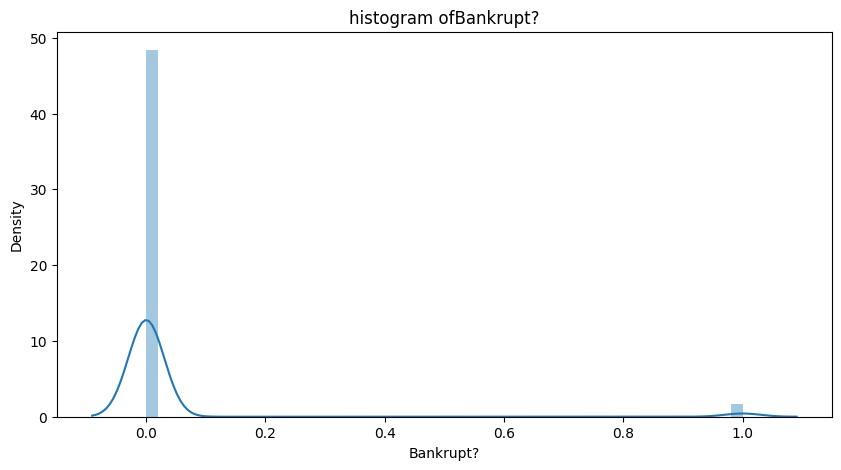

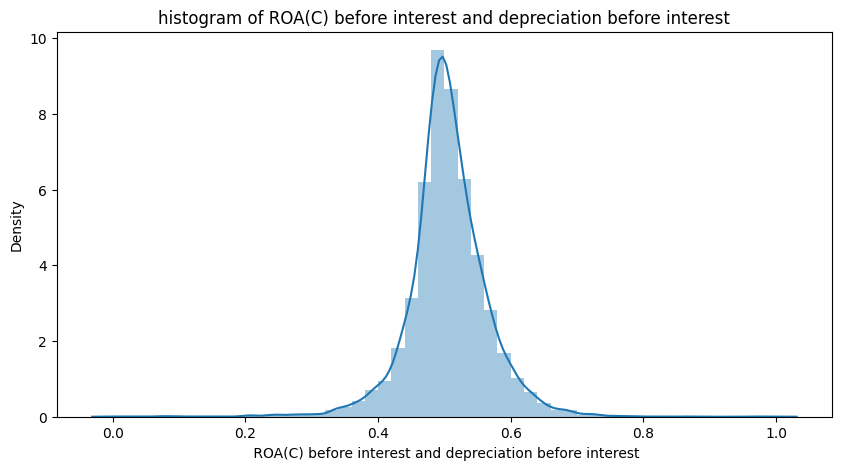

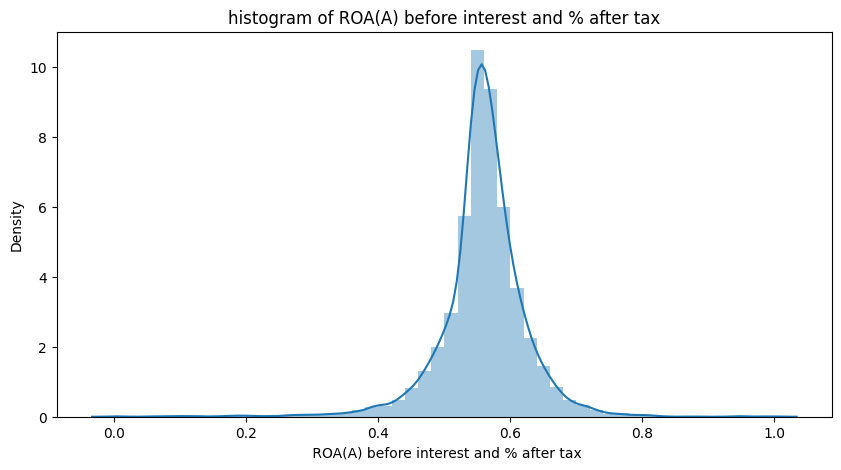

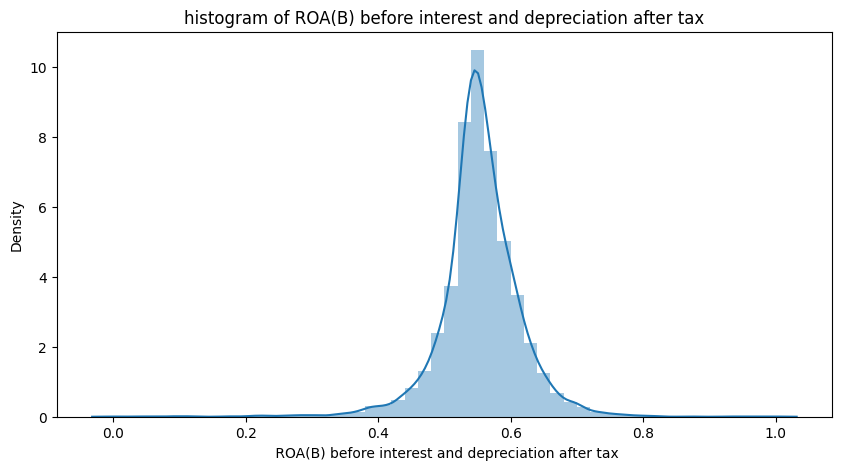

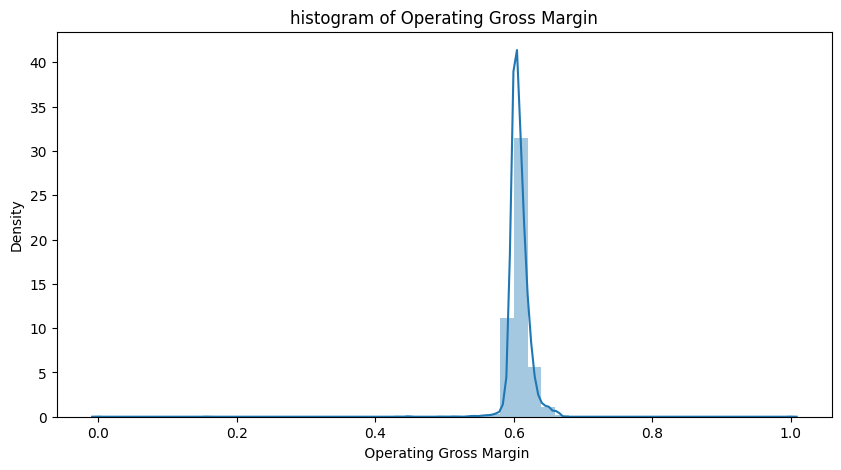

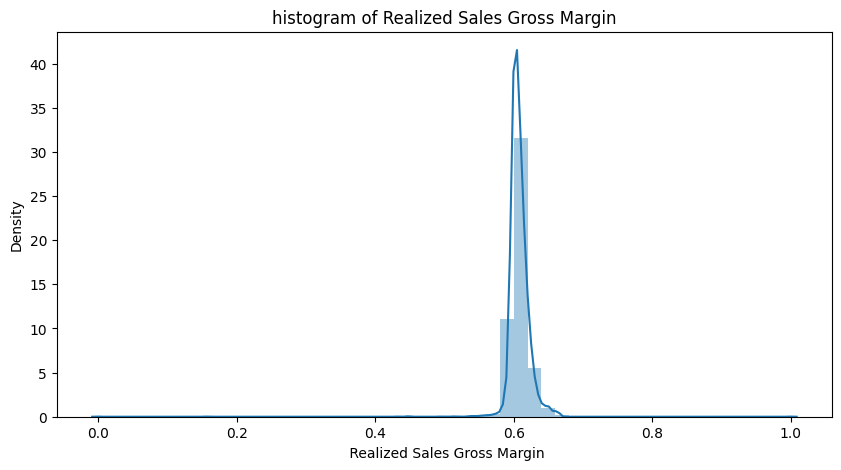

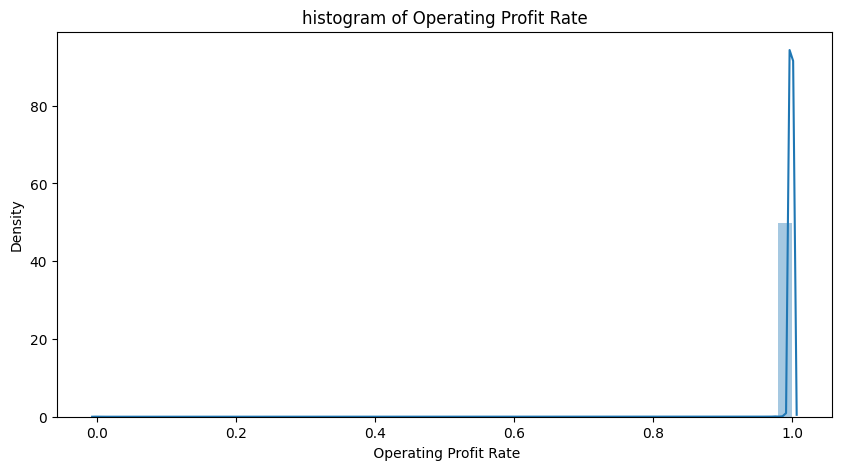

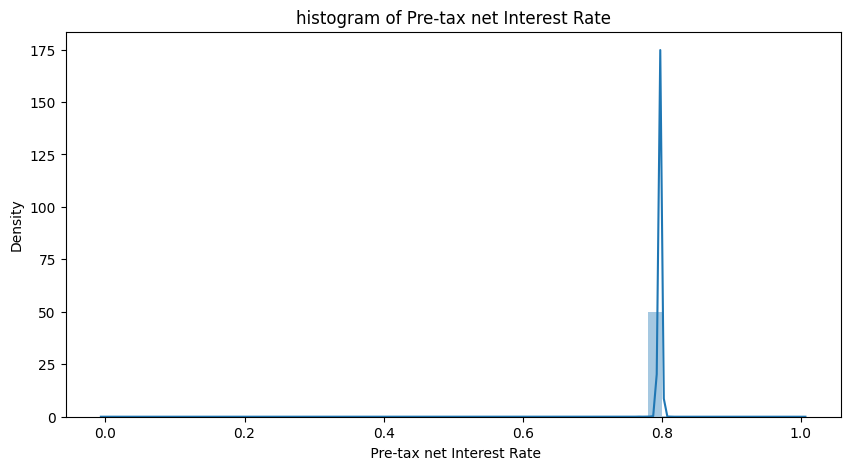

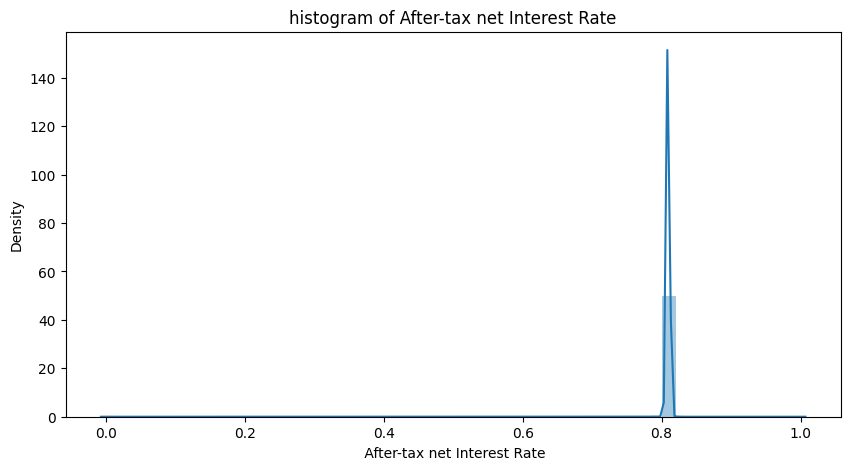

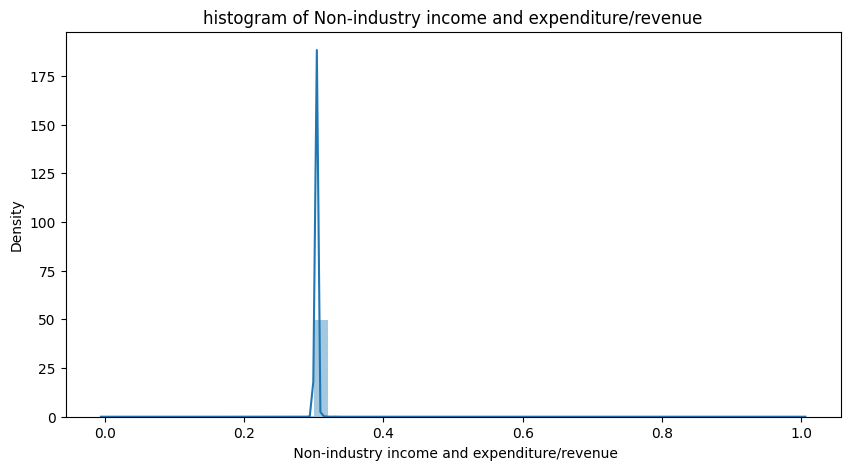

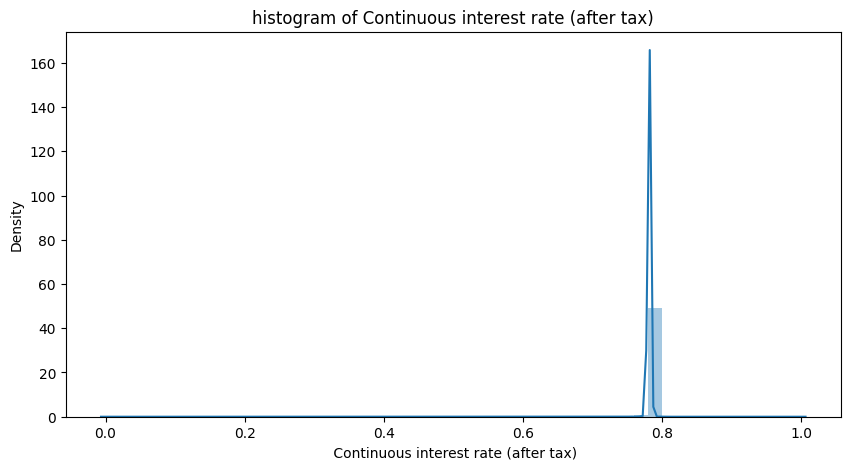

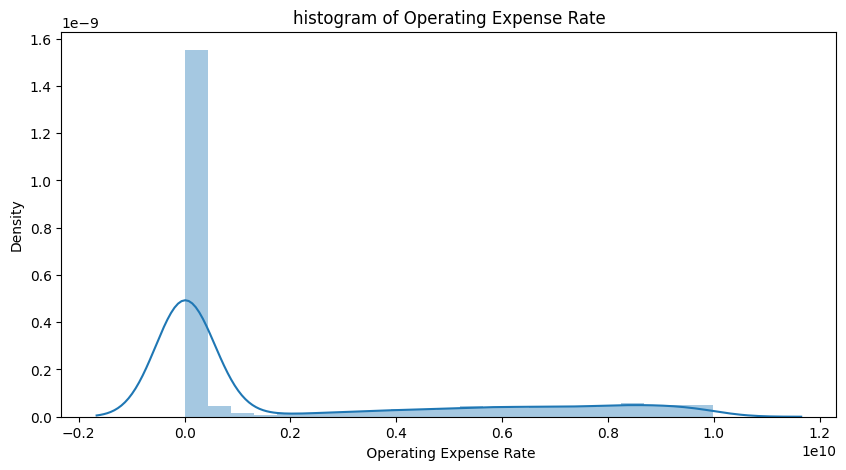

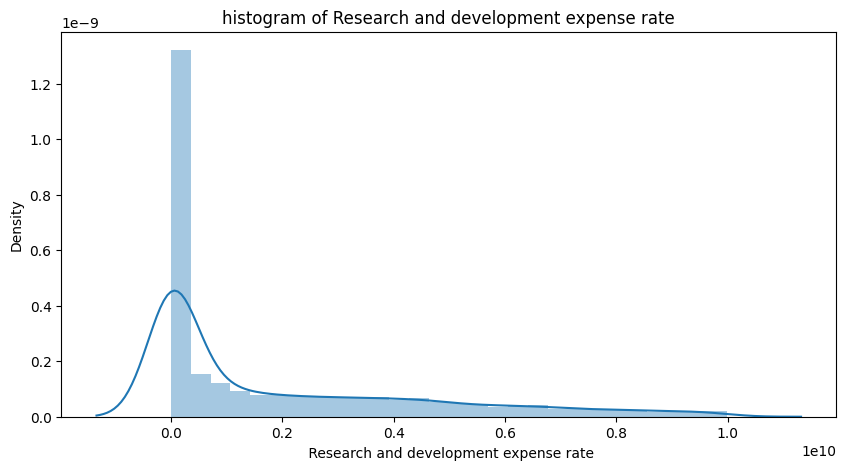

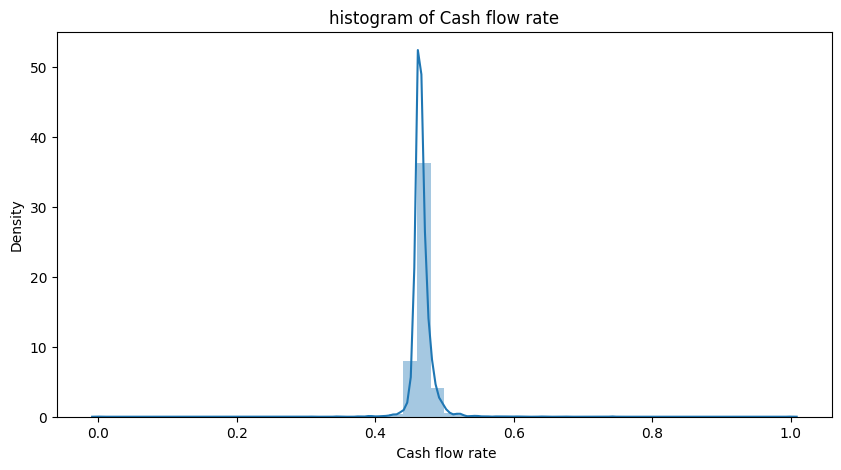

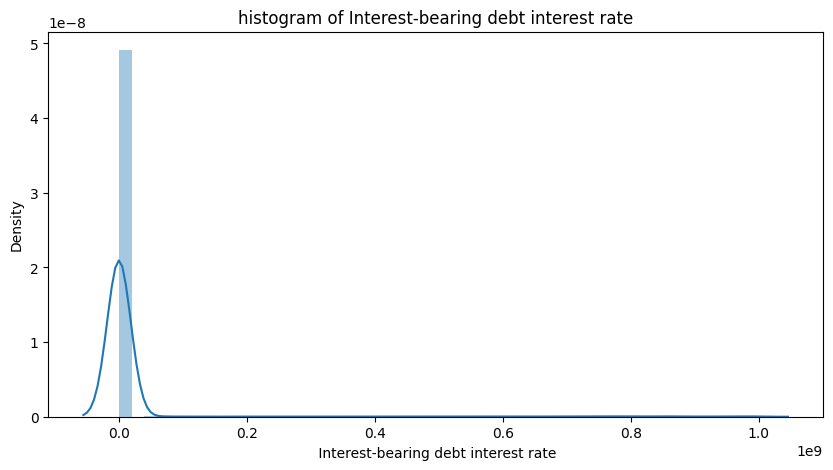

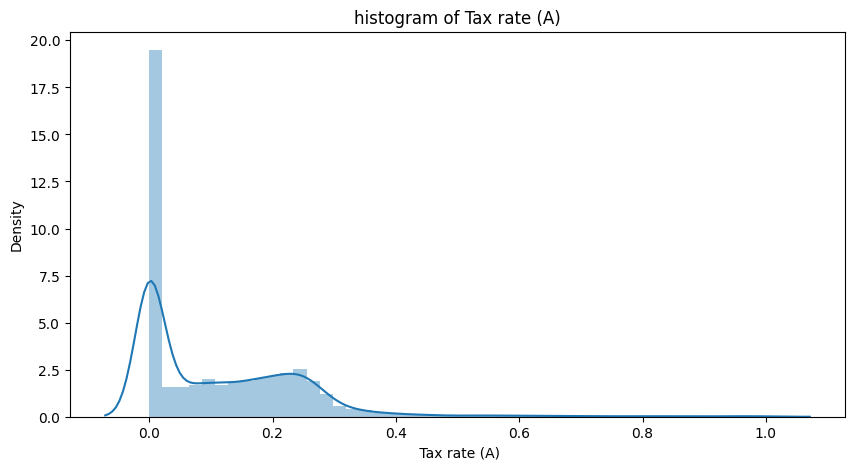

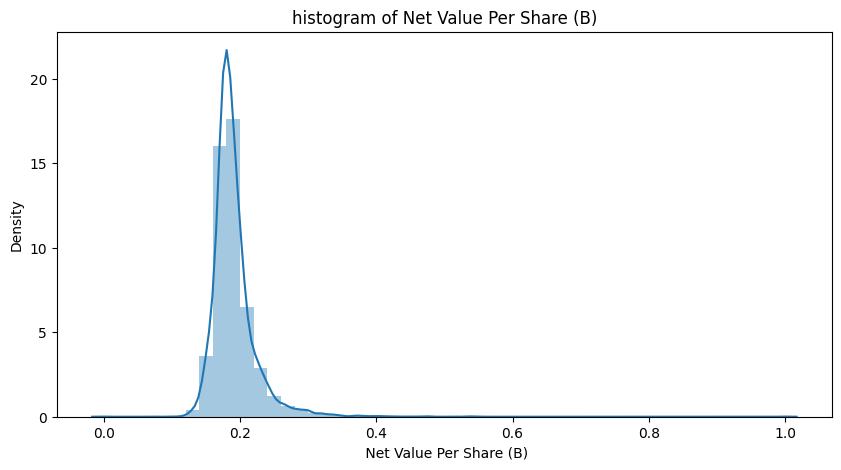

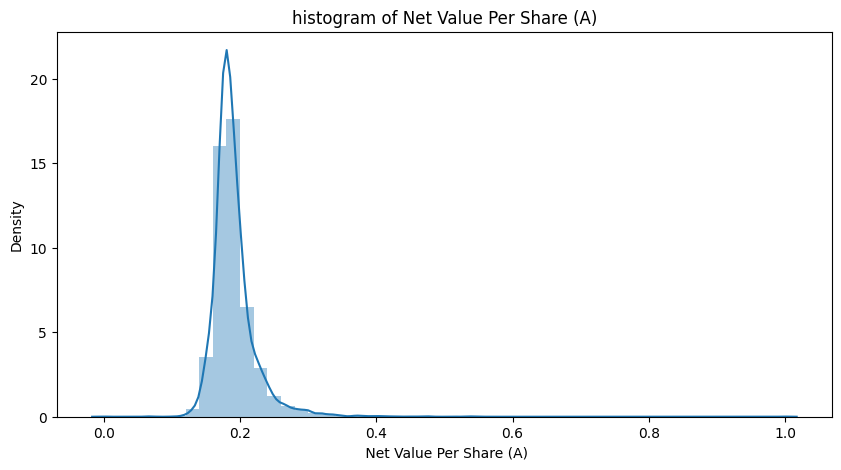

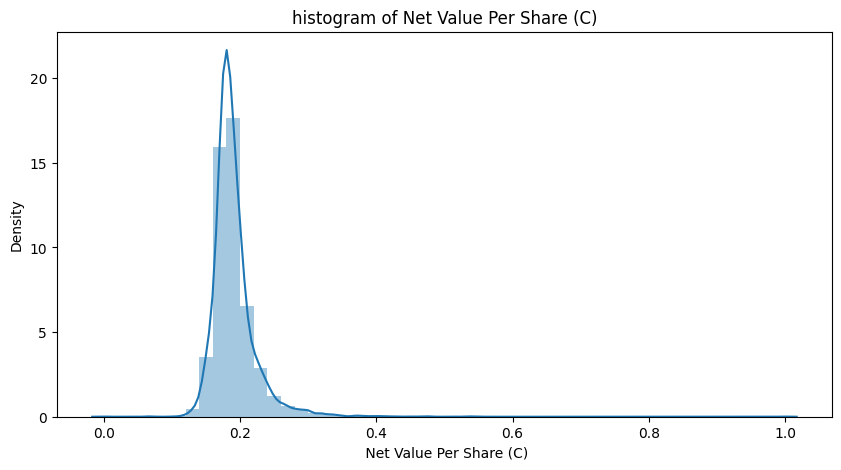

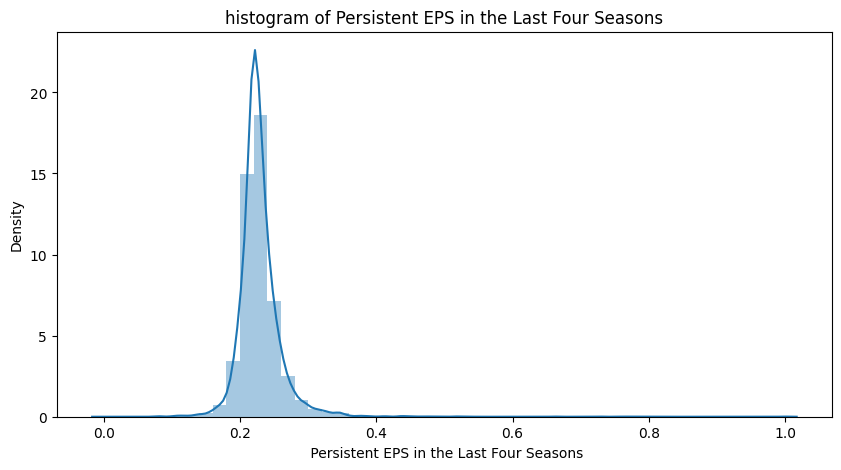

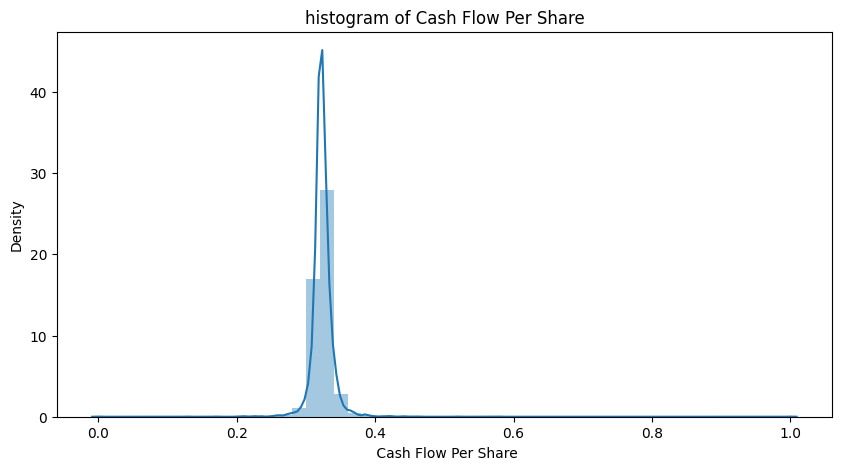

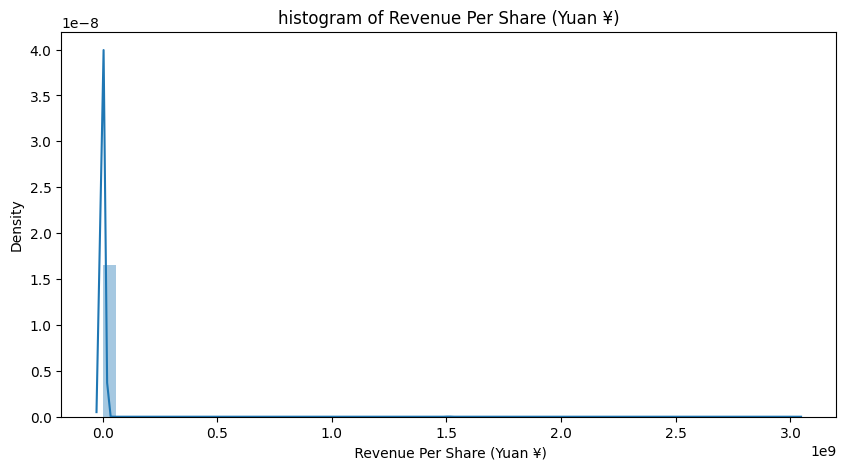

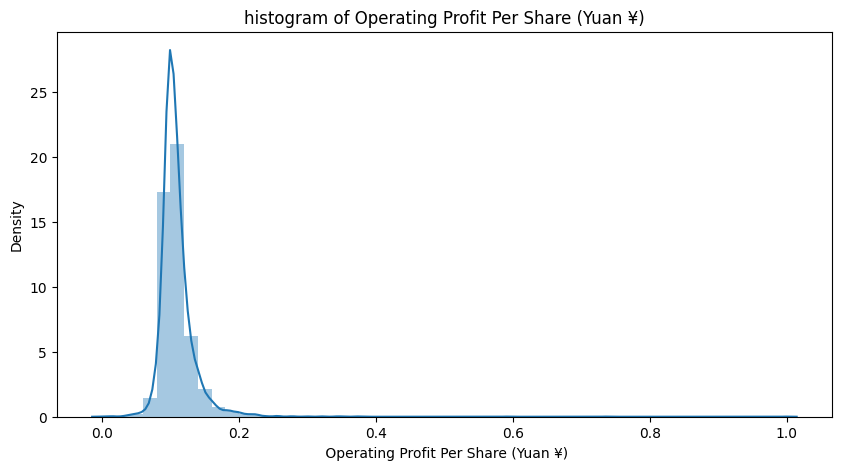

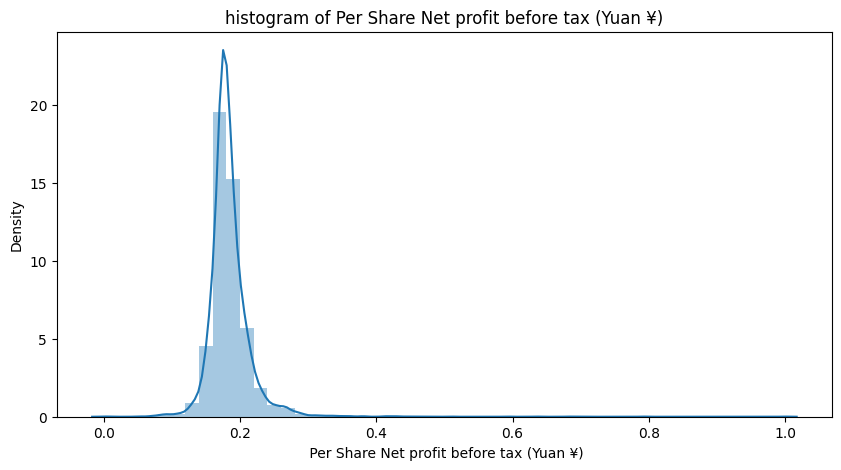

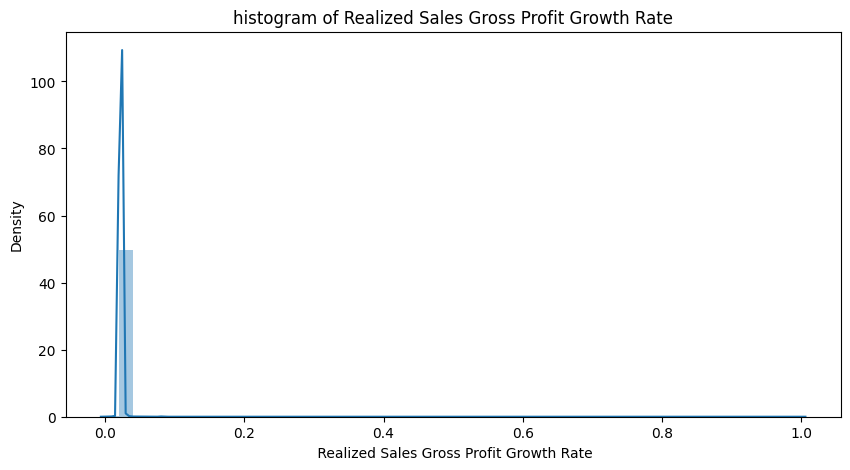

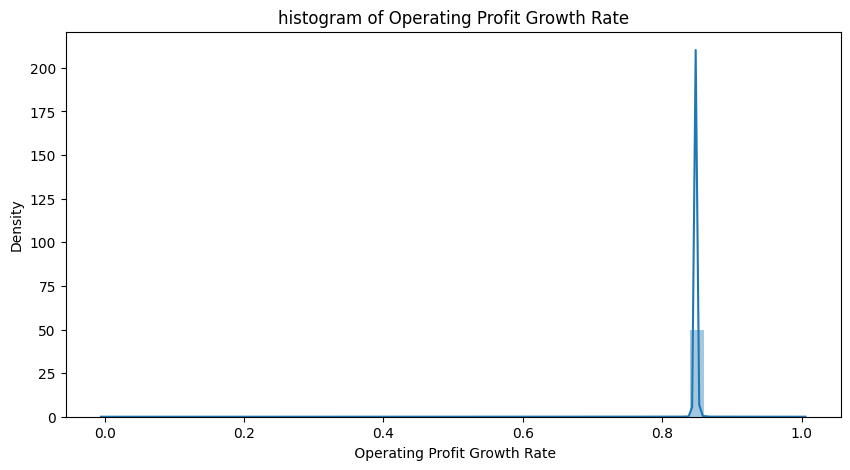

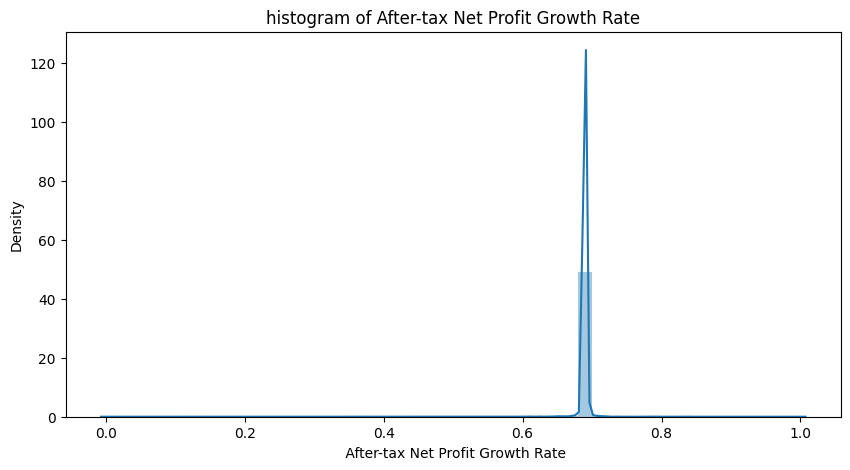

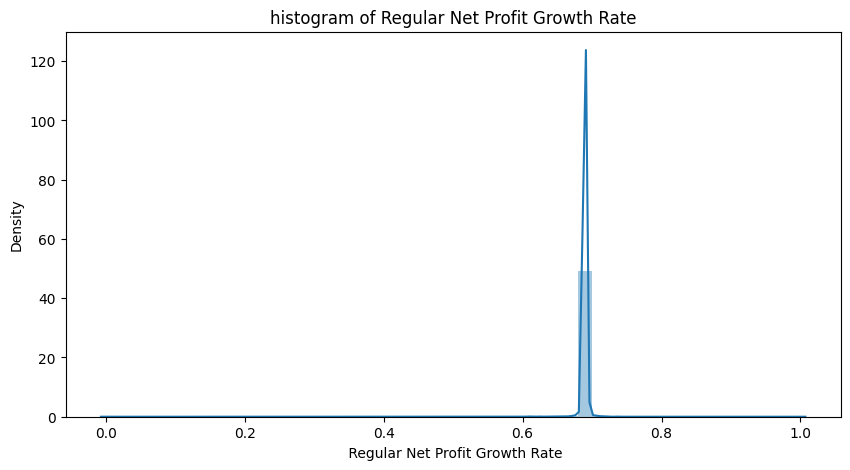

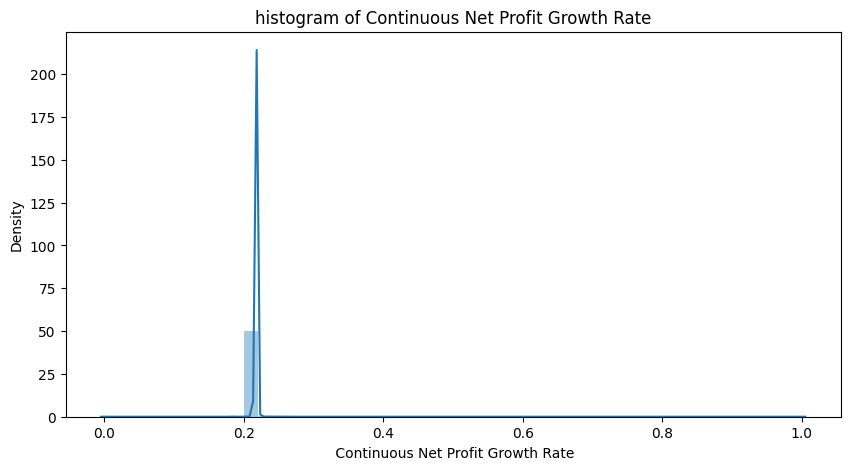

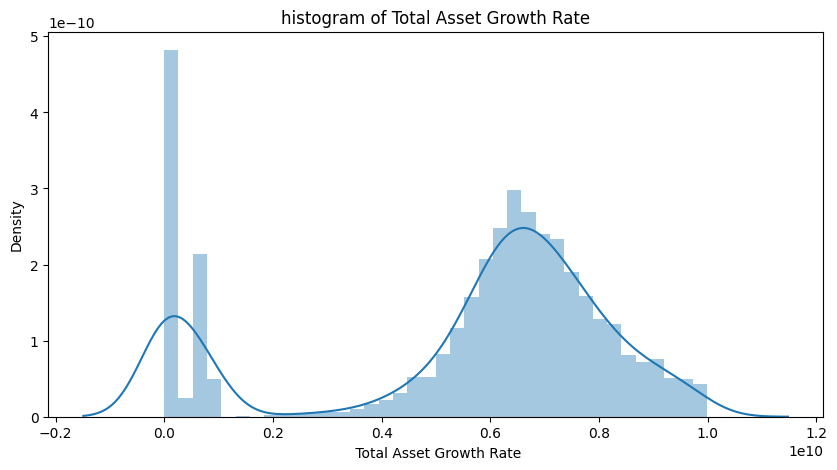

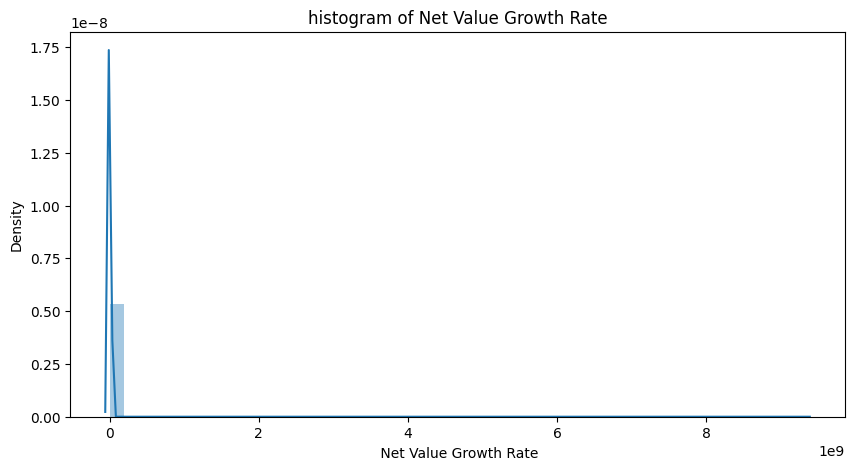

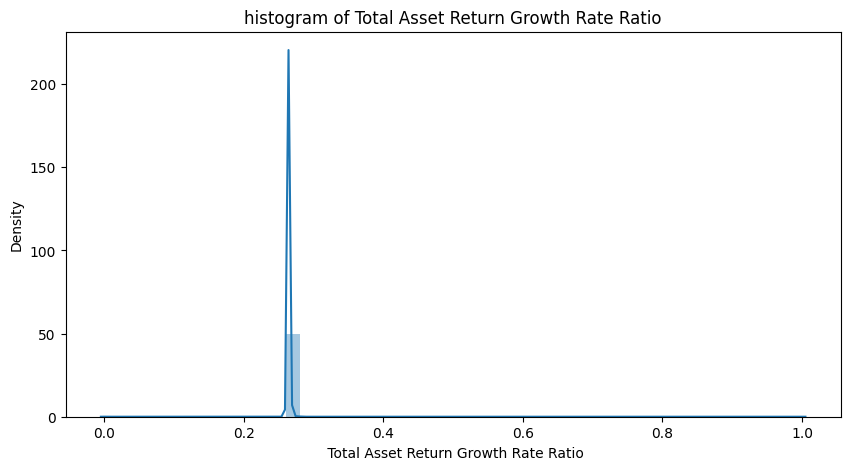

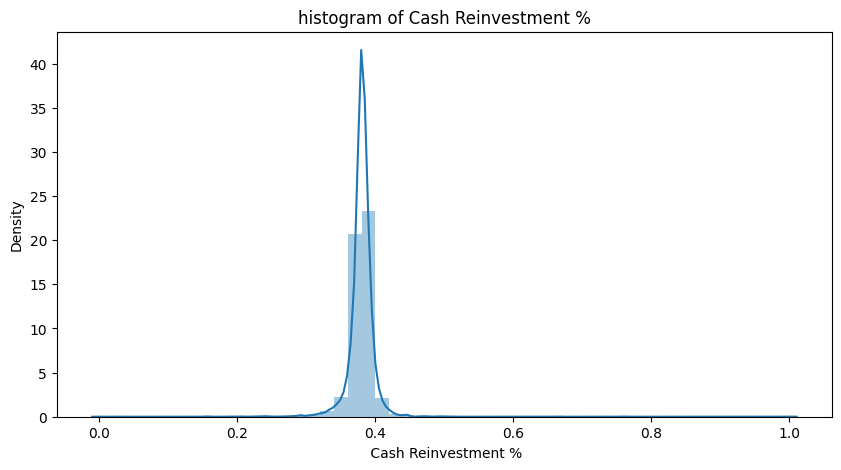

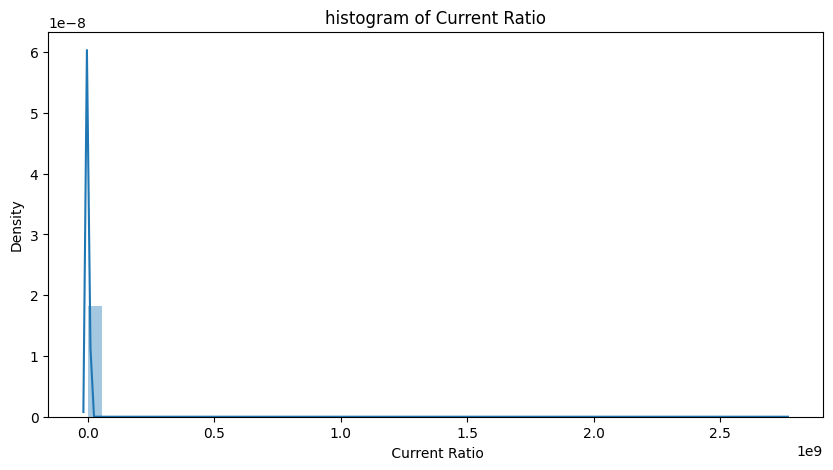

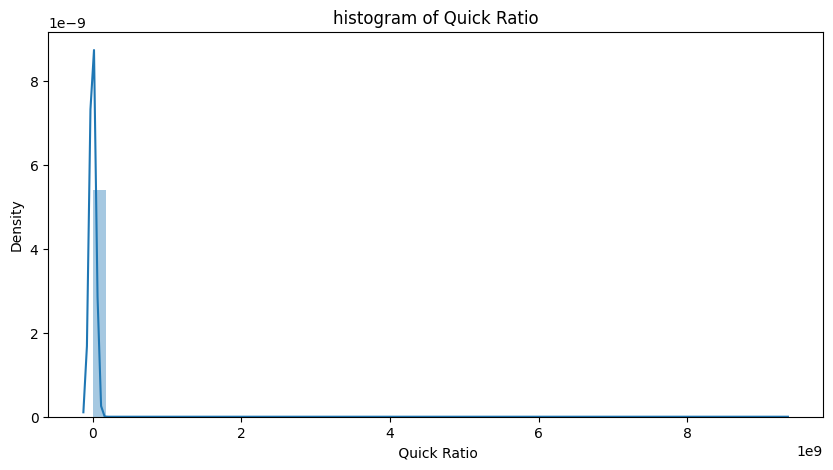

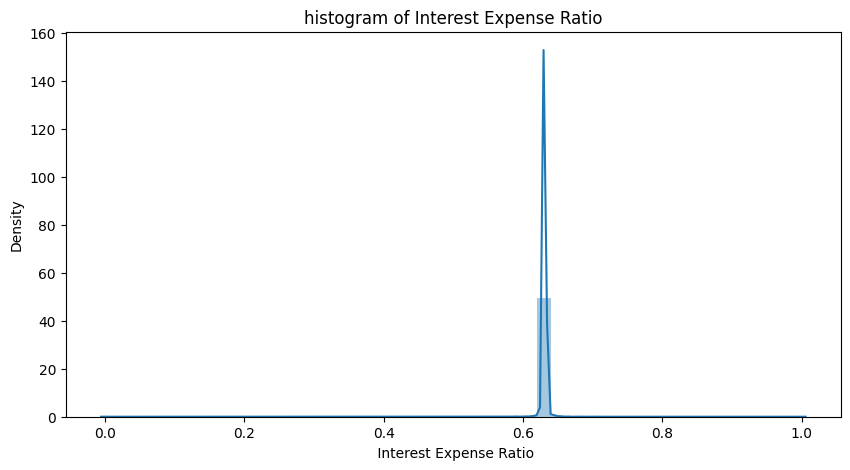

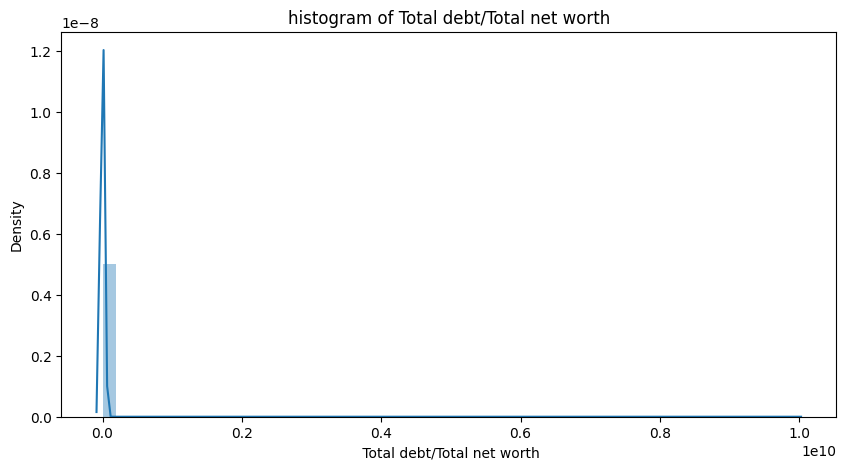

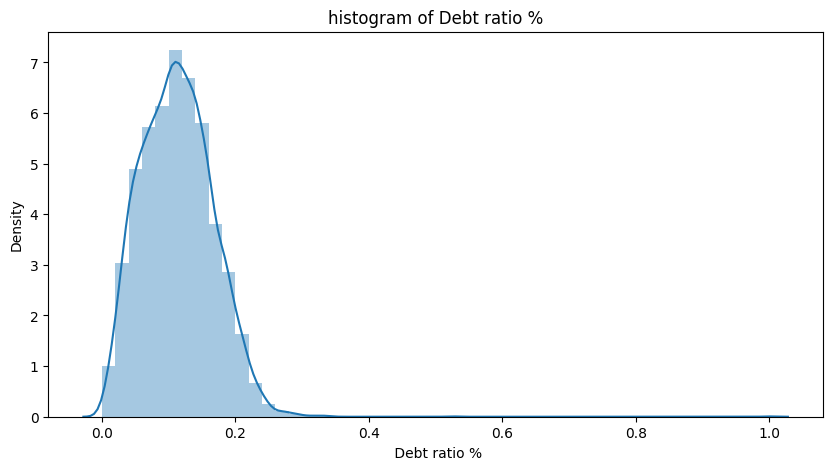

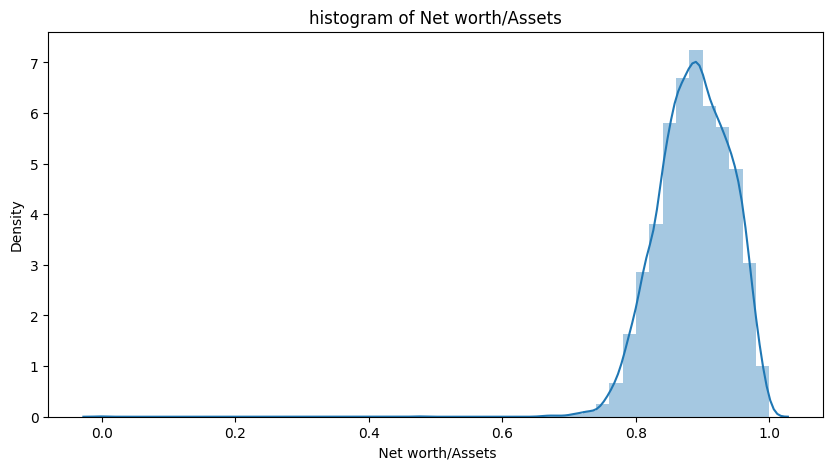

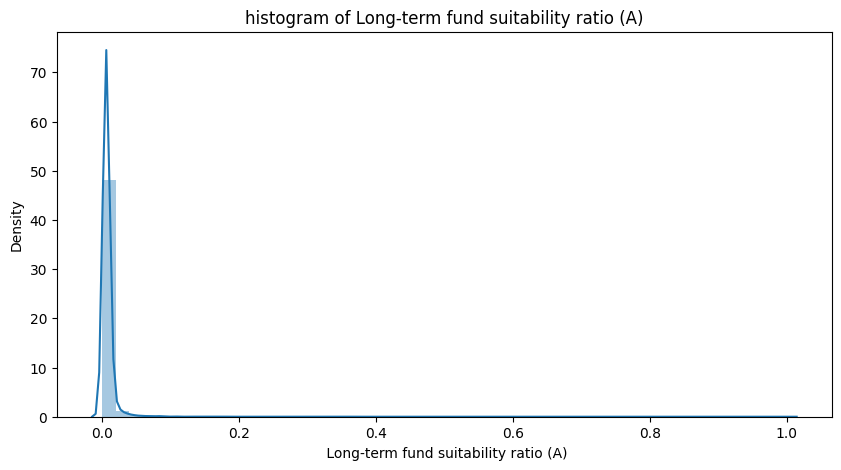

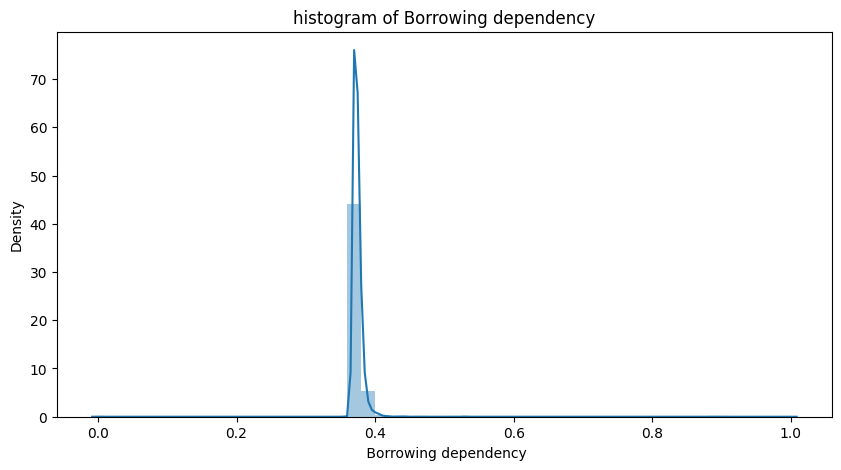

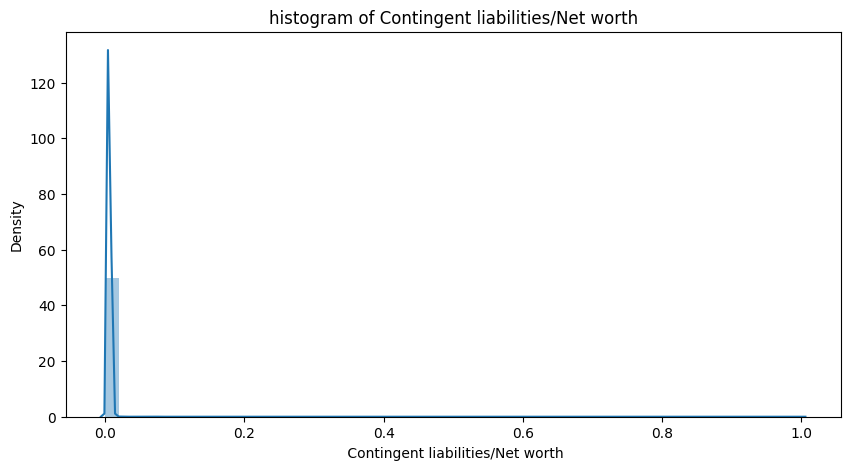

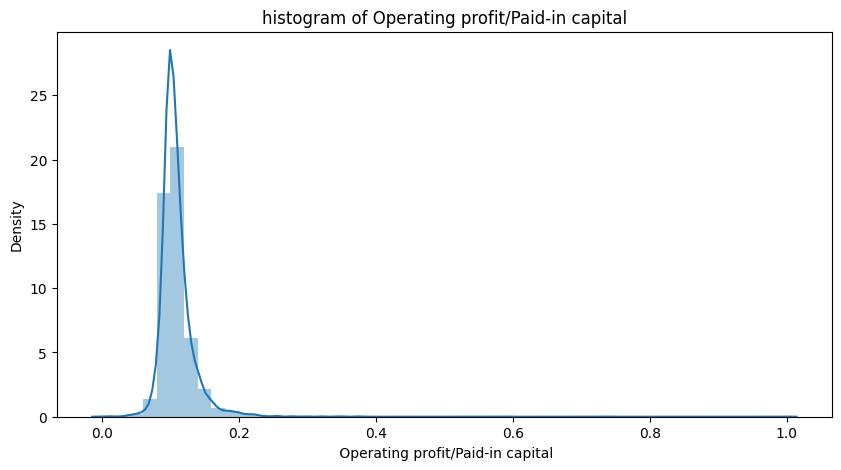

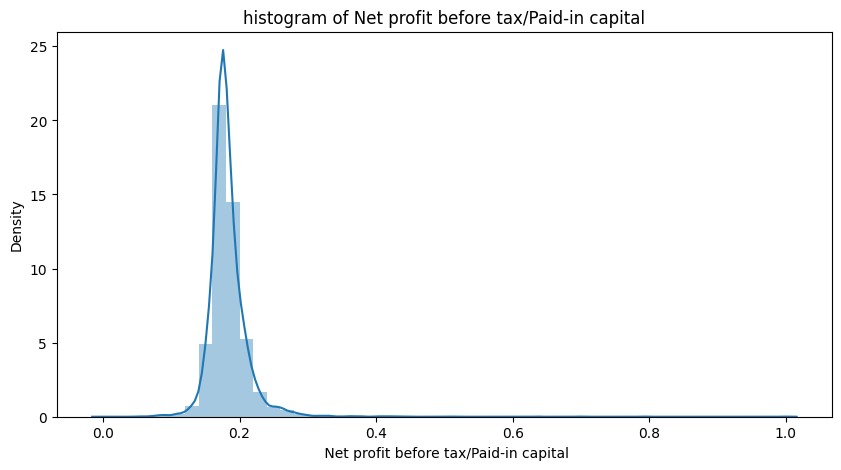

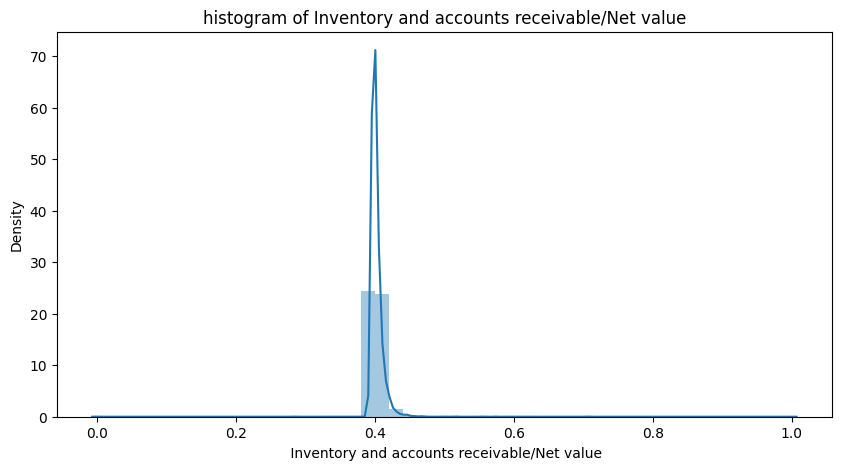

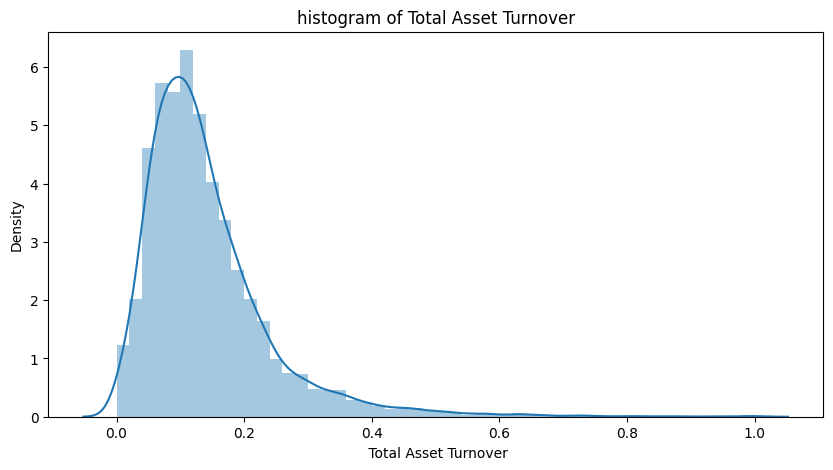

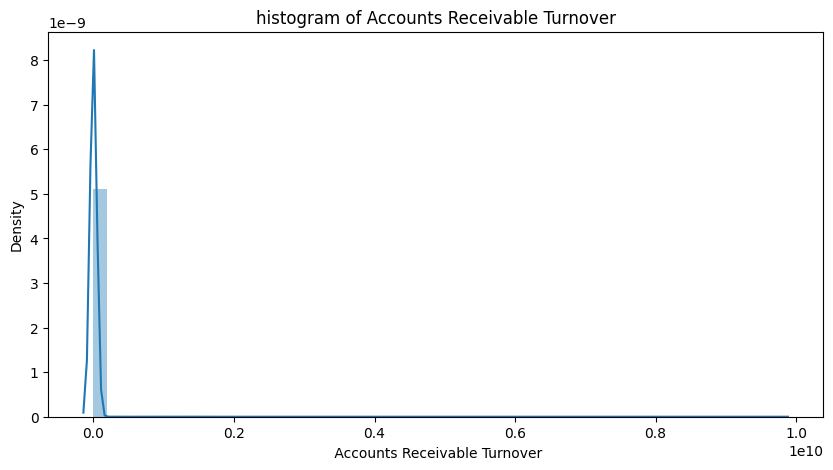

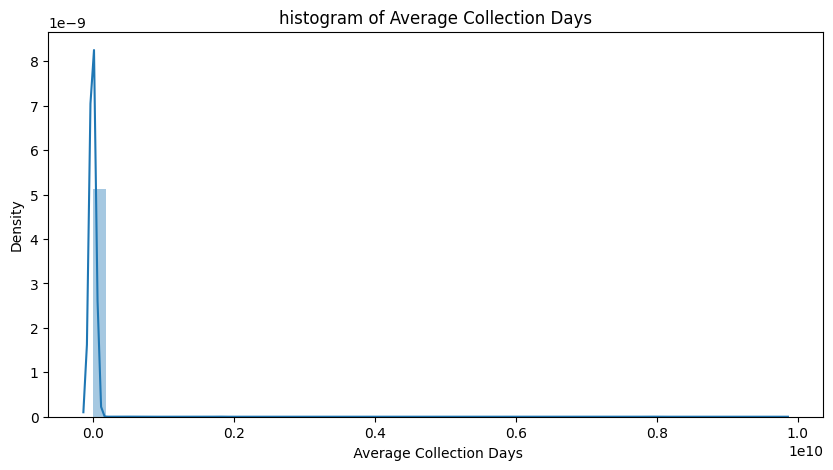

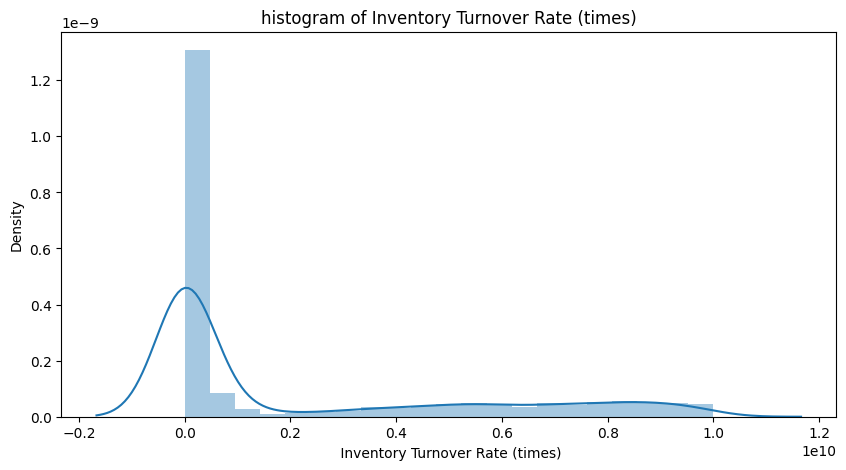

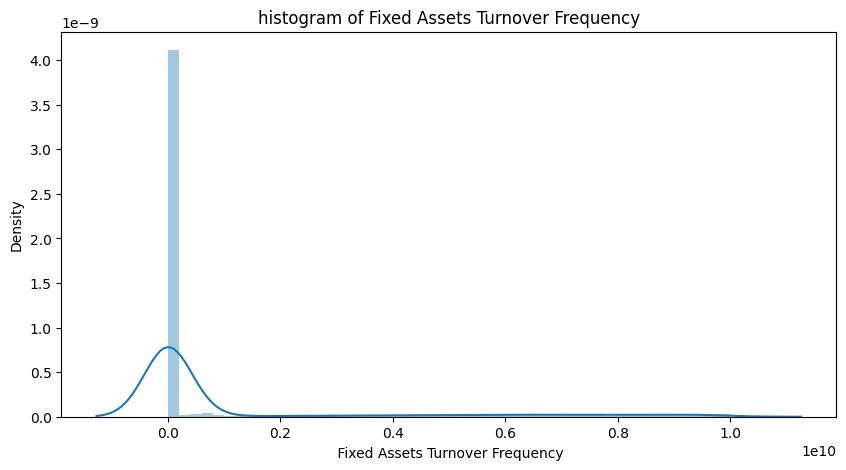

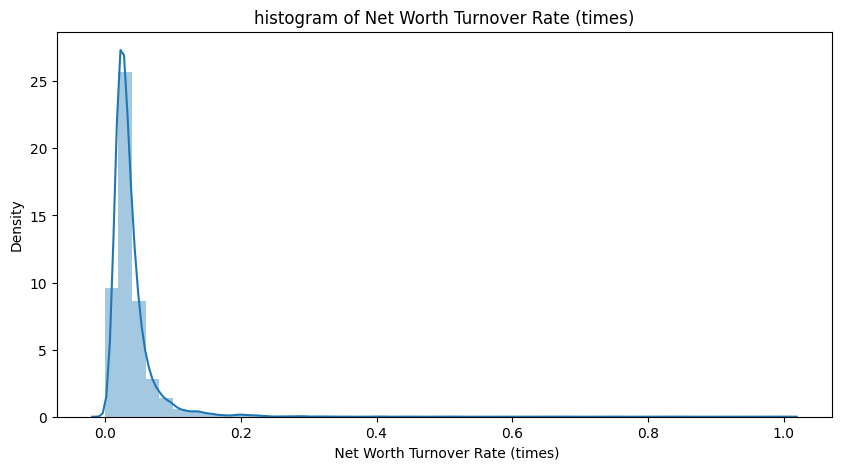

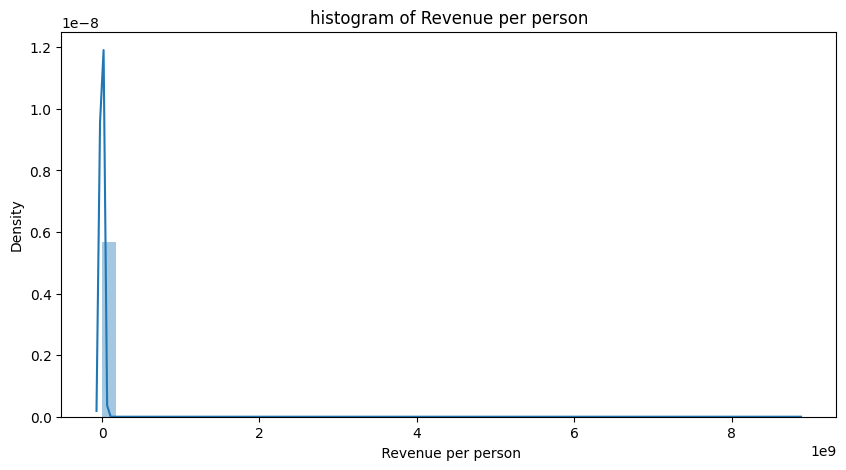

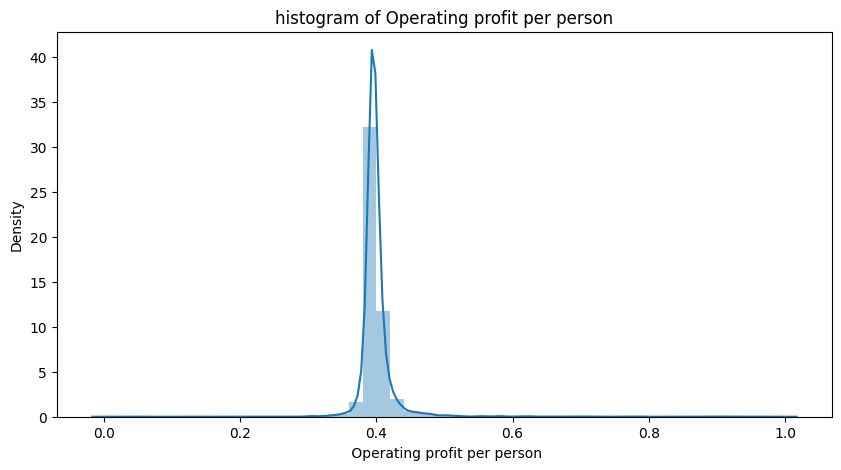

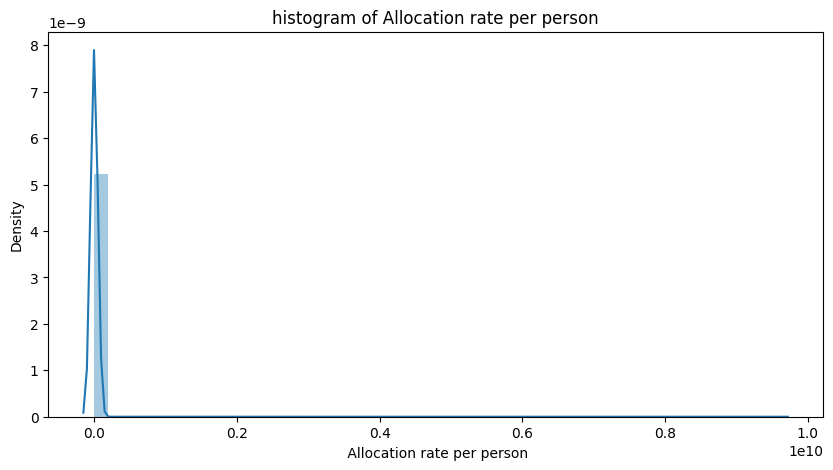

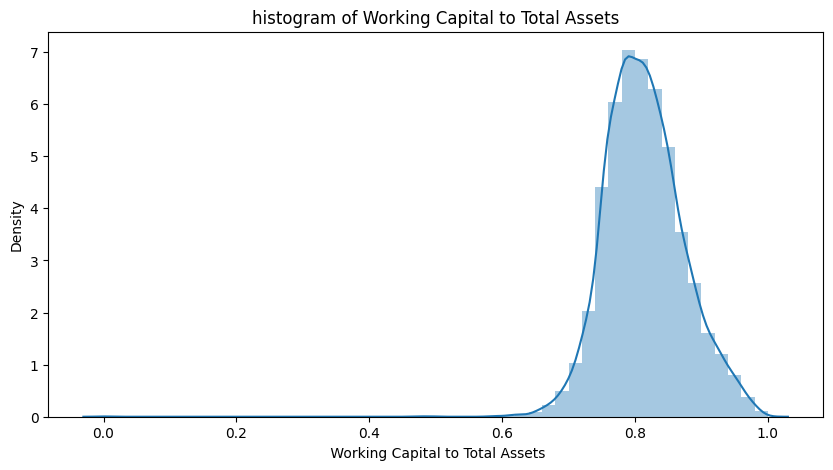

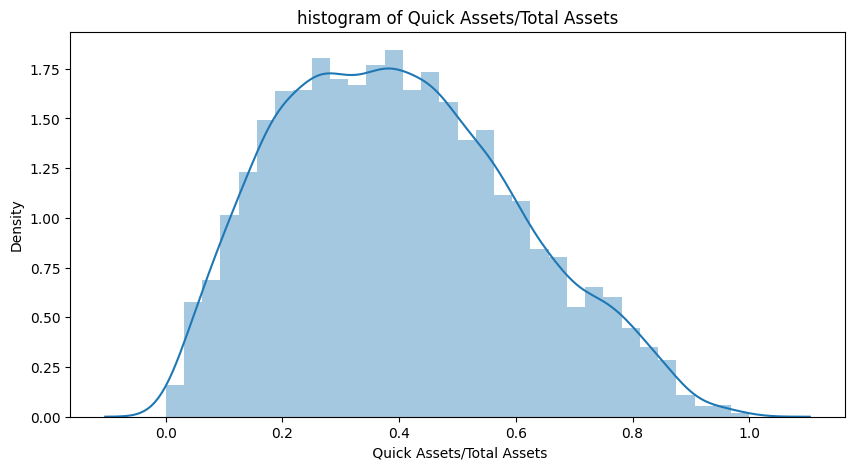

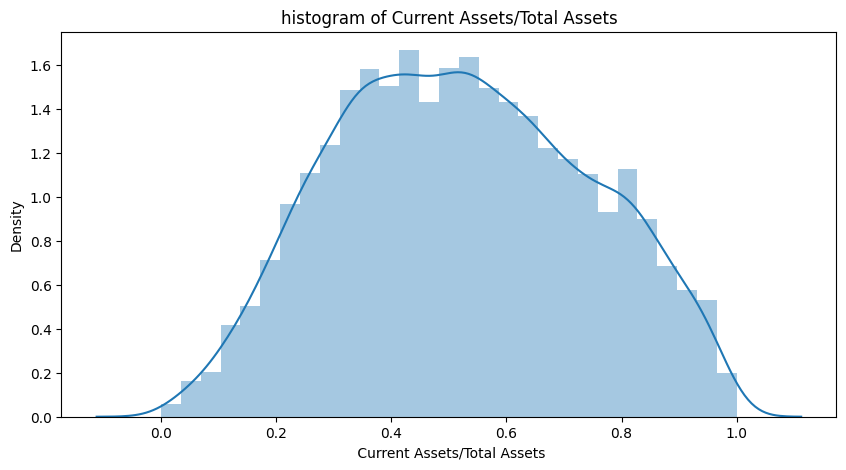

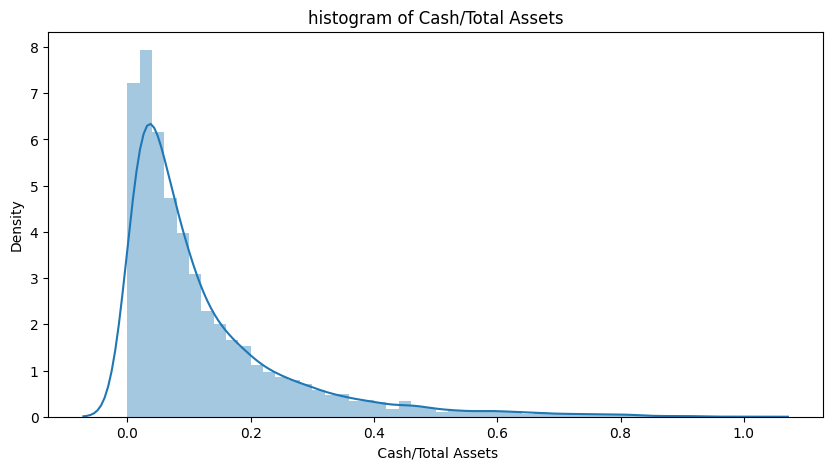

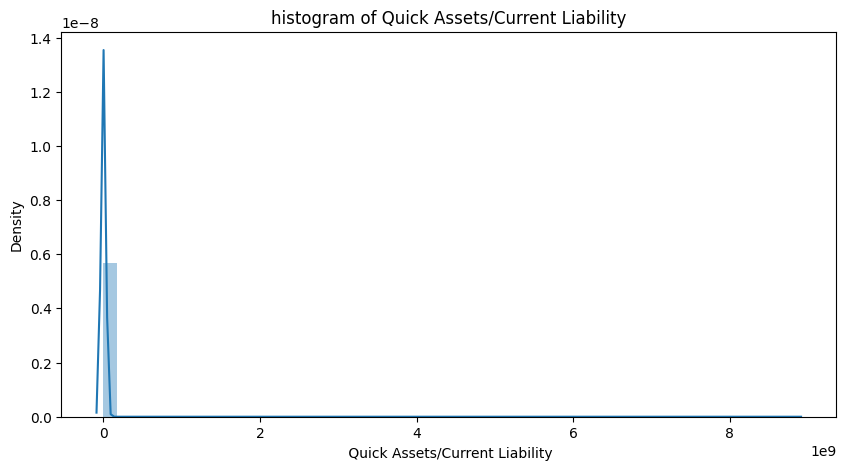

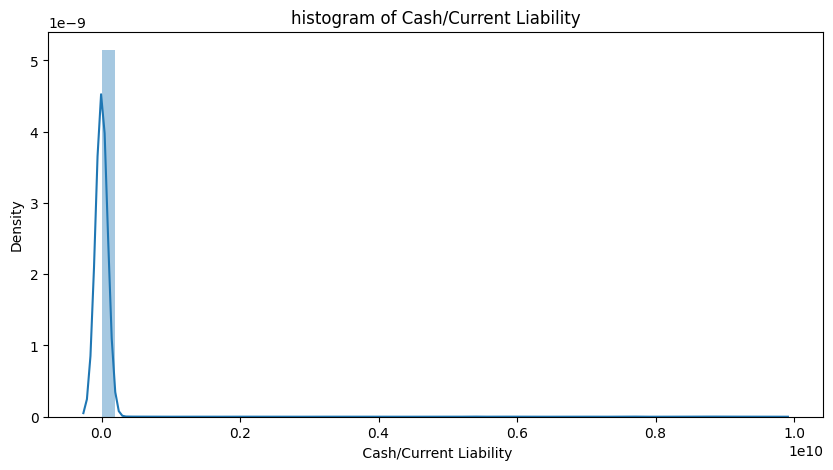

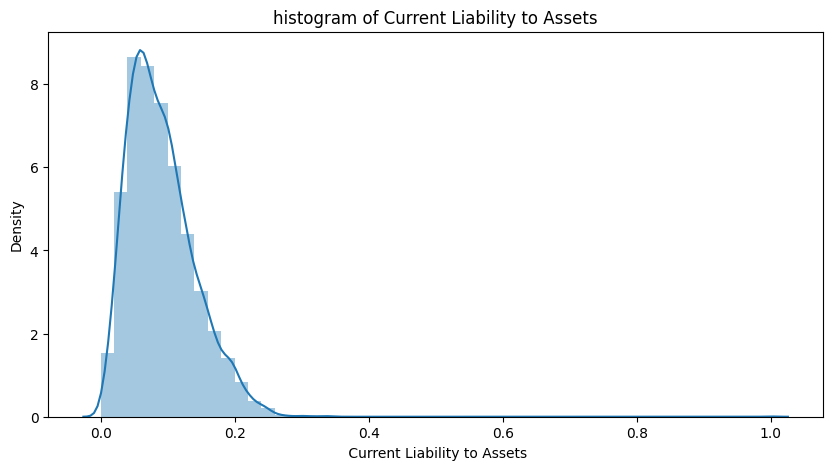

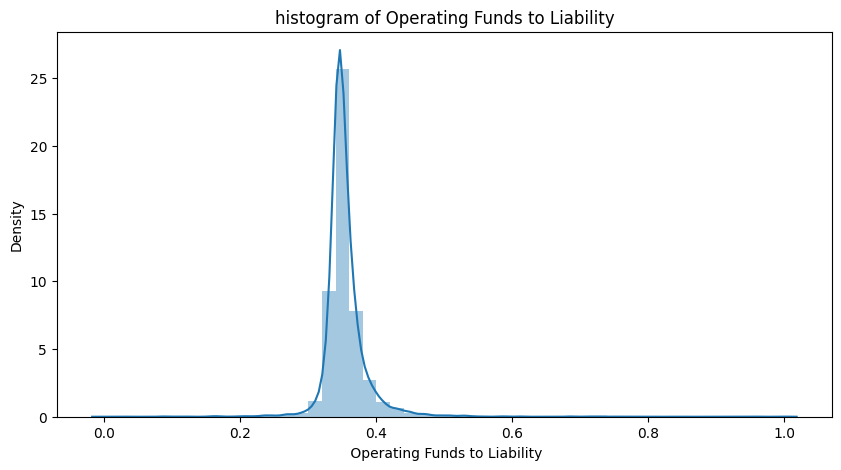

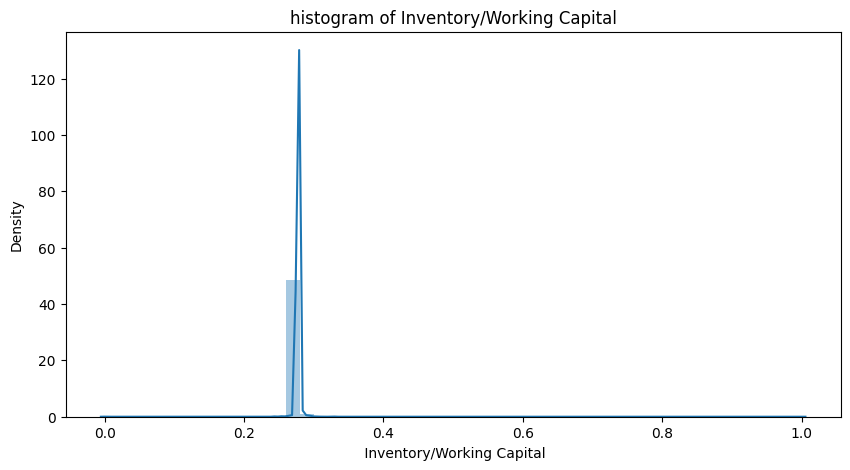

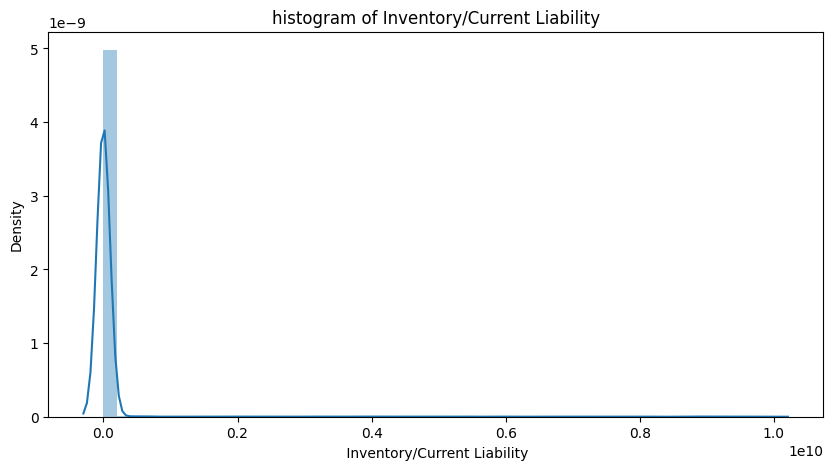

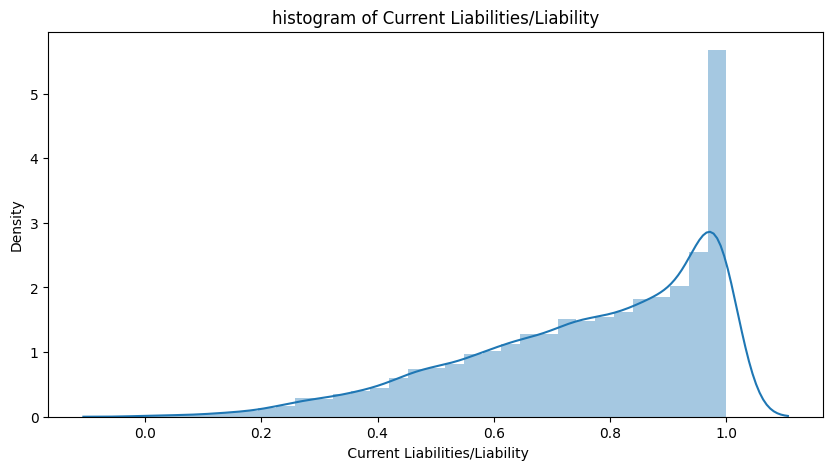

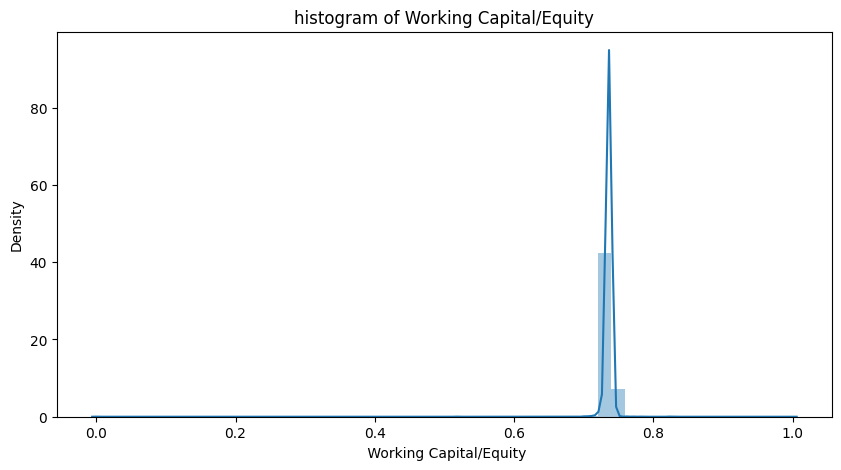

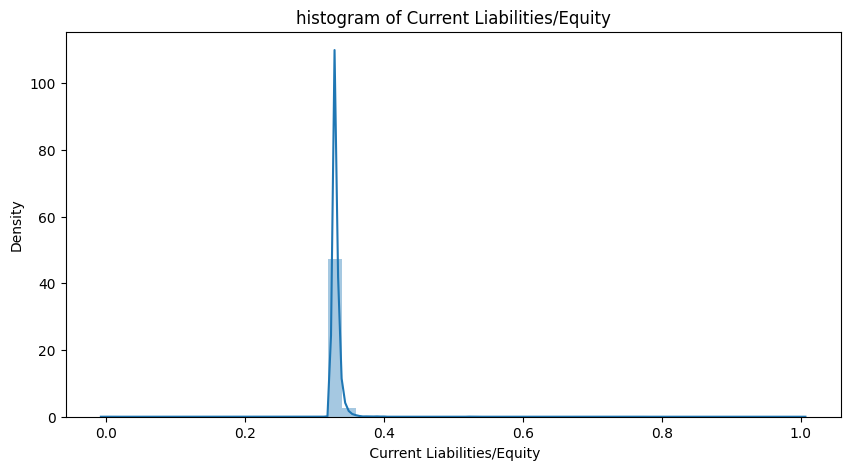

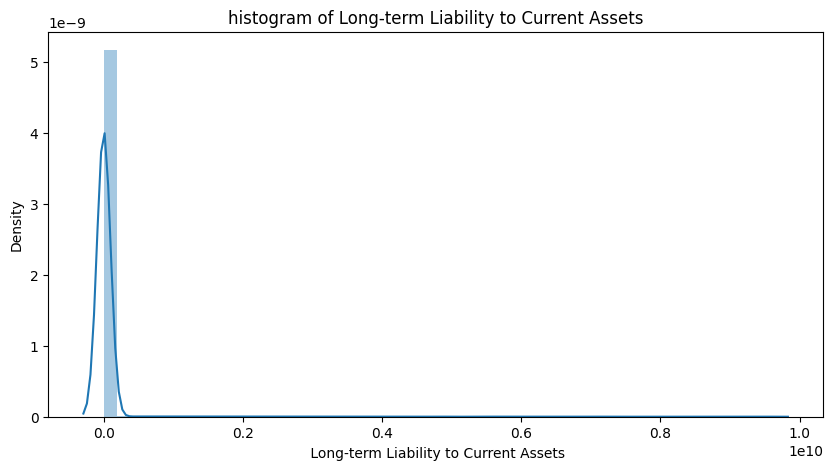

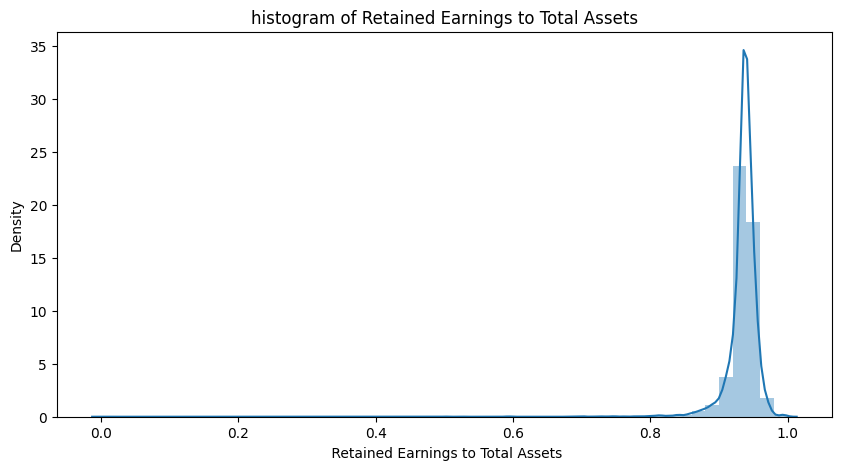

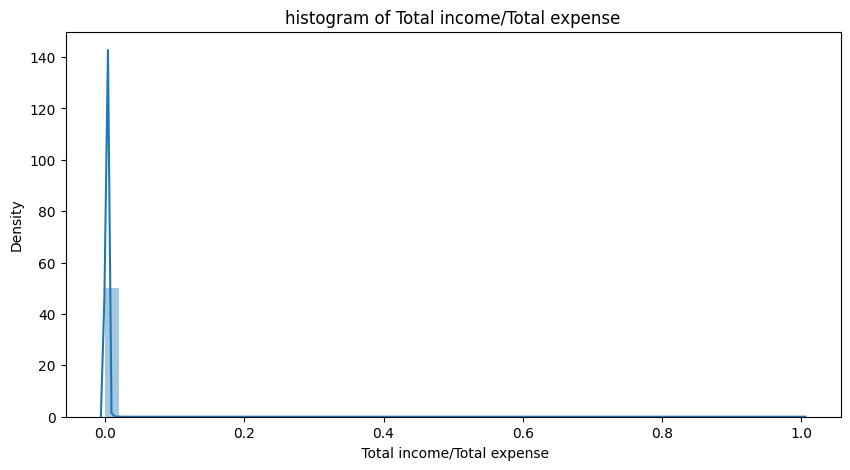

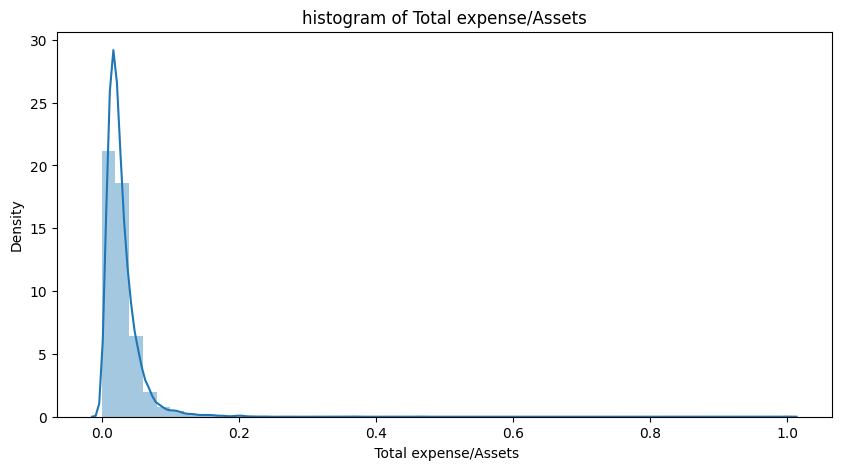

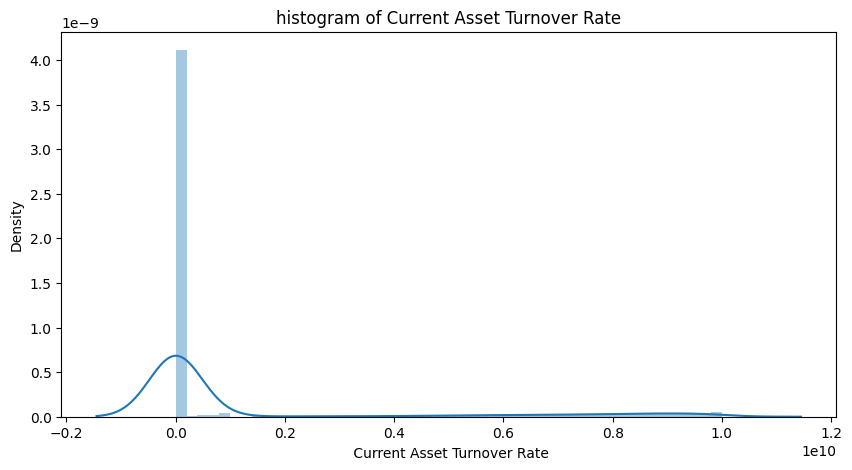

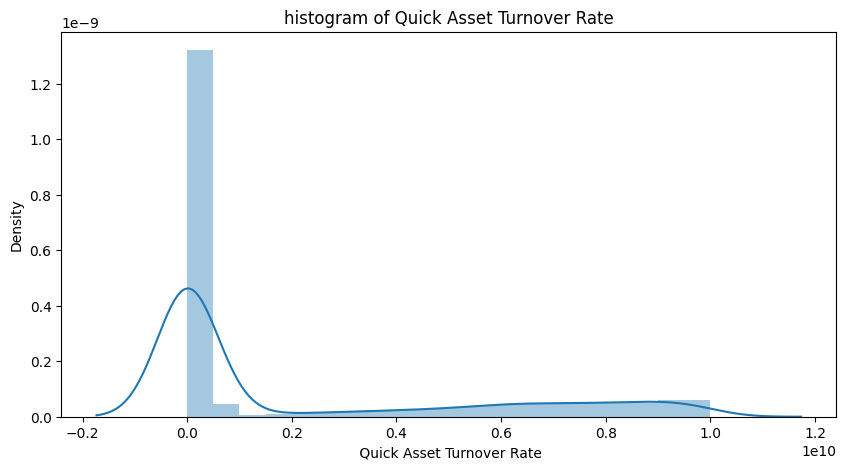

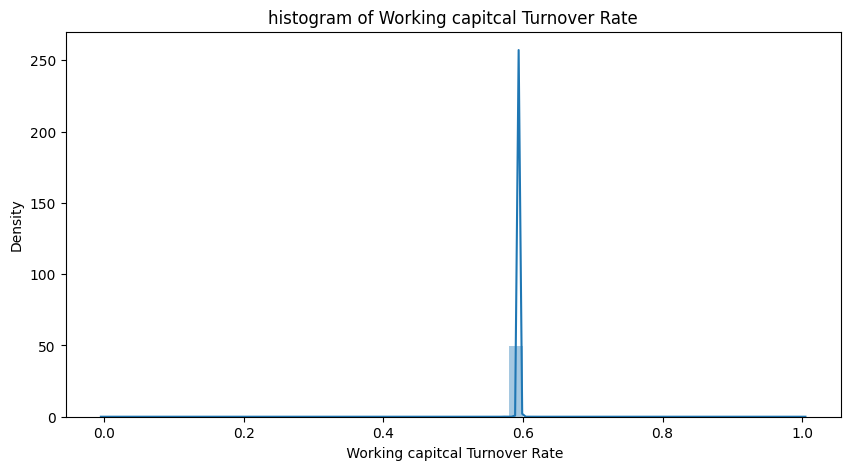

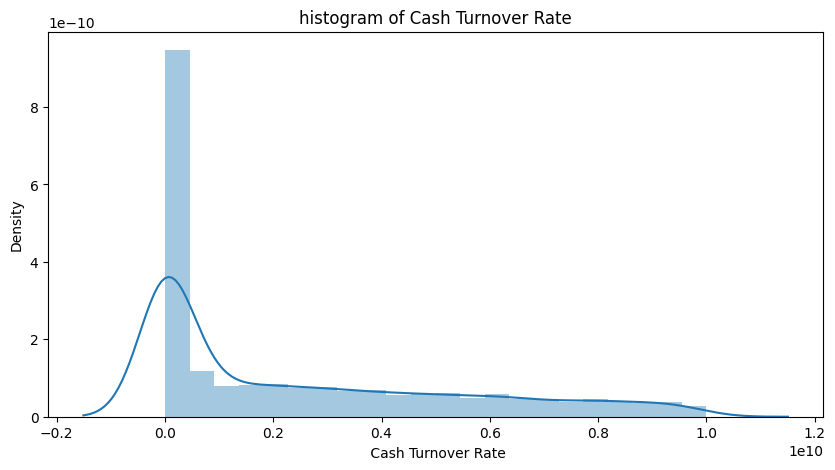

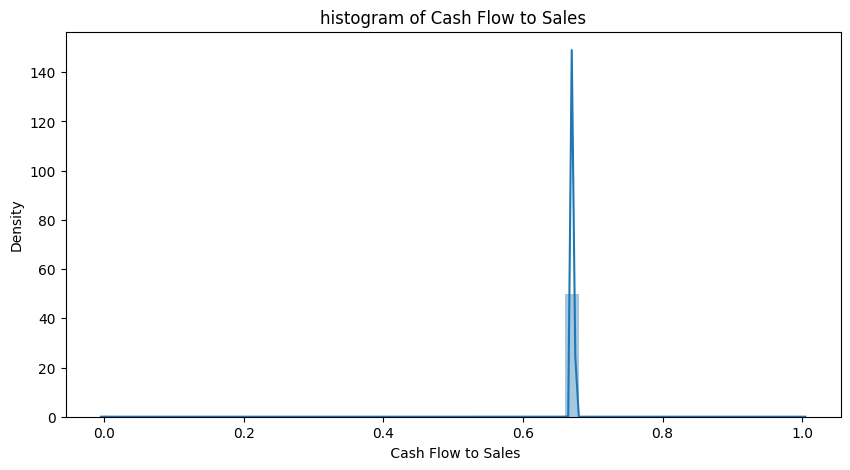

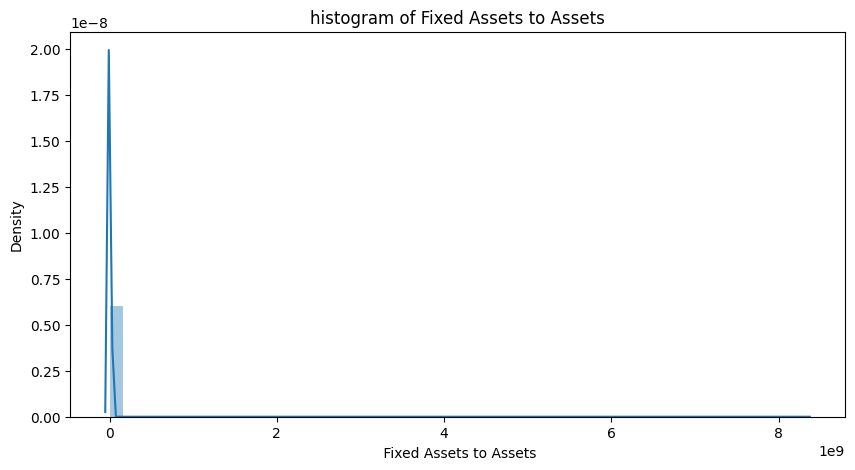

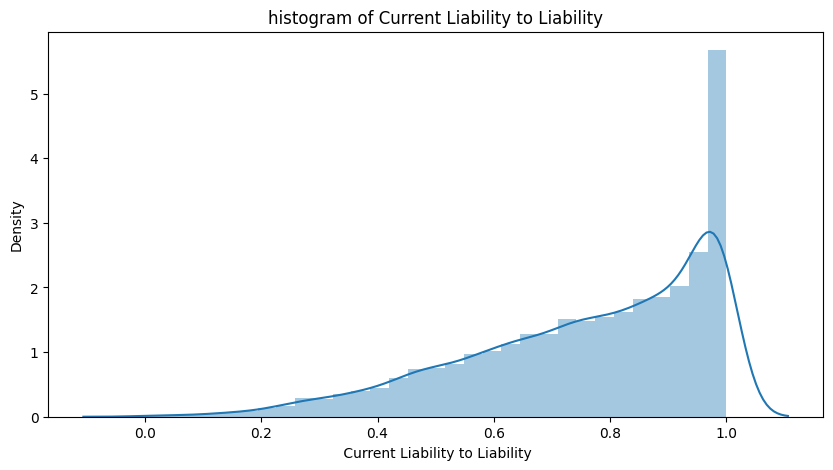

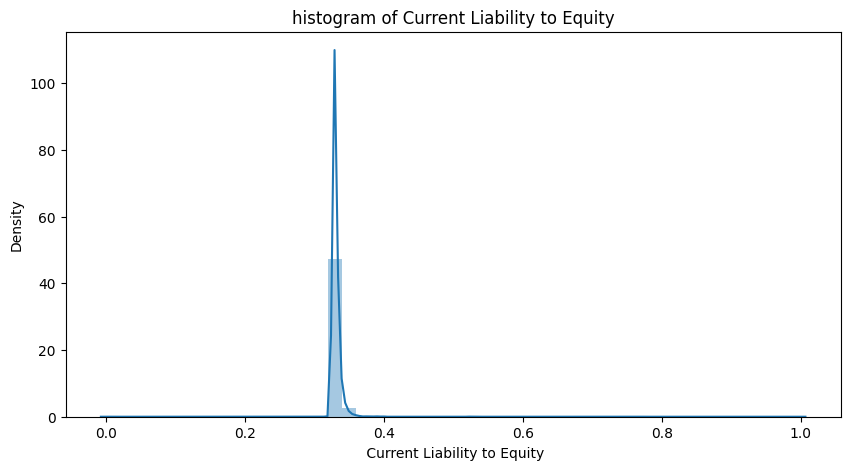

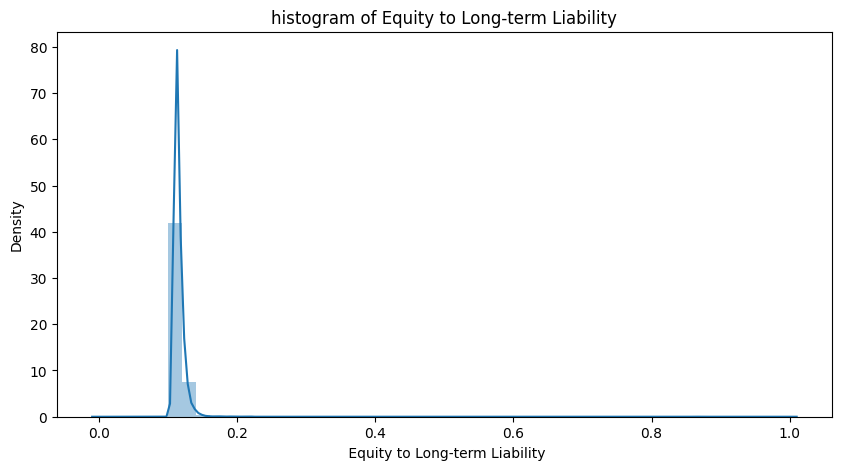

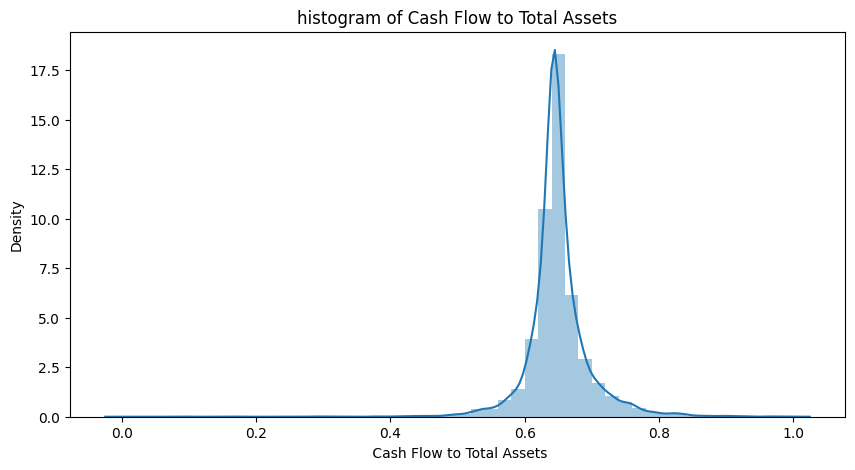

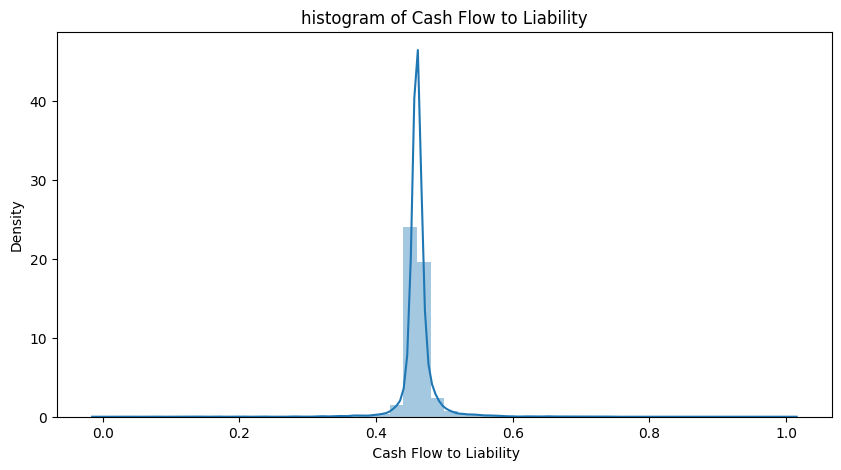

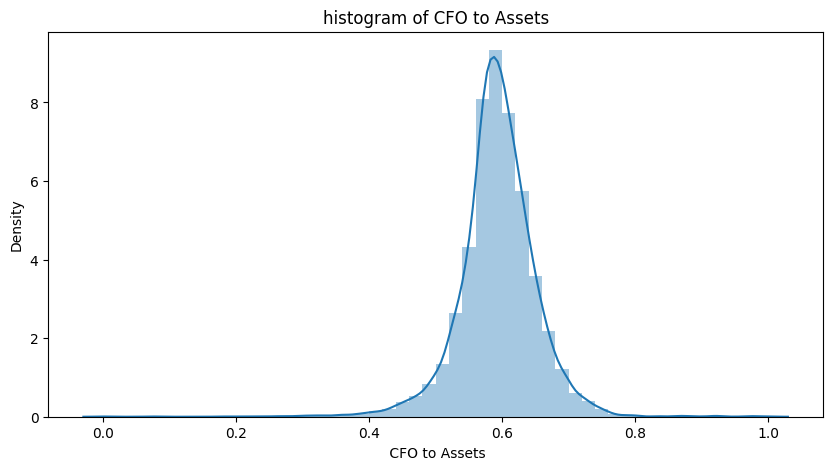

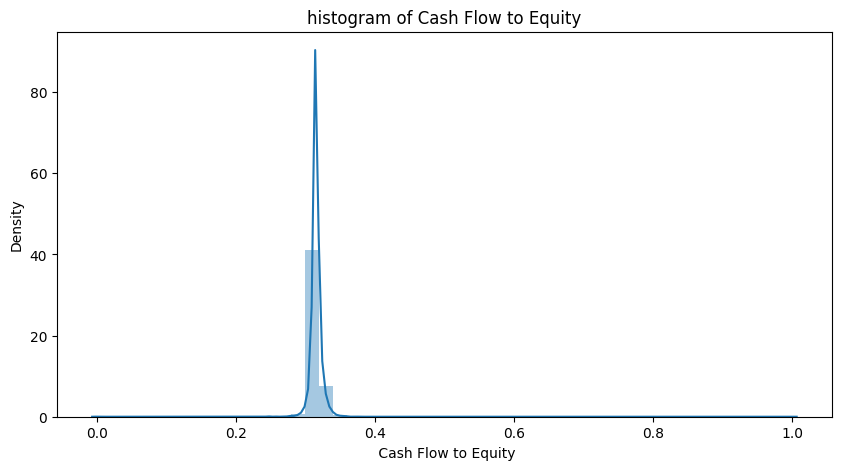

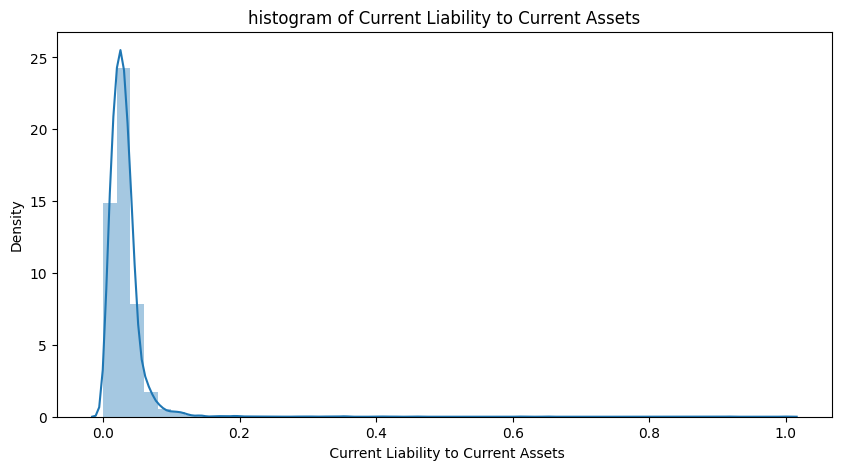

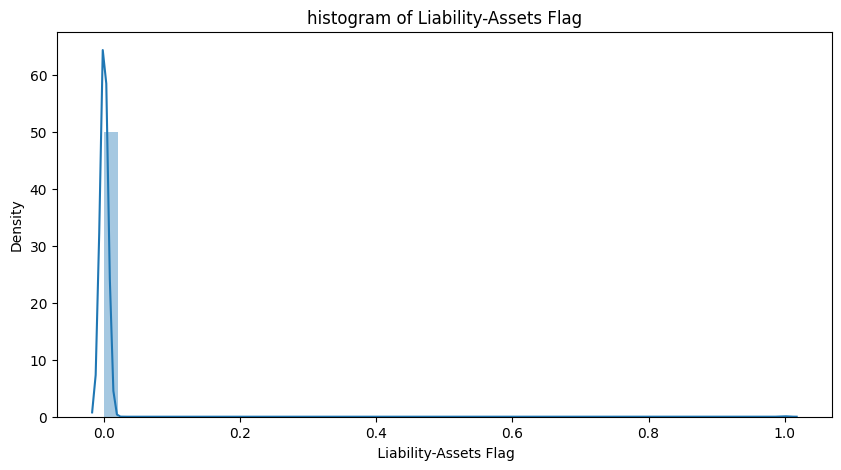

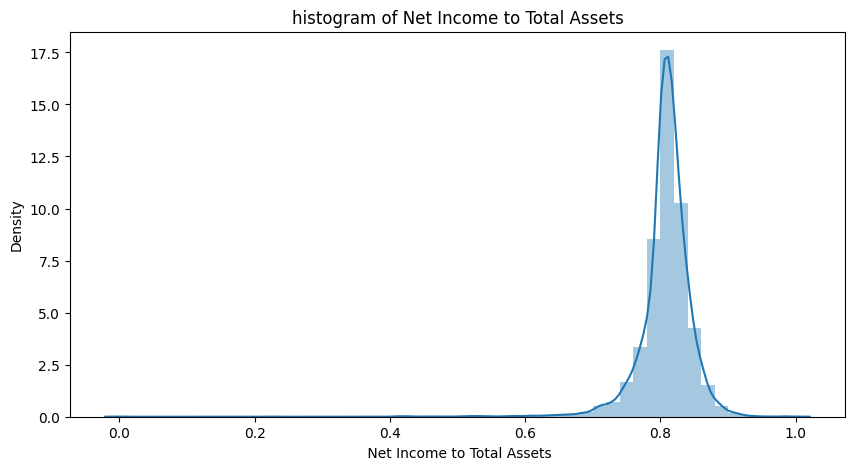

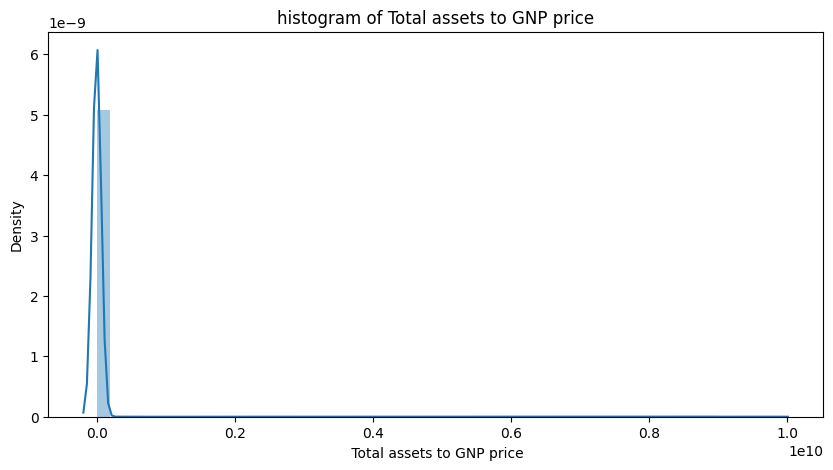

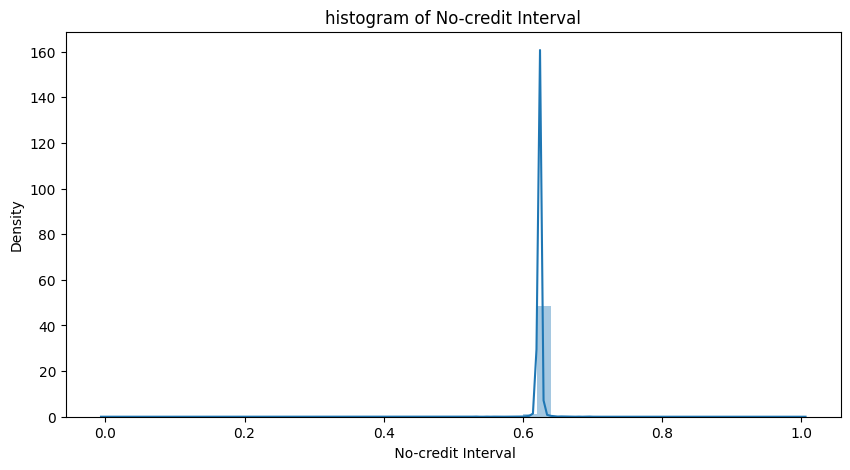

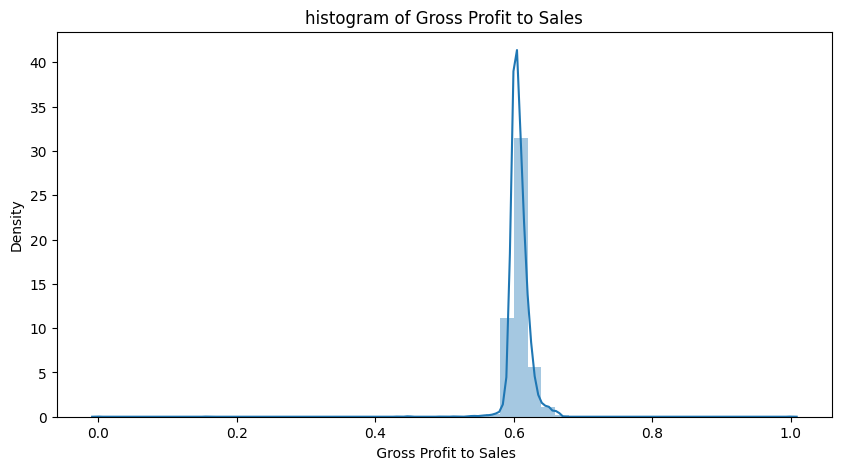

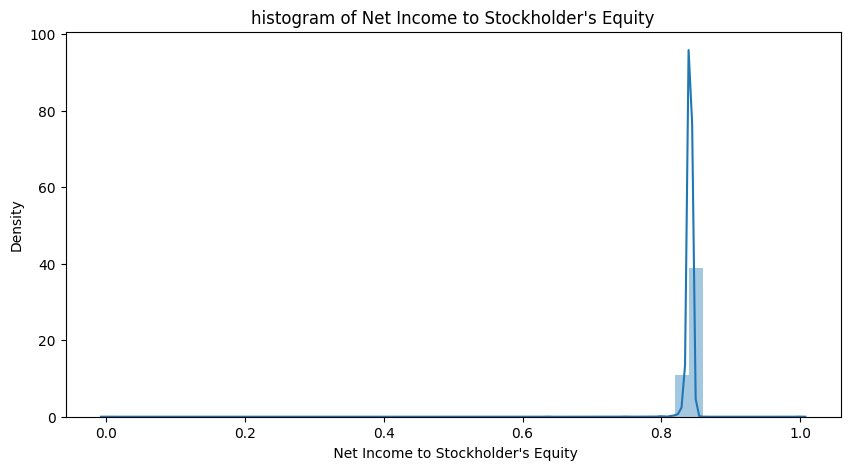

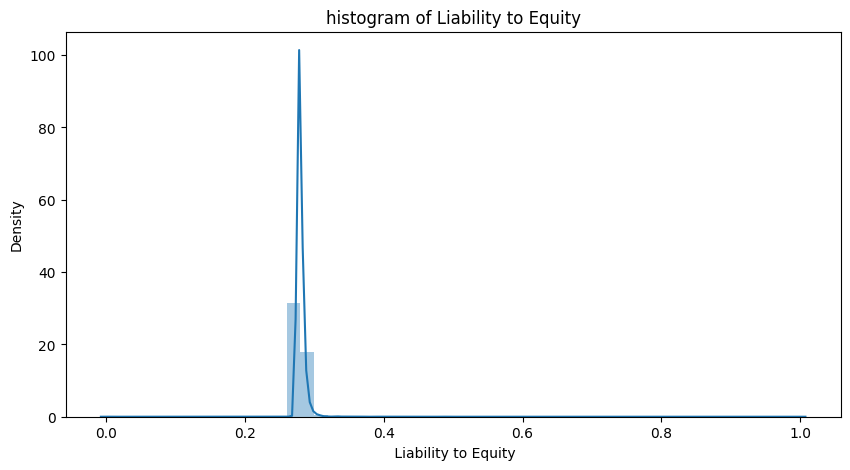

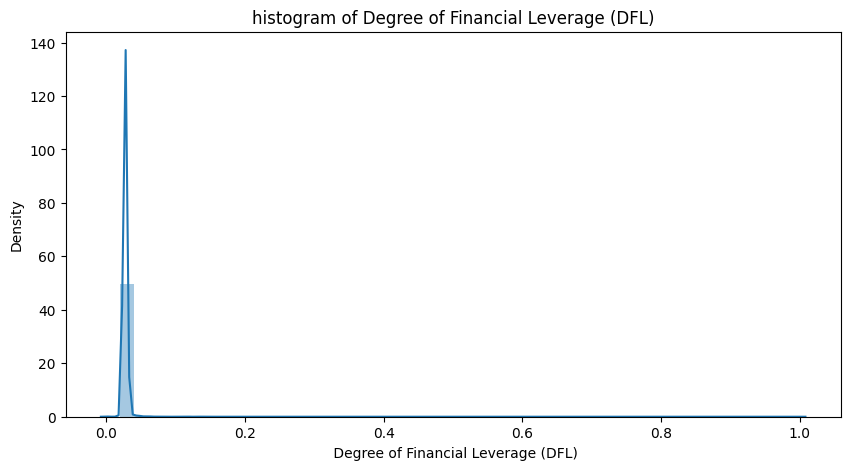

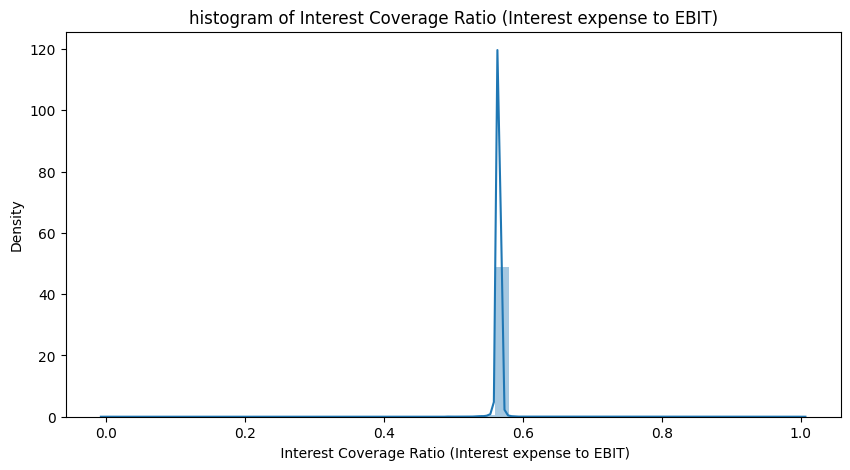

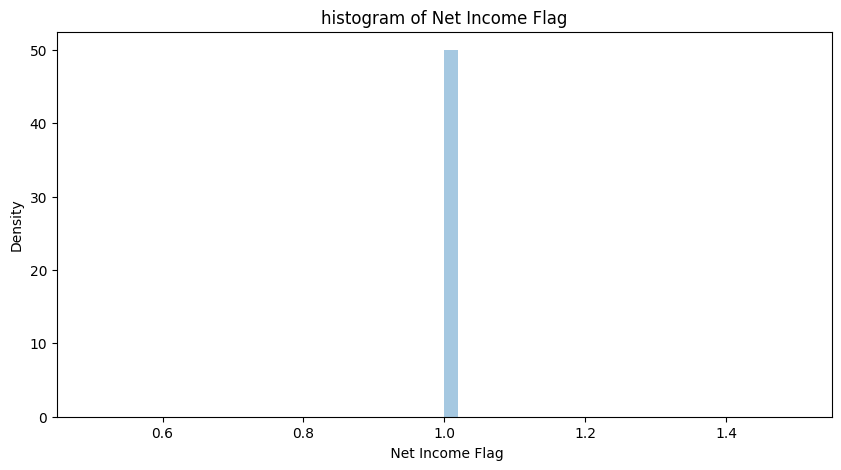

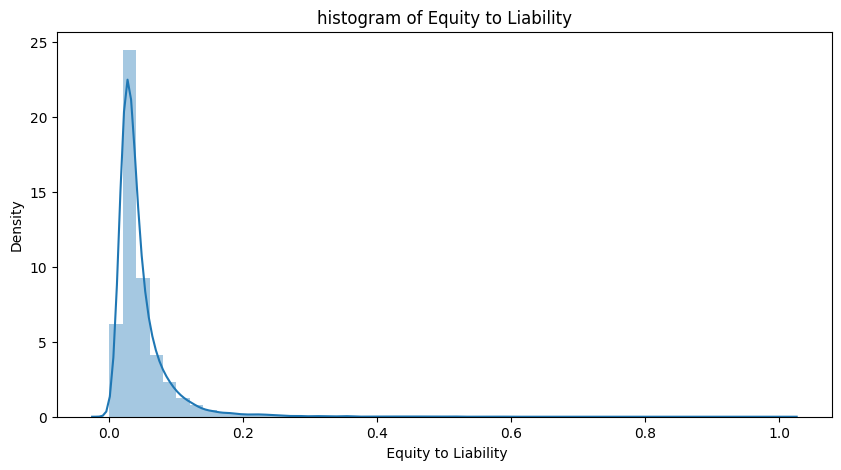

''

In [47]:
# histogram 
for i in list(df.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((df[i]) )
  plt.show()
;

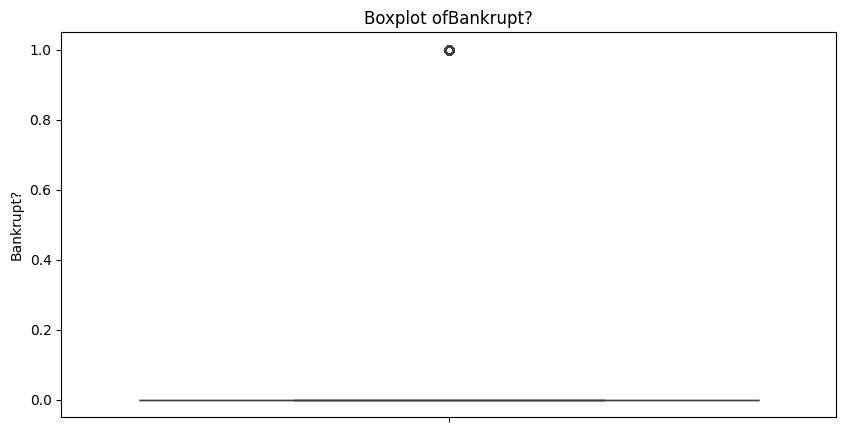

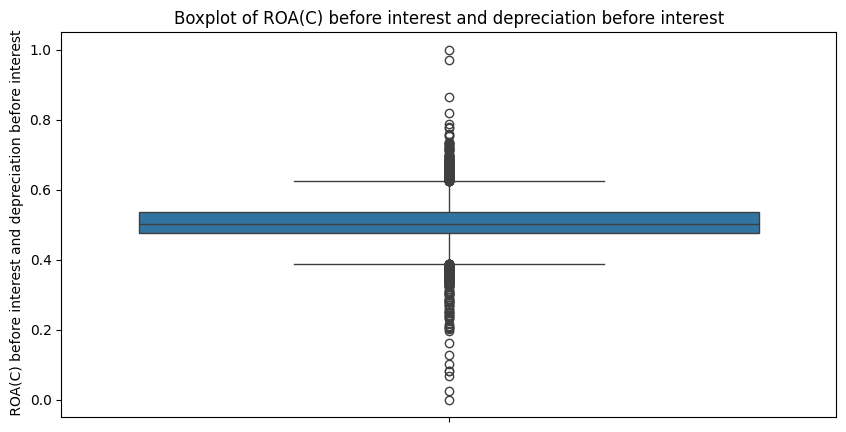

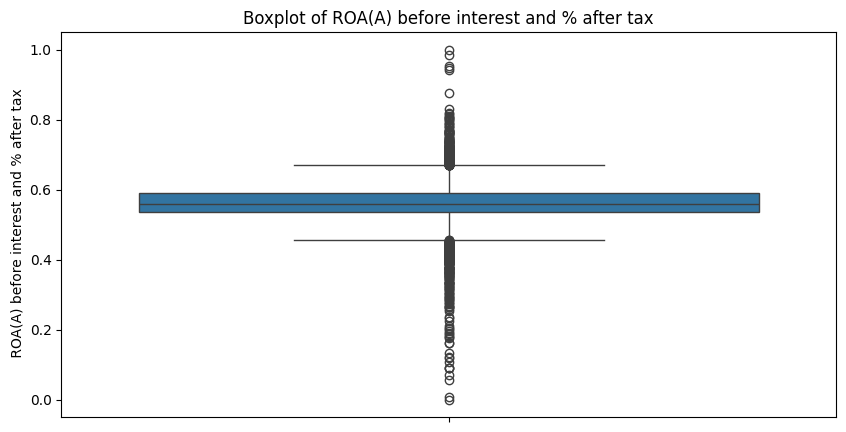

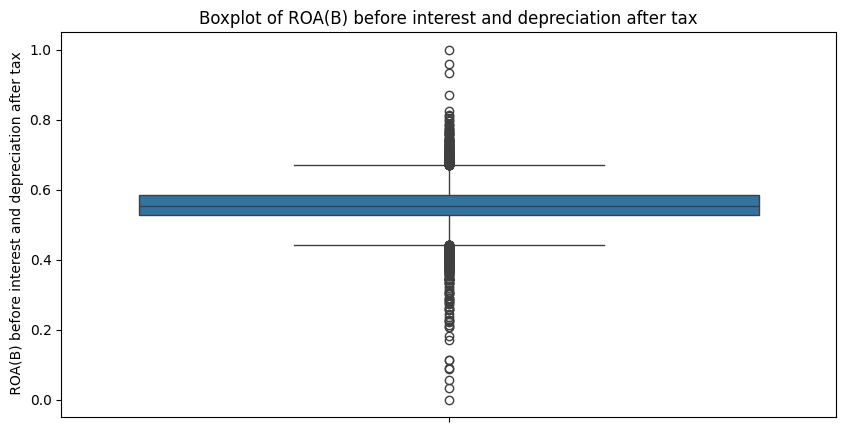

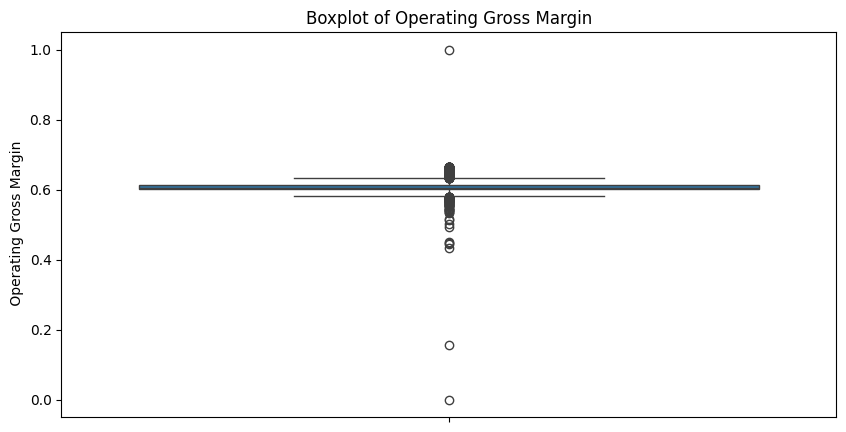

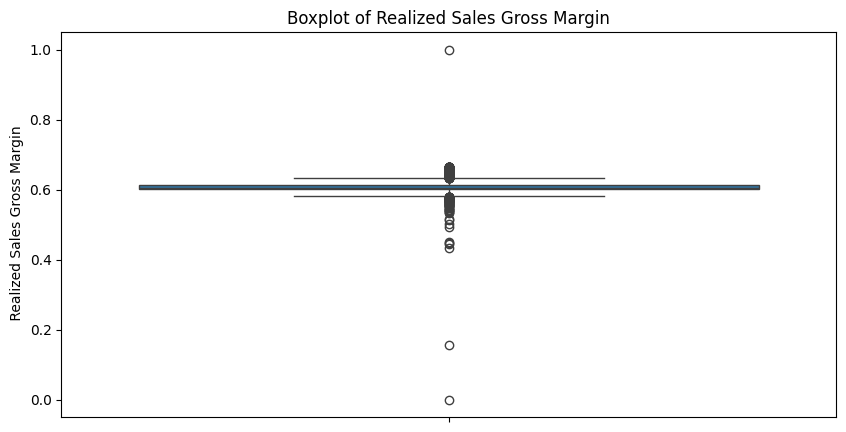

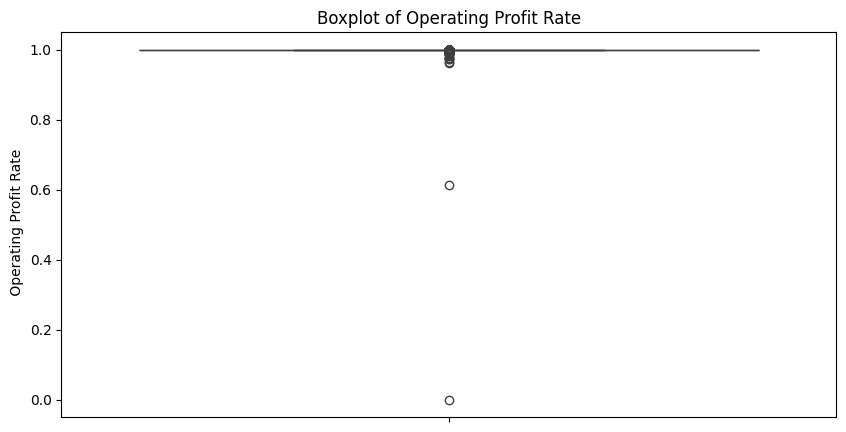

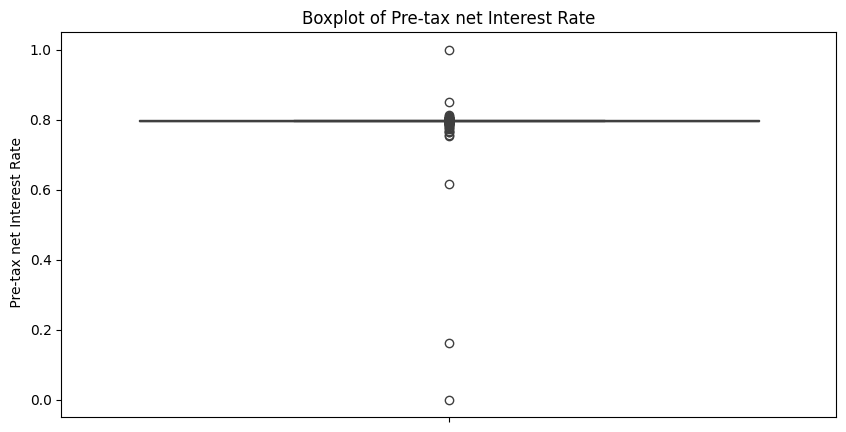

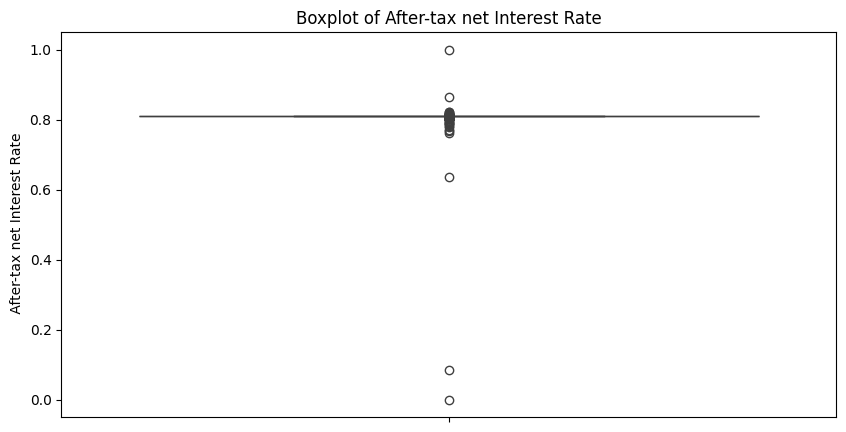

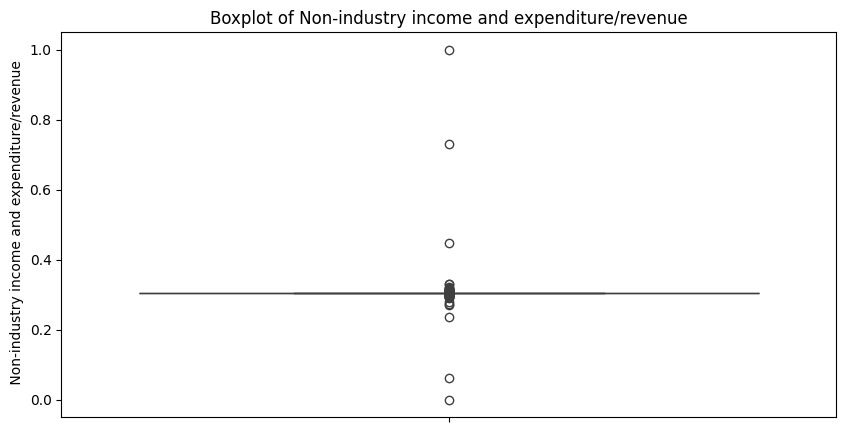

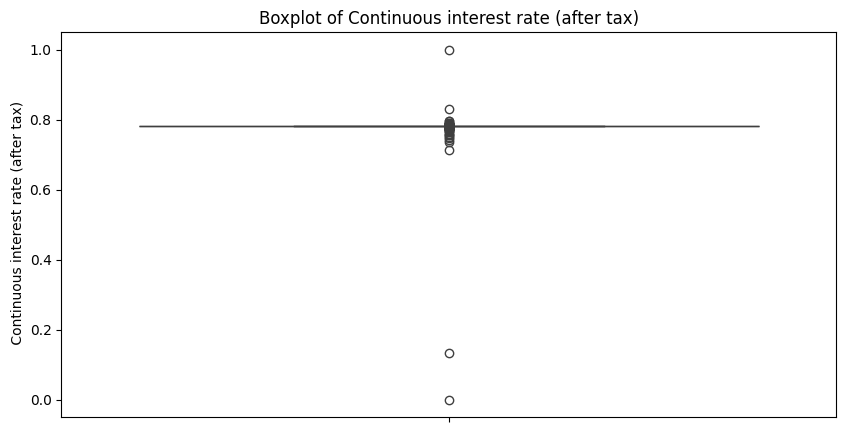

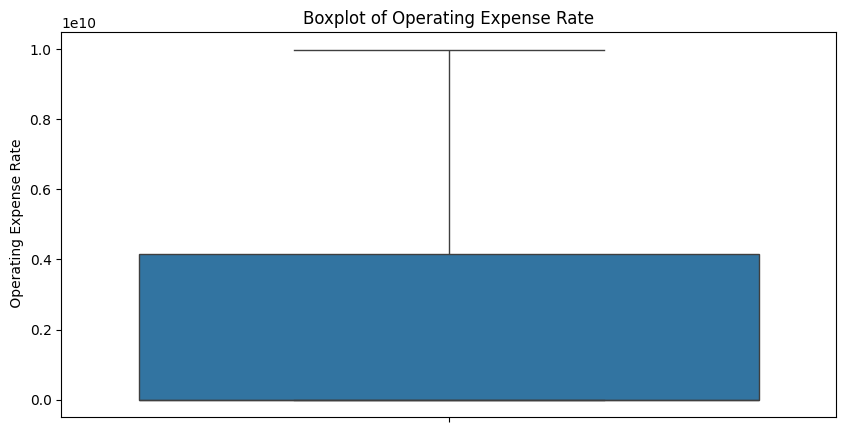

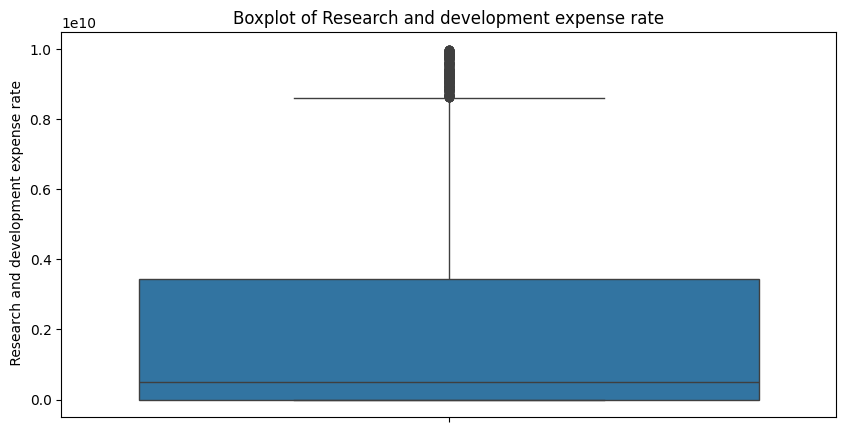

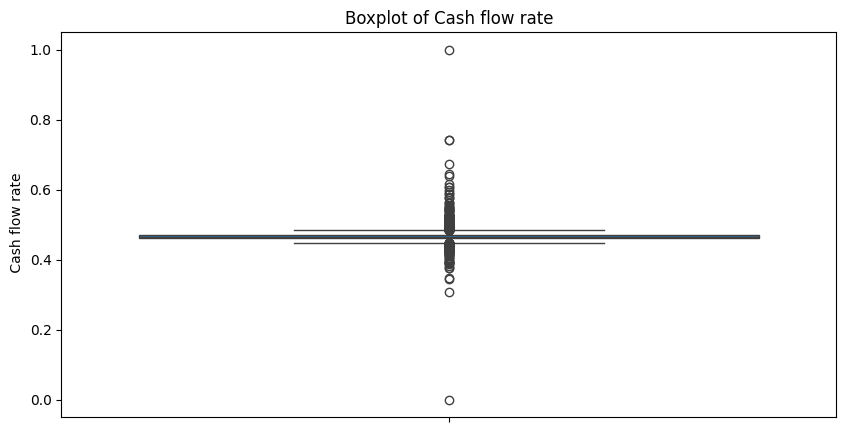

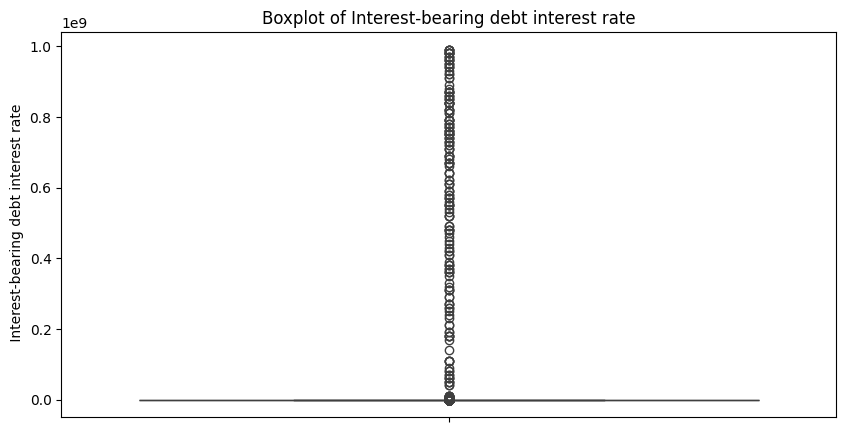

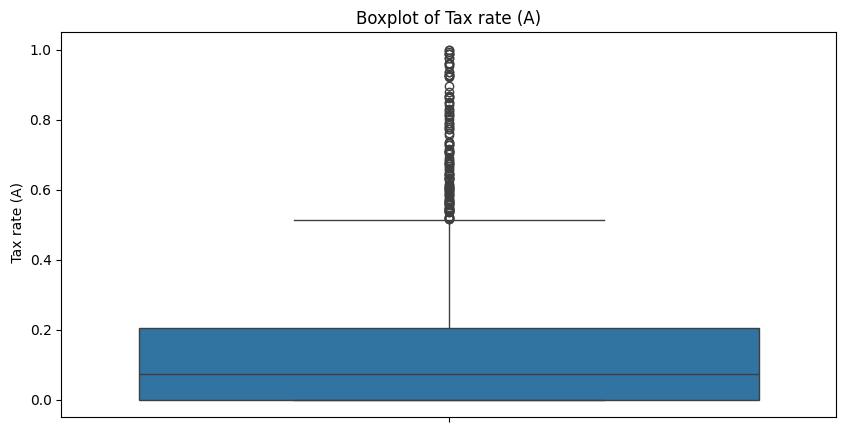

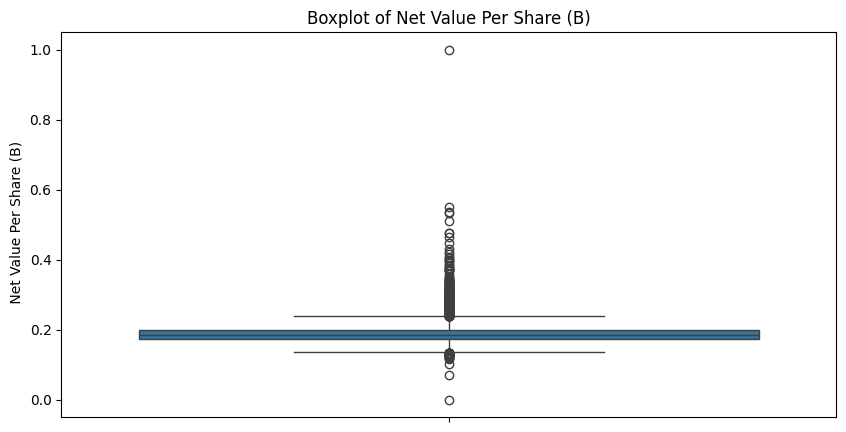

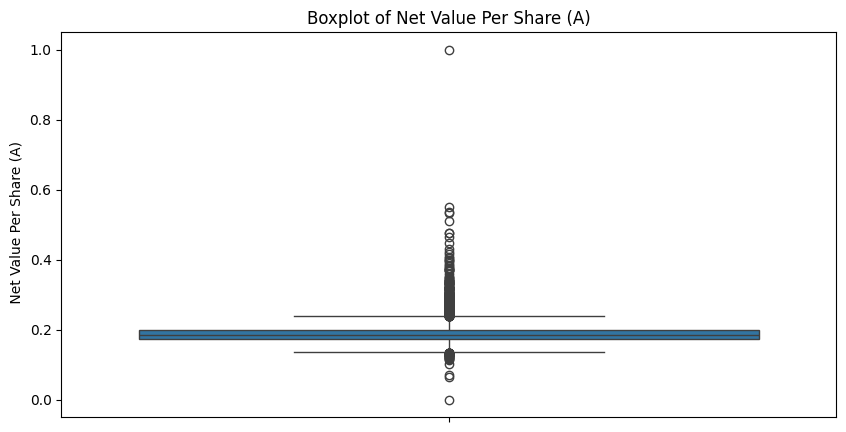

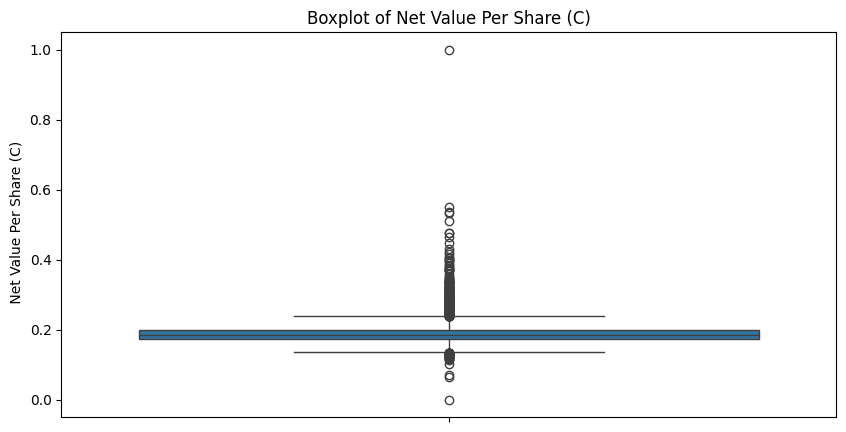

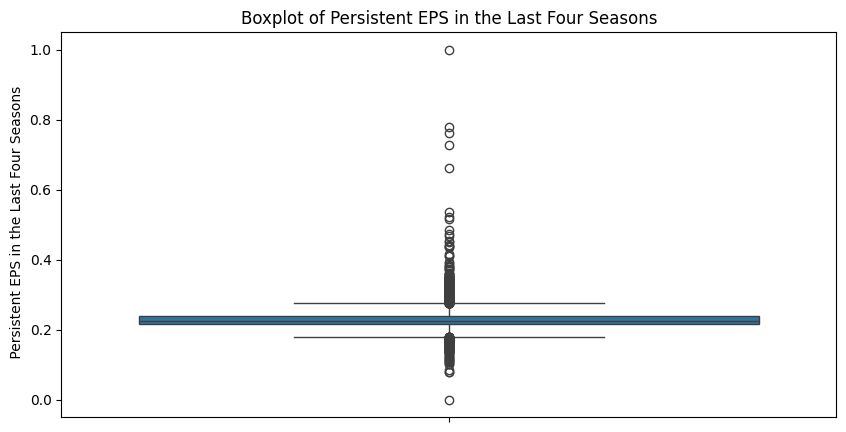

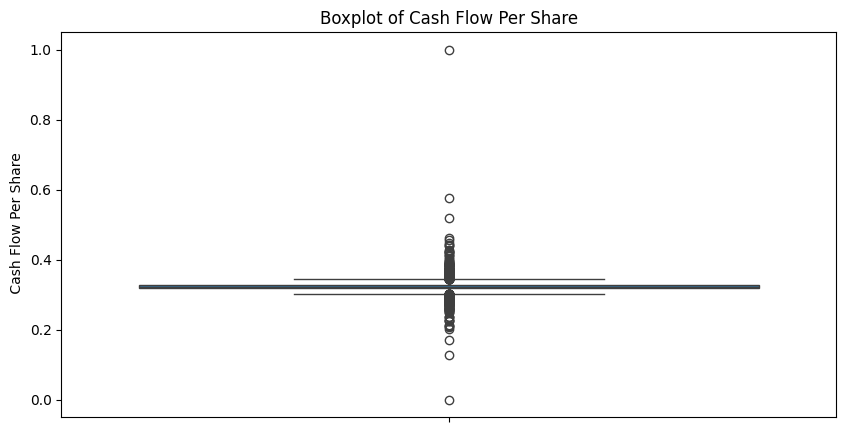

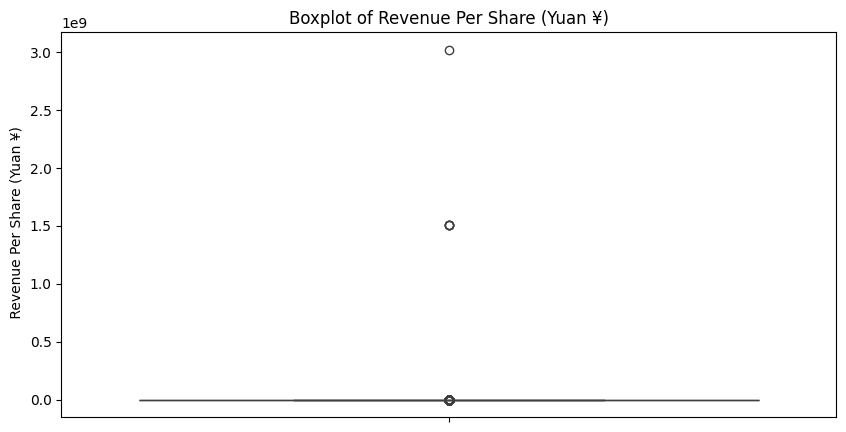

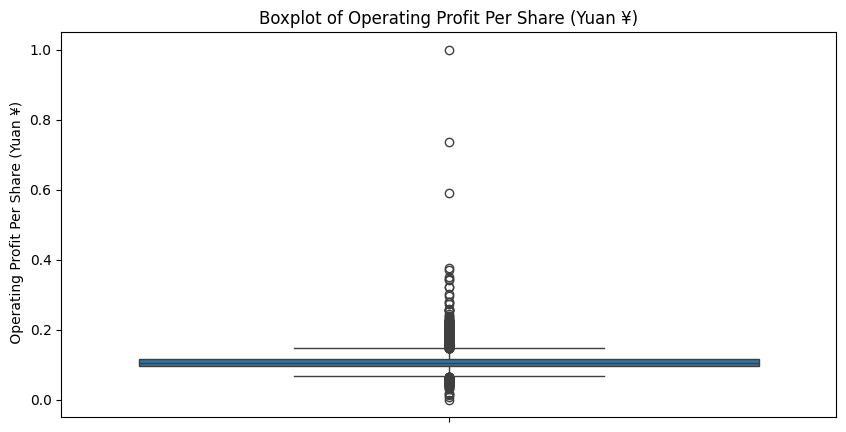

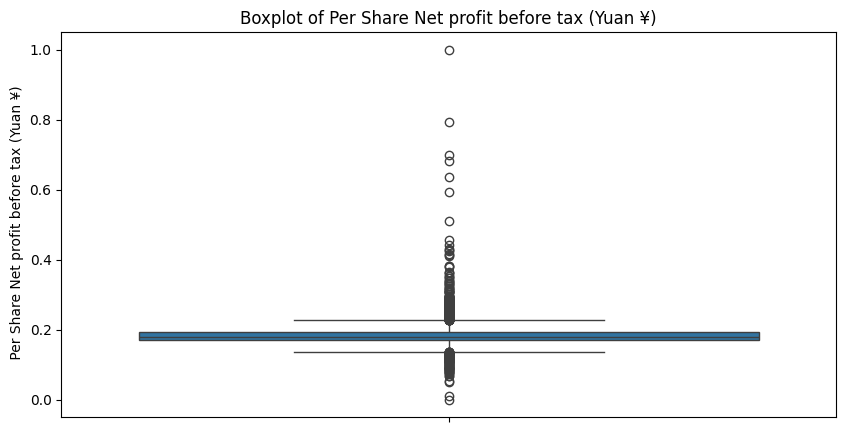

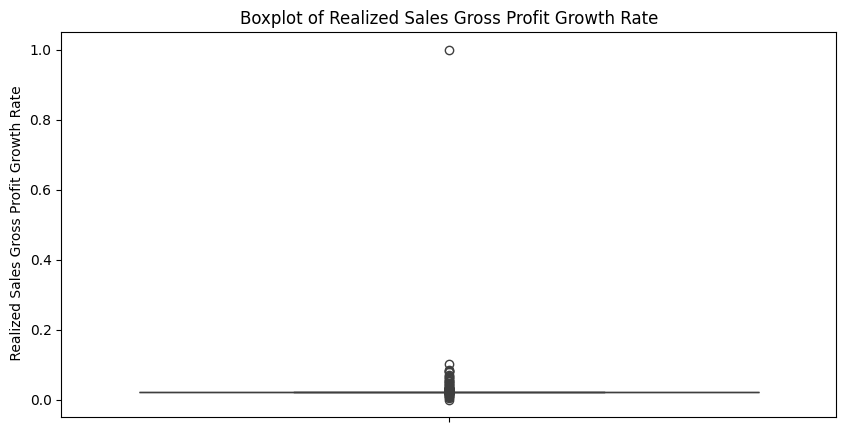

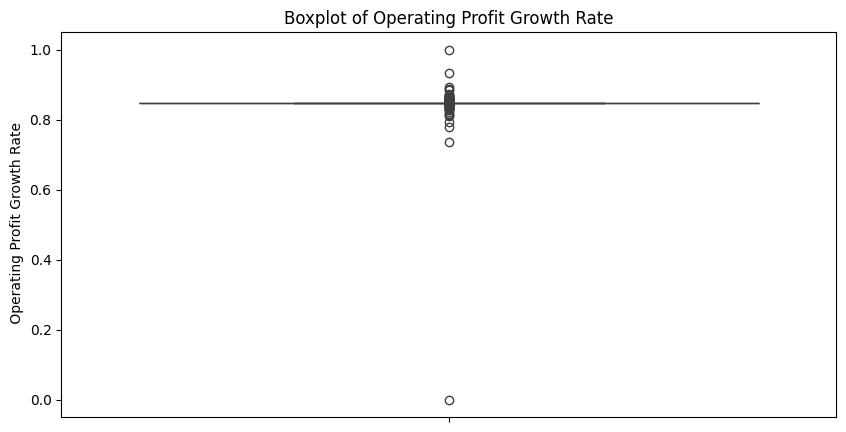

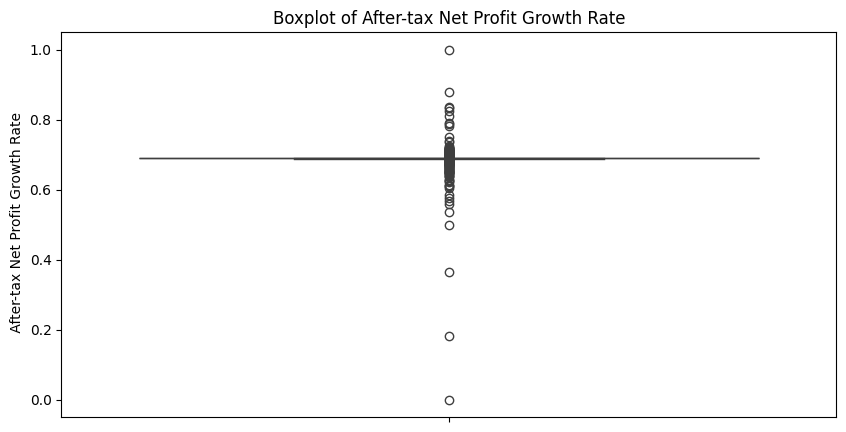

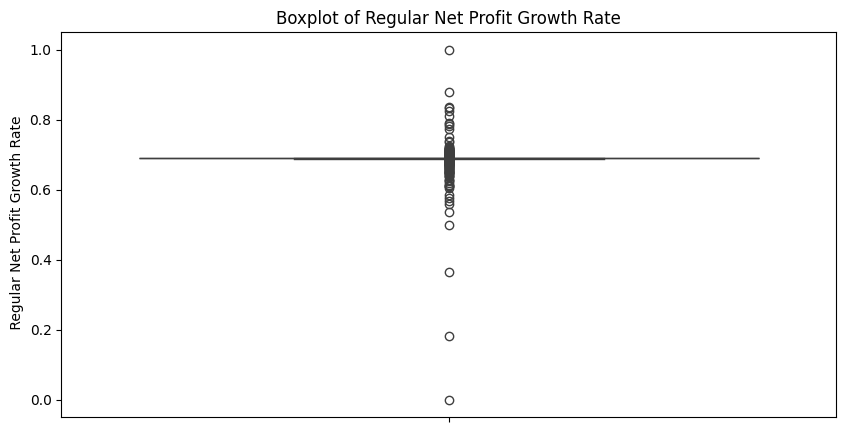

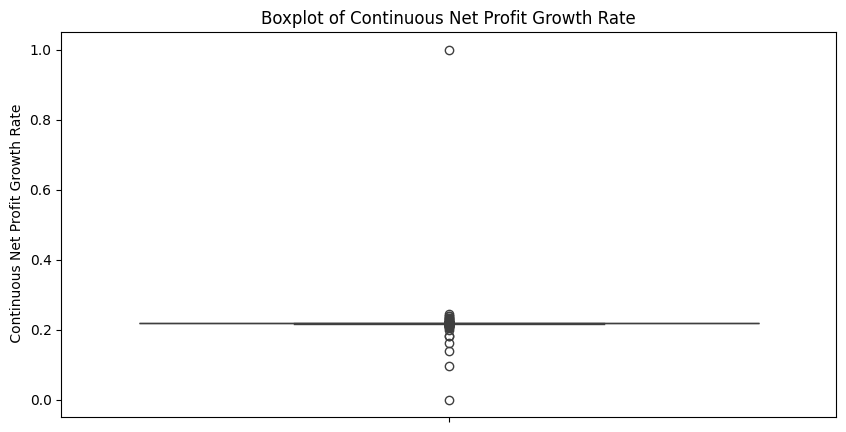

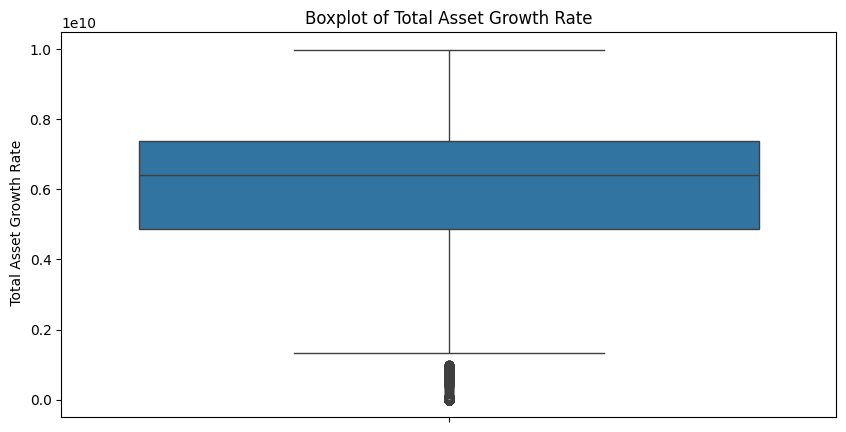

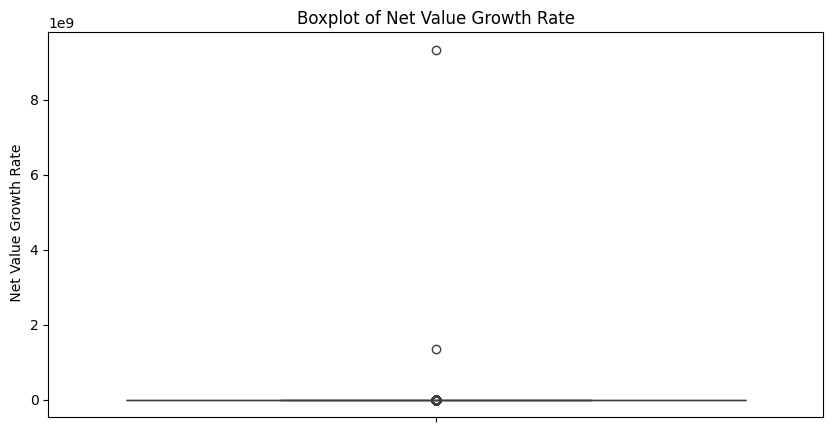

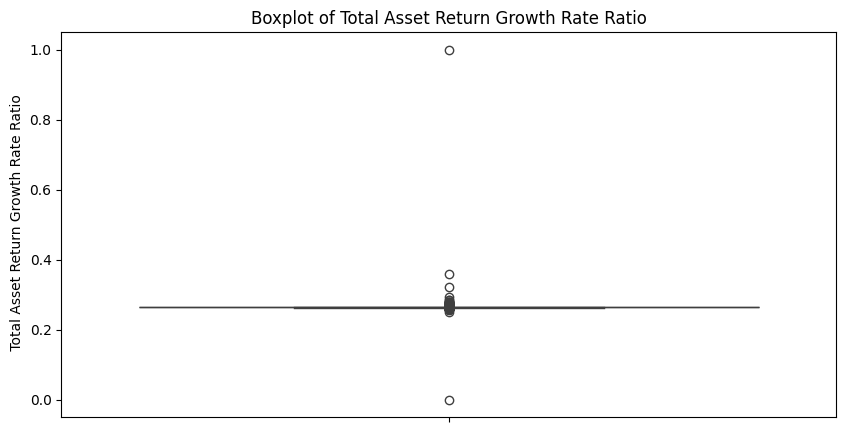

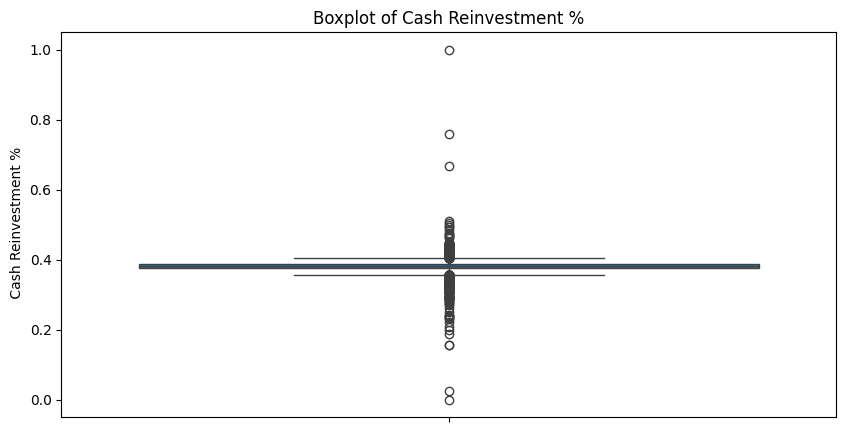

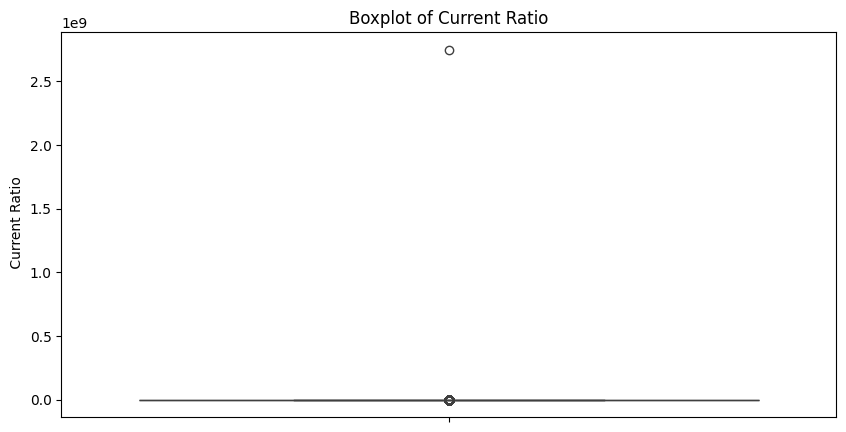

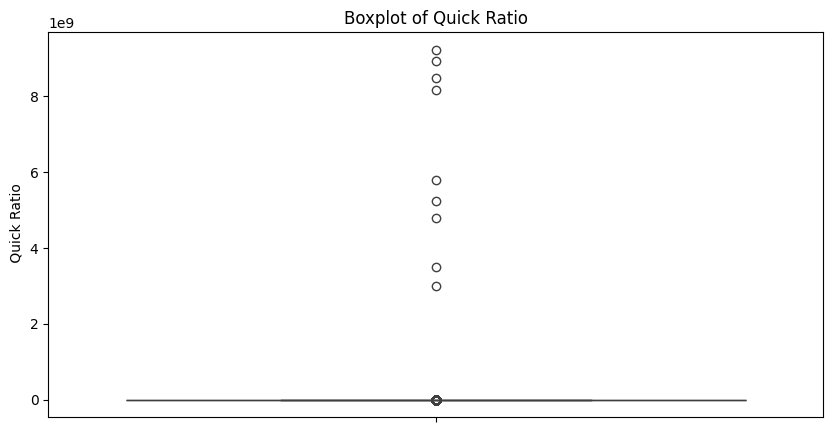

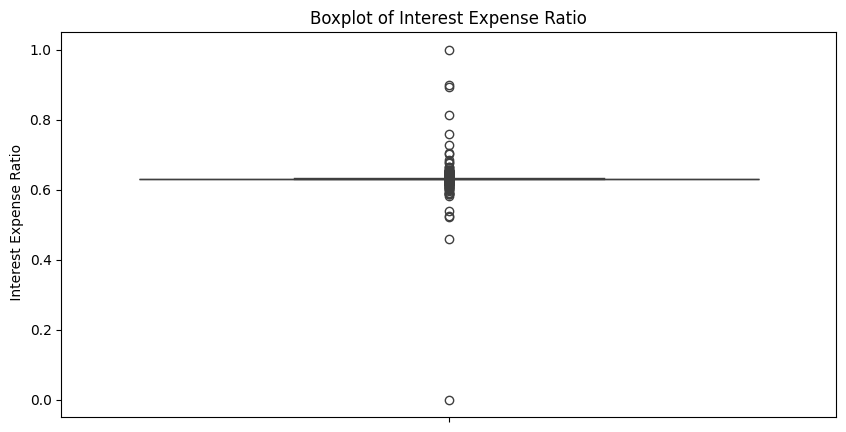

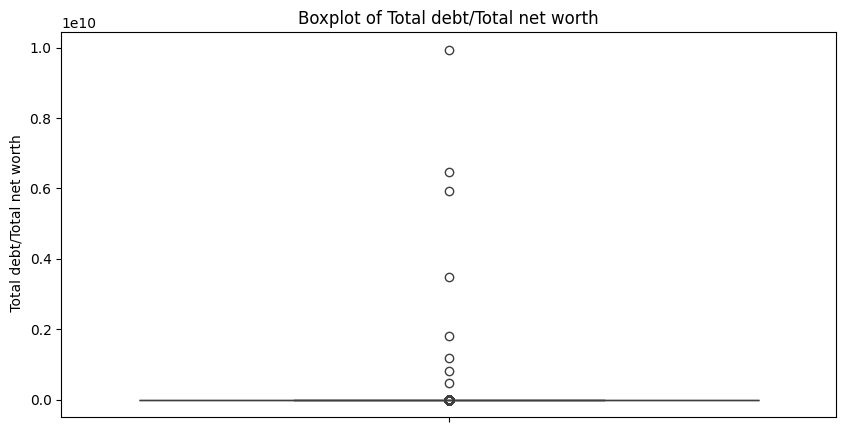

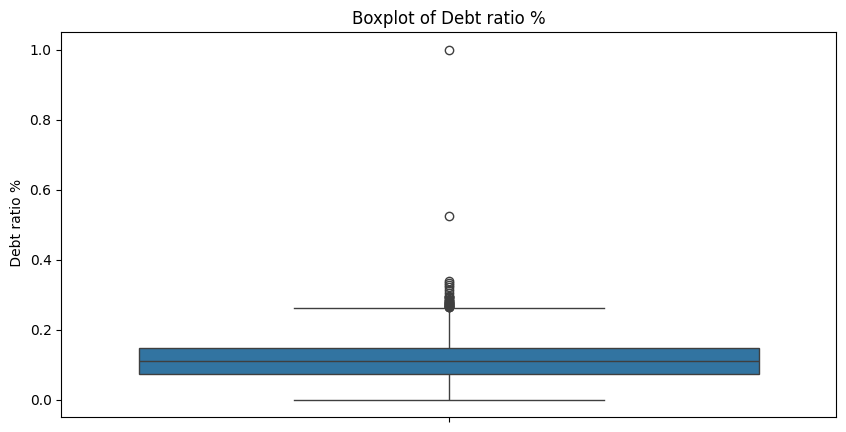

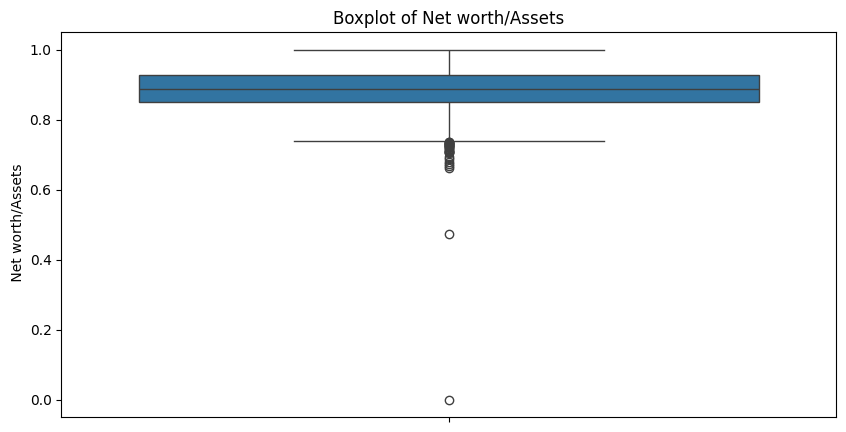

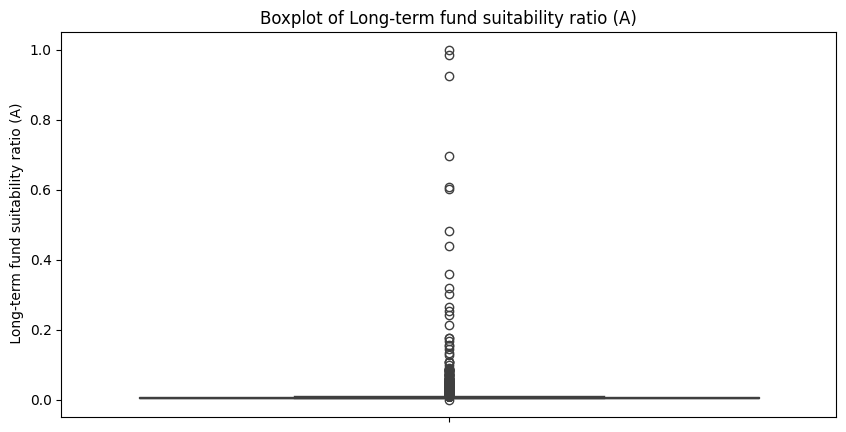

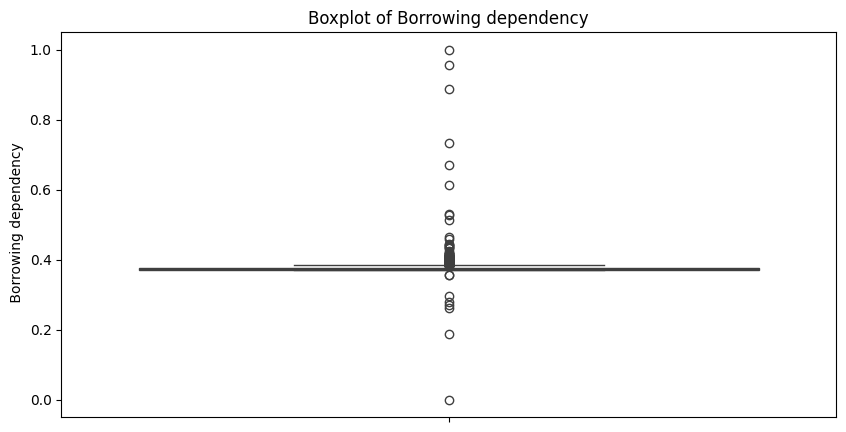

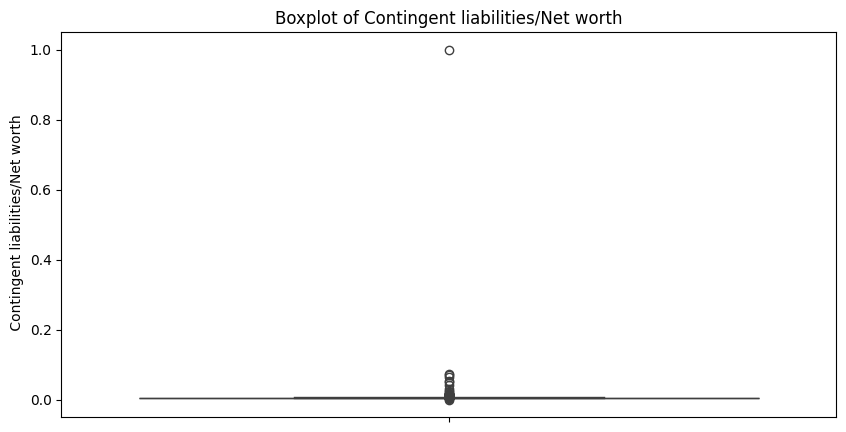

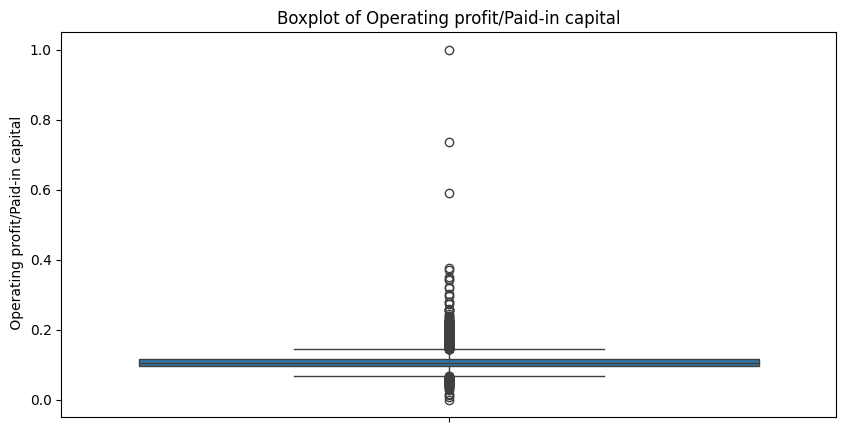

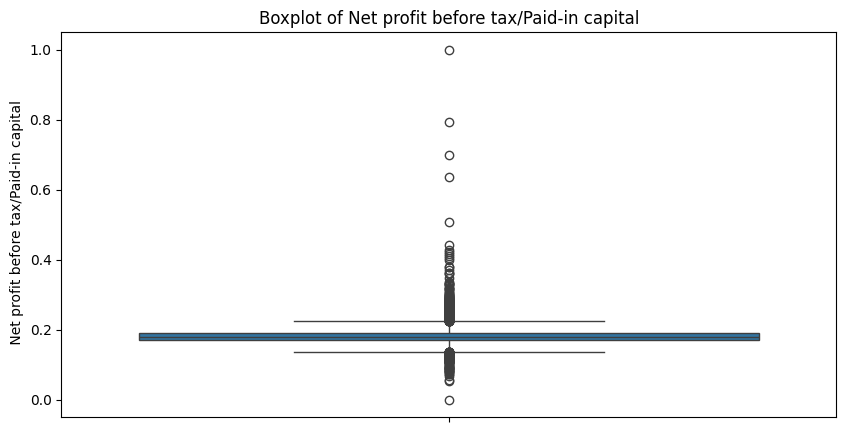

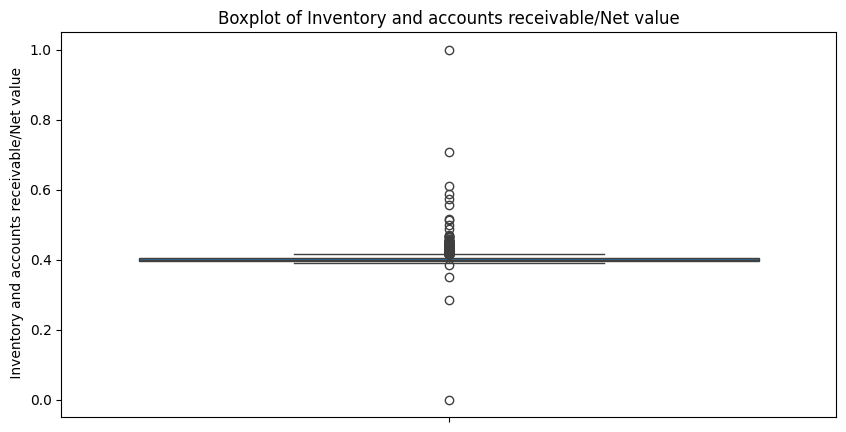

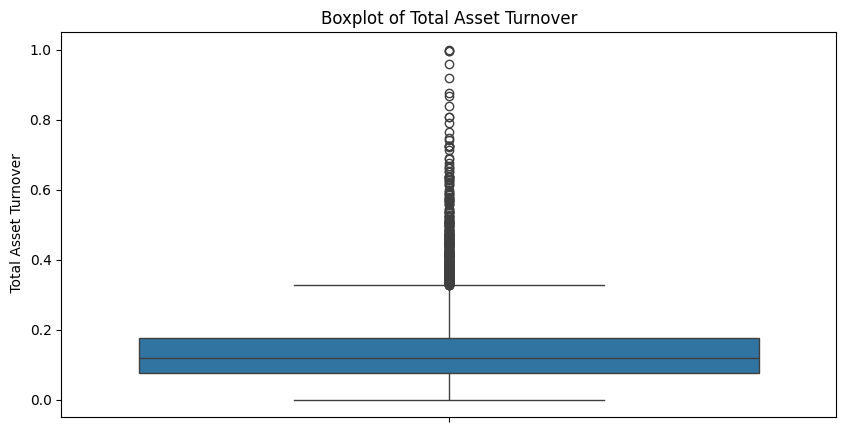

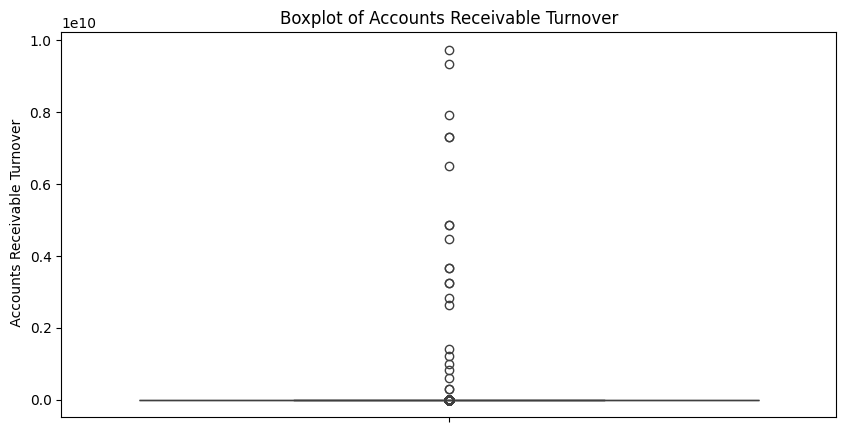

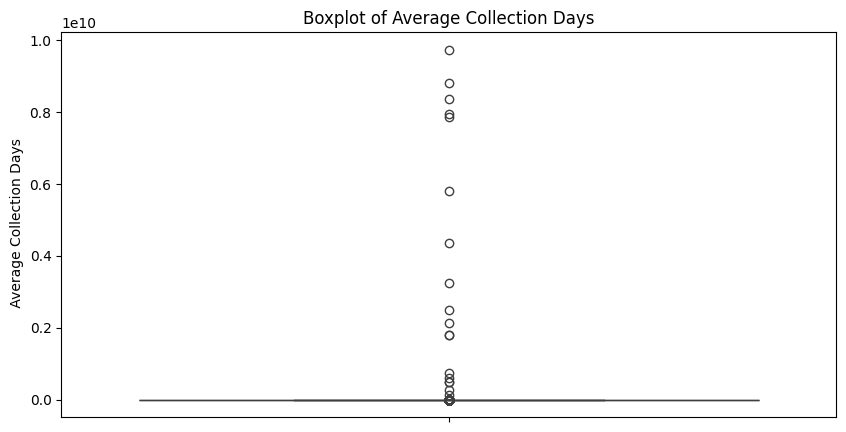

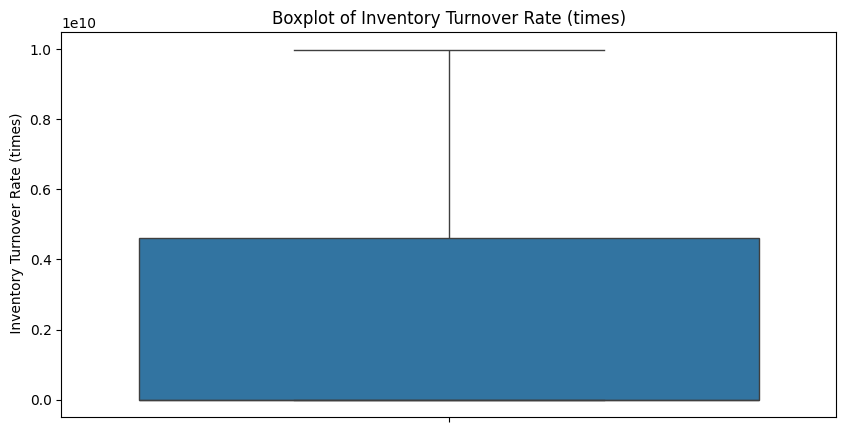

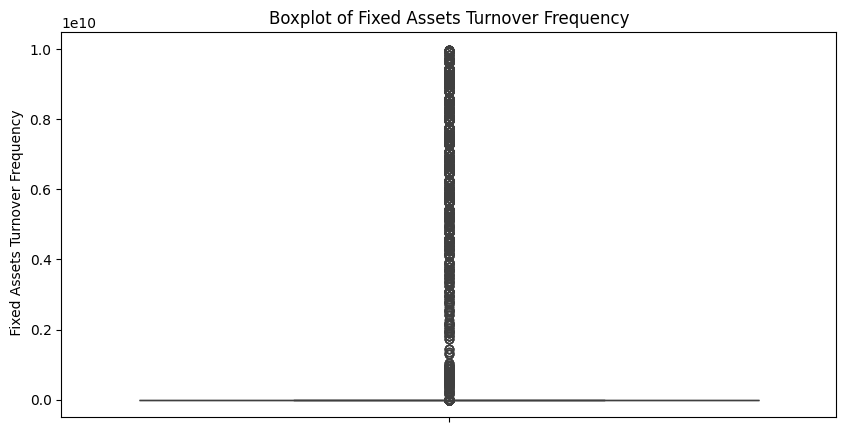

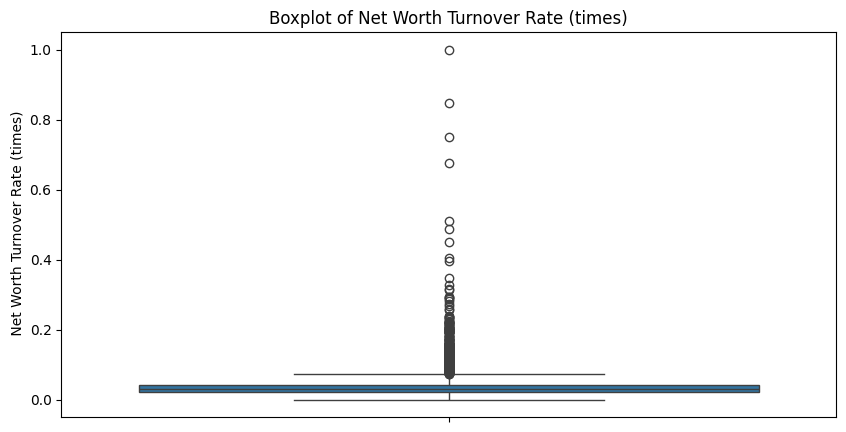

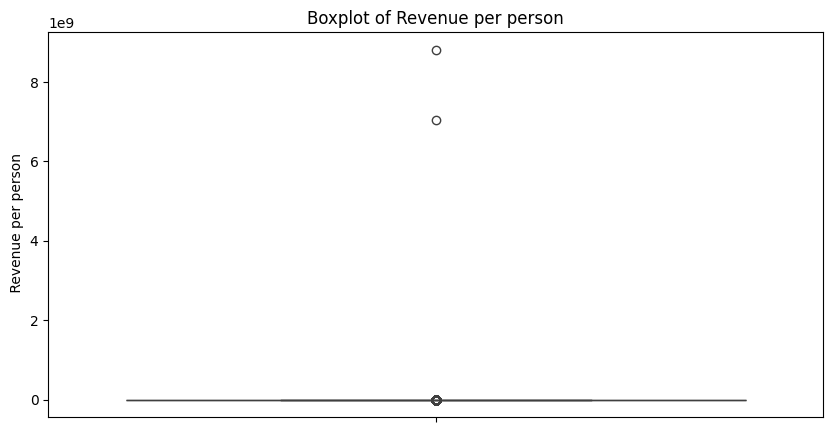

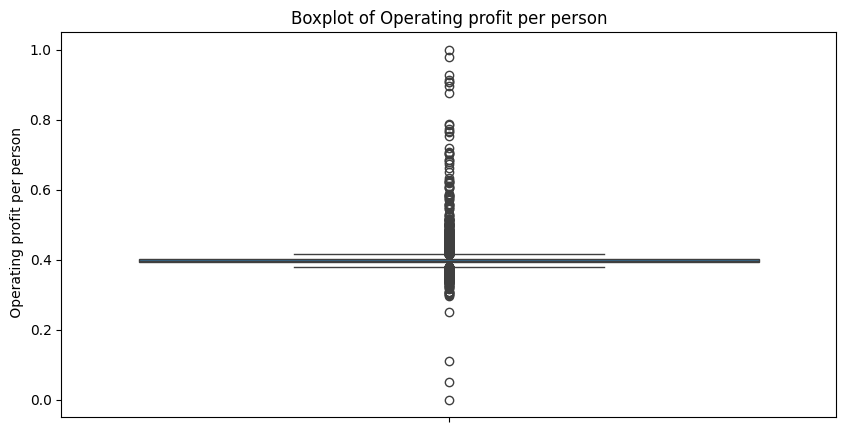

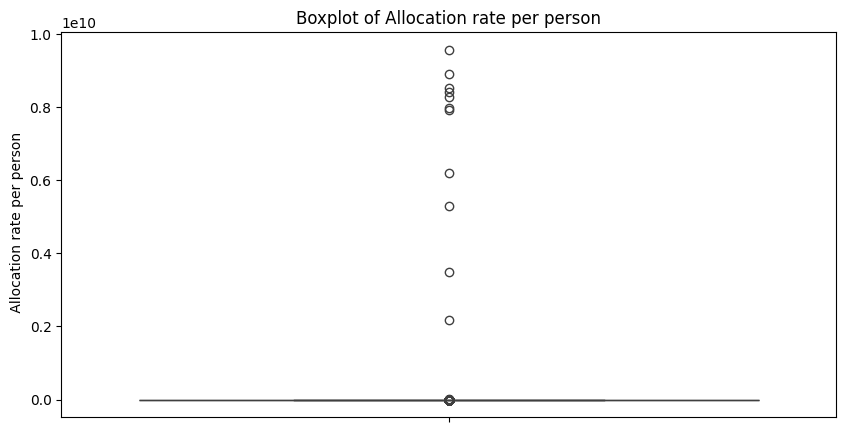

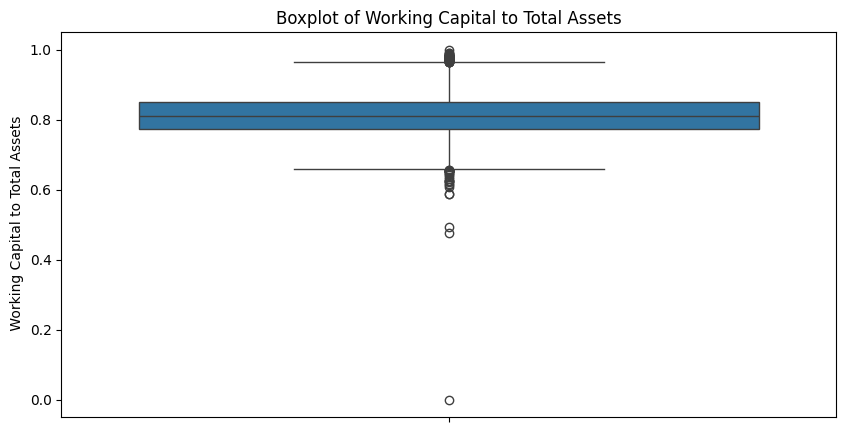

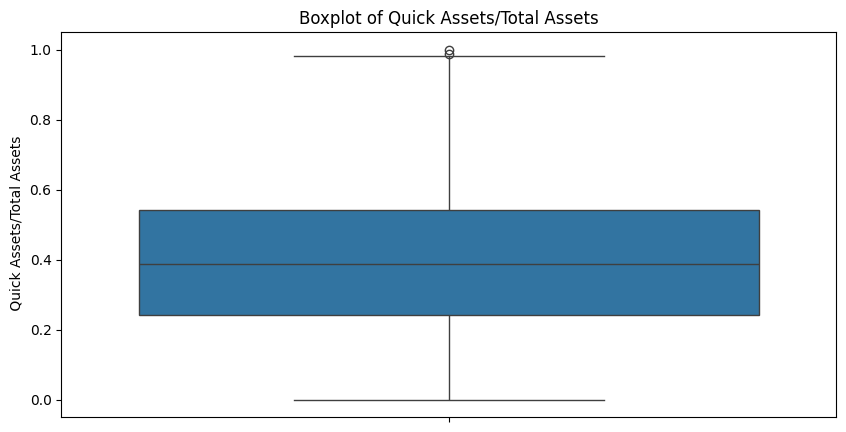

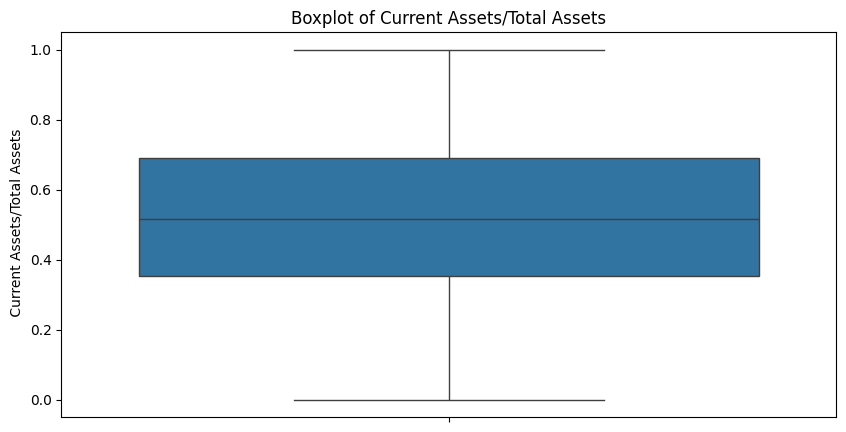

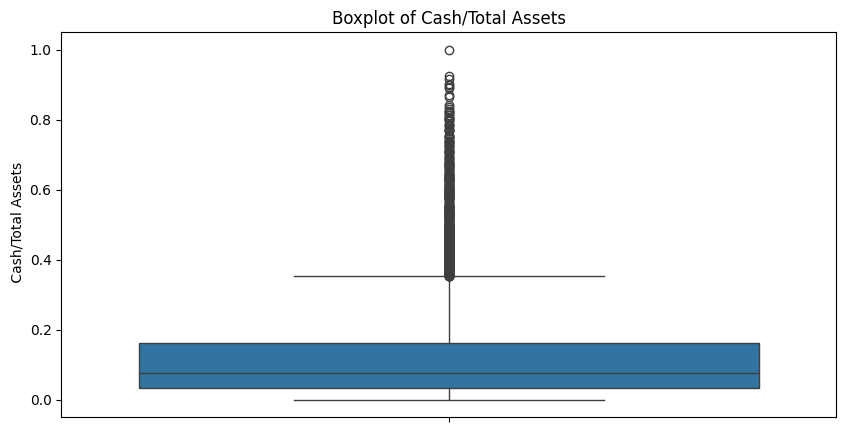

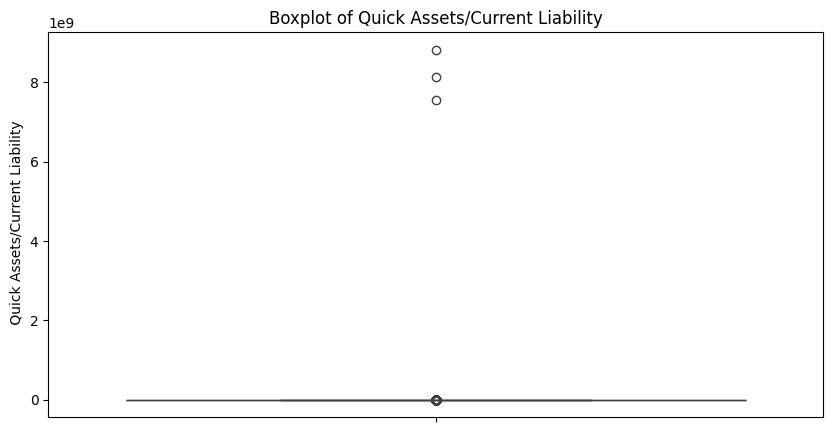

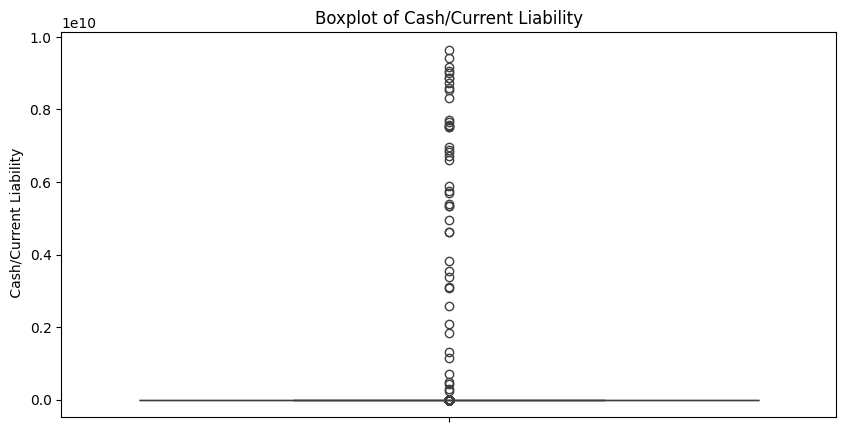

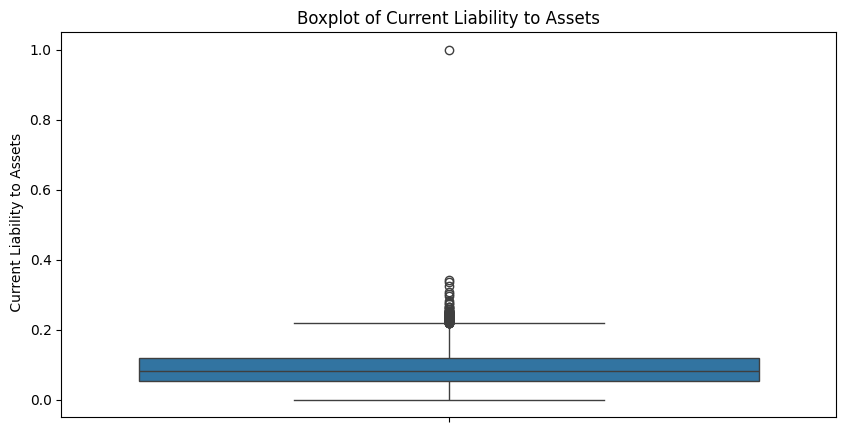

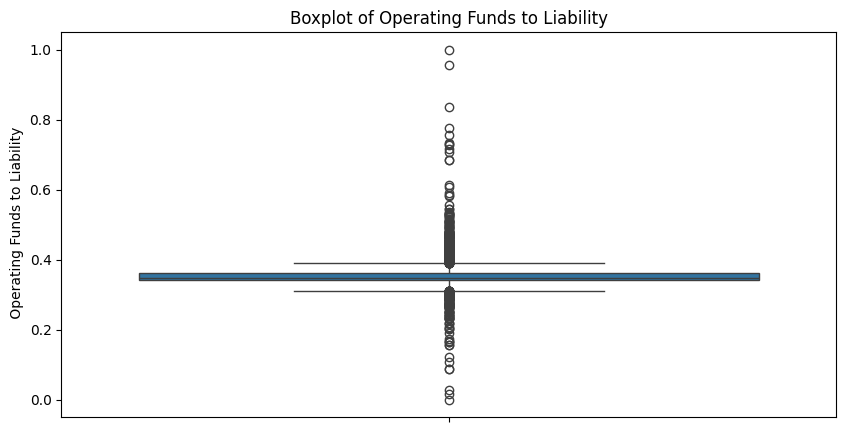

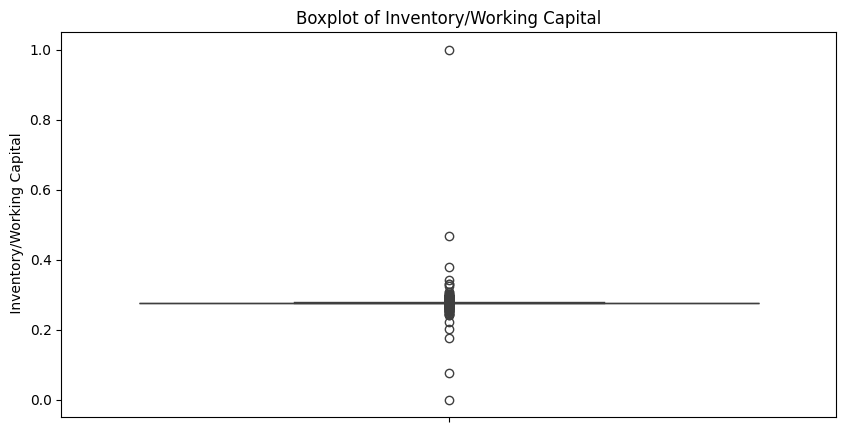

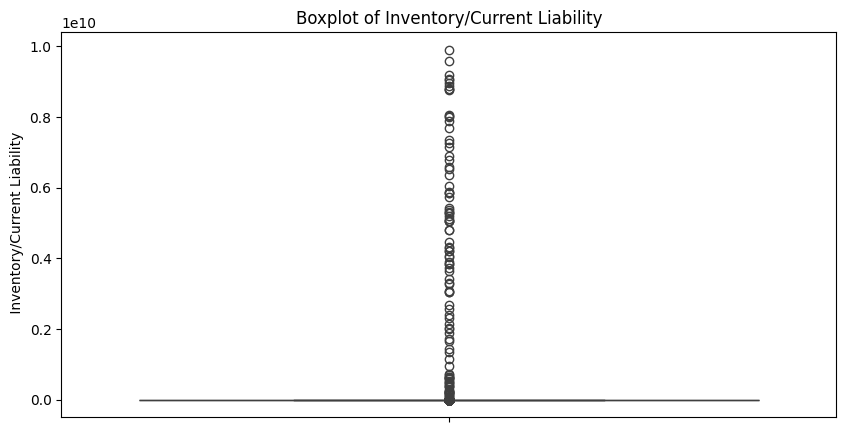

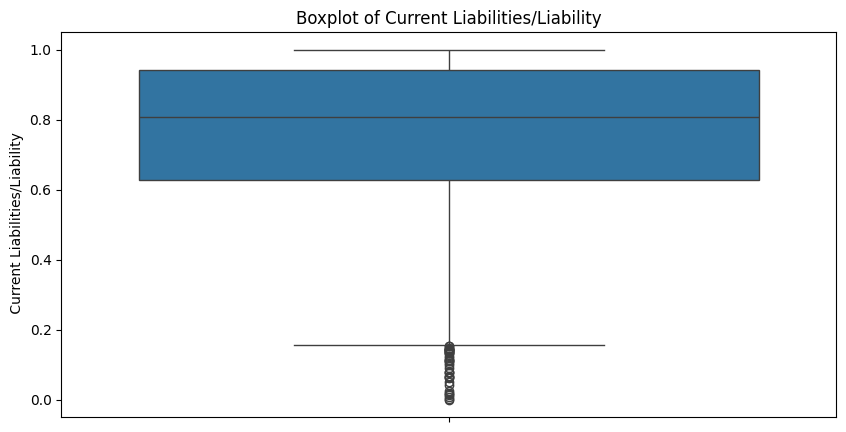

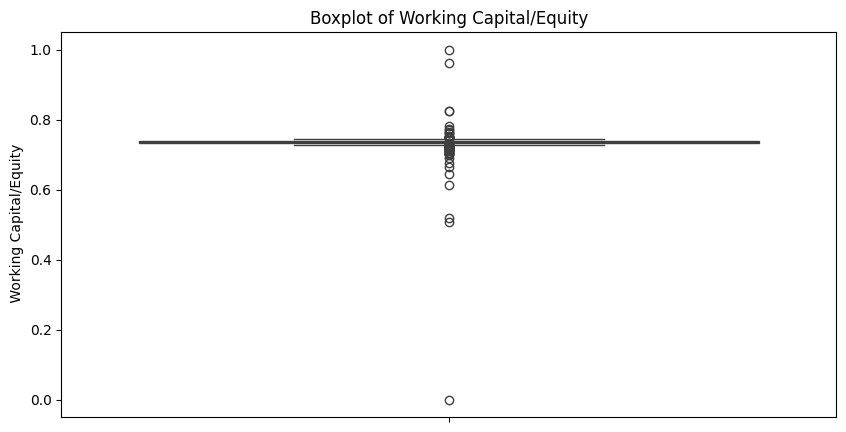

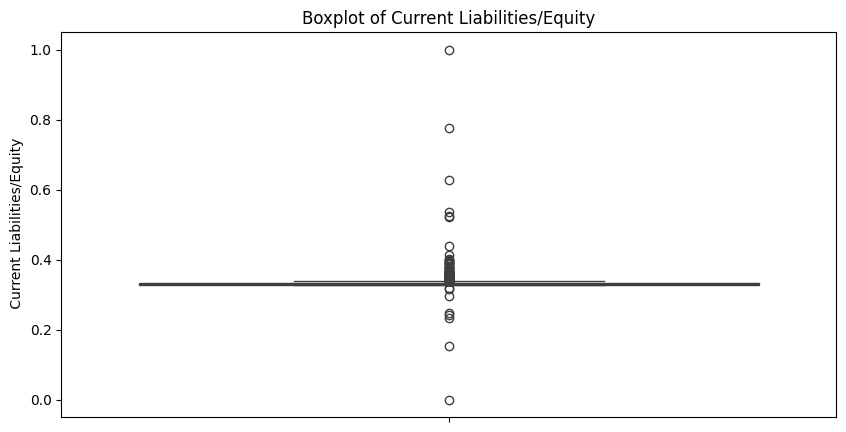

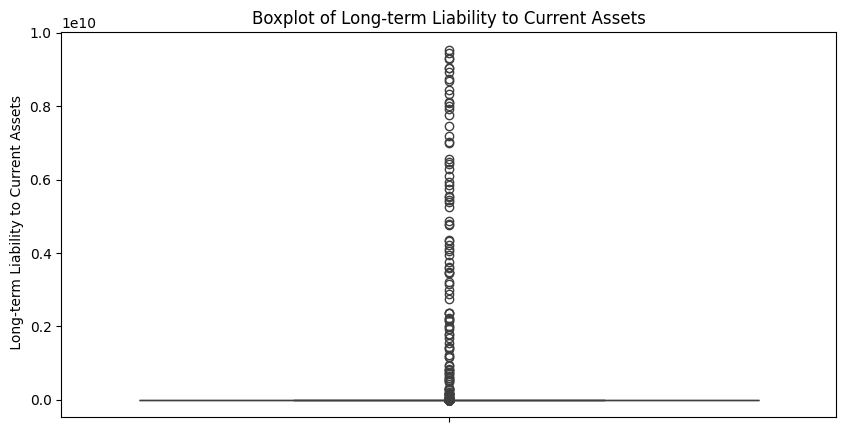

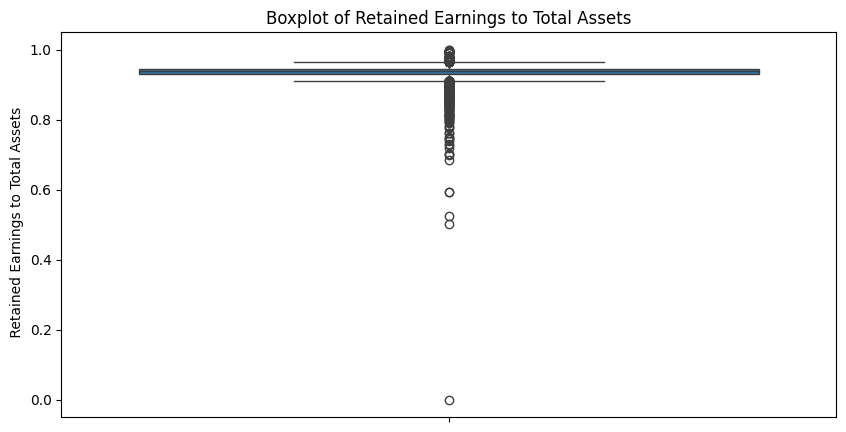

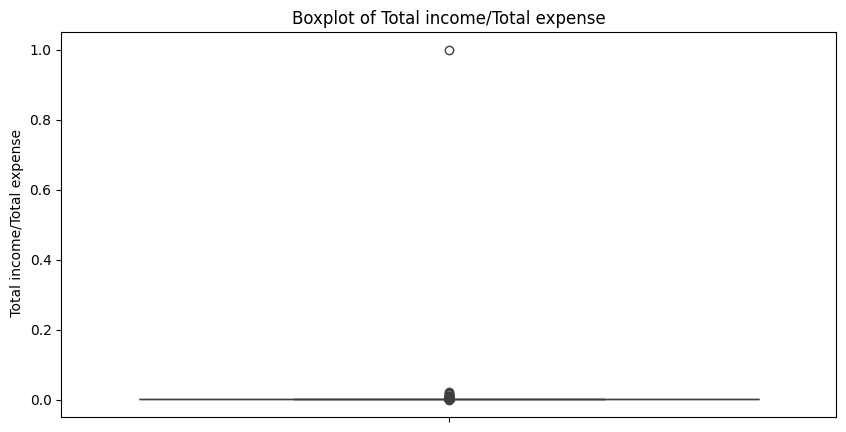

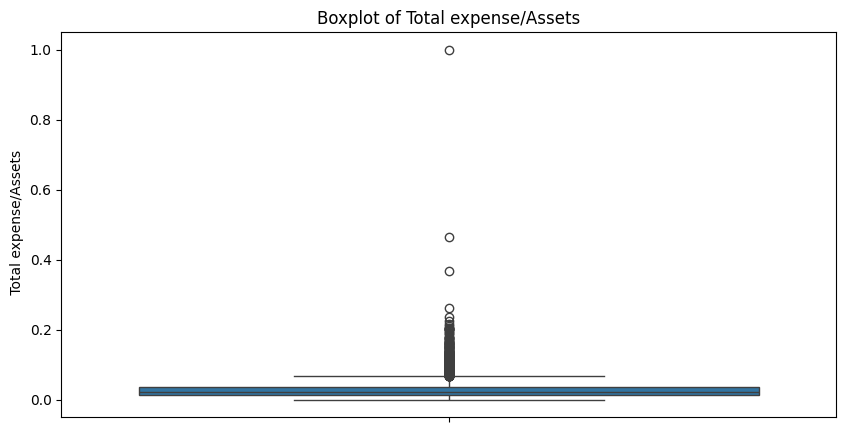

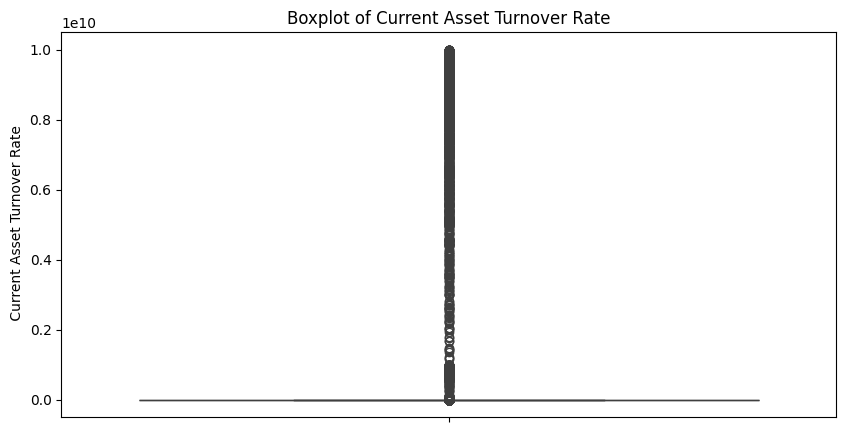

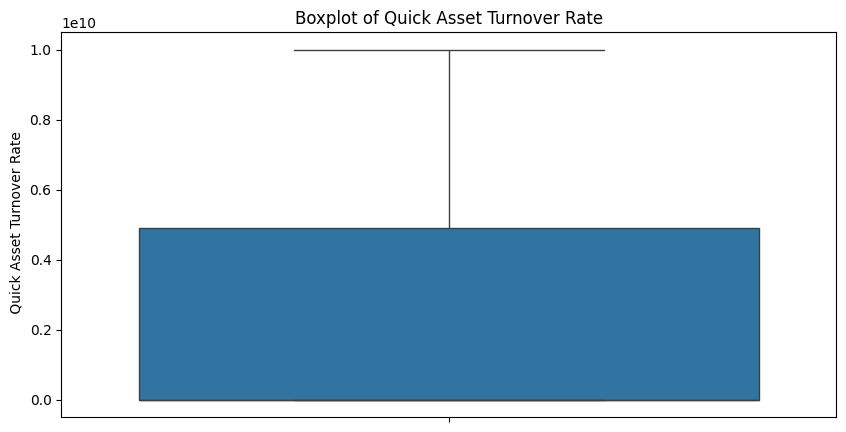

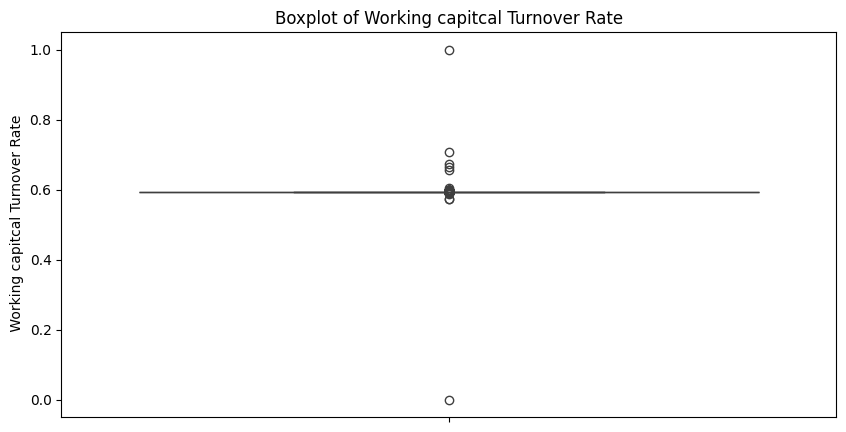

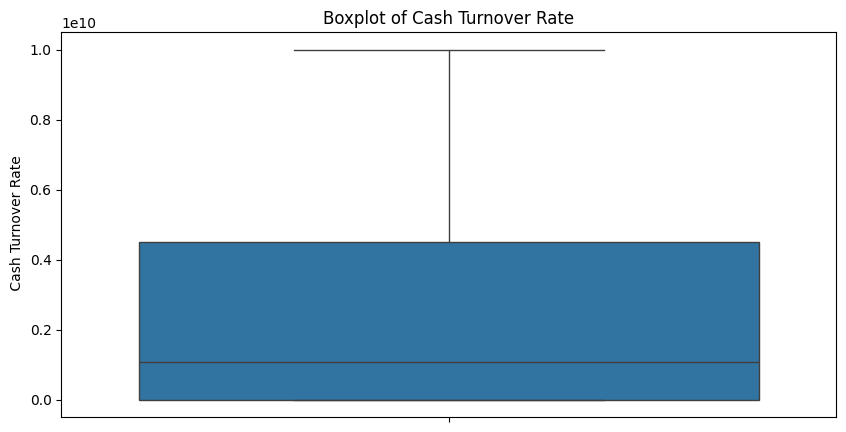

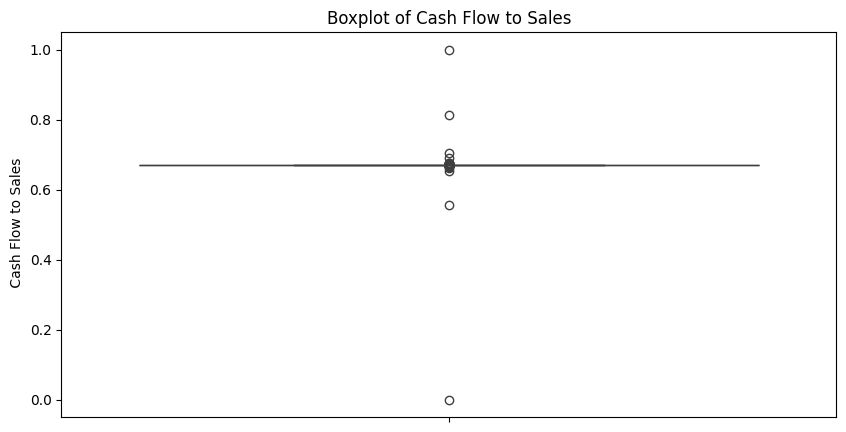

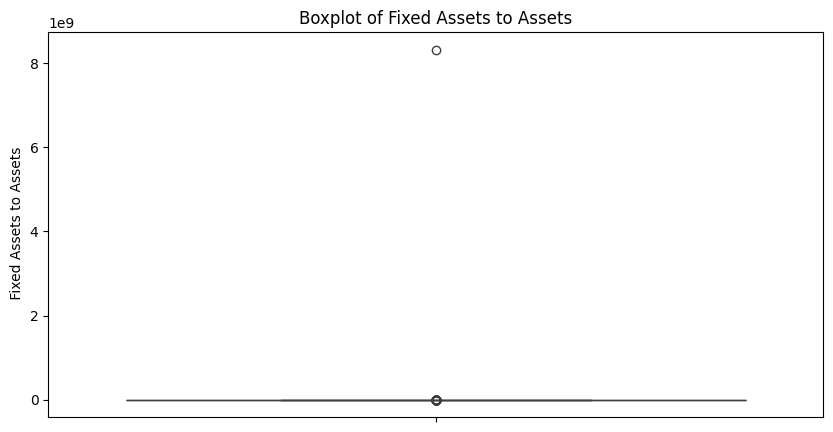

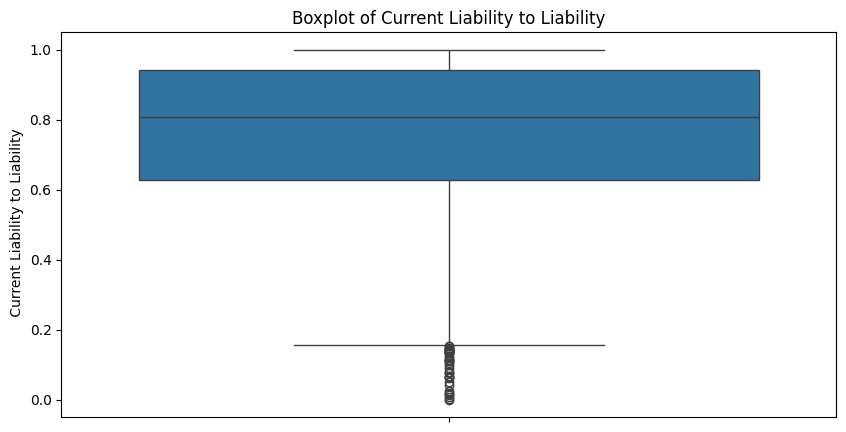

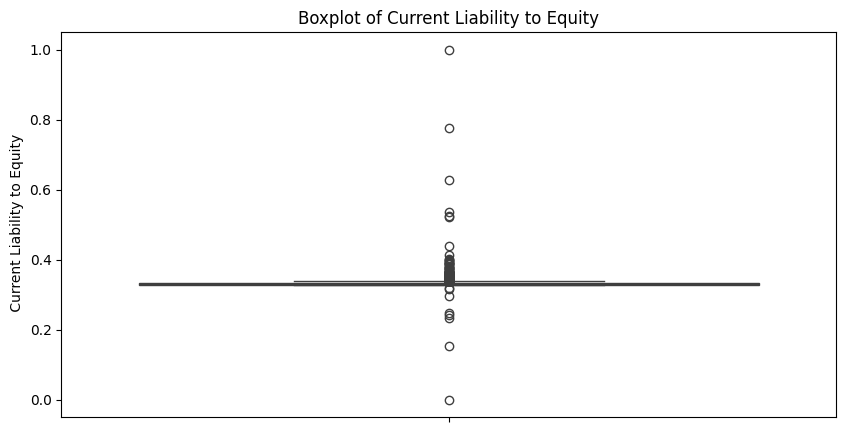

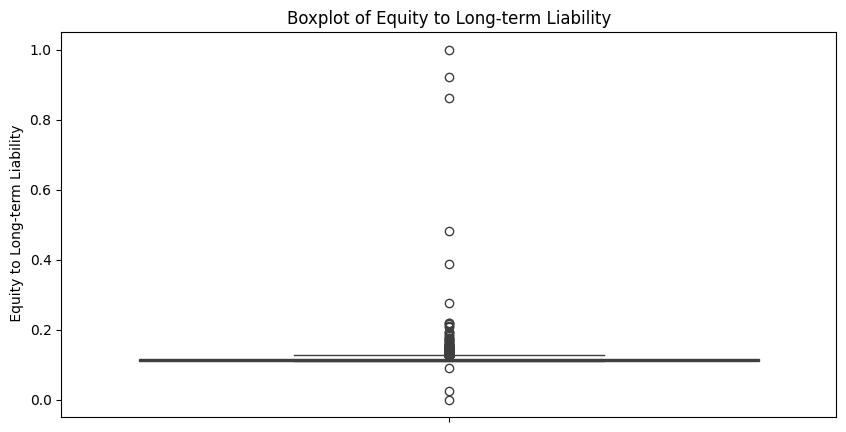

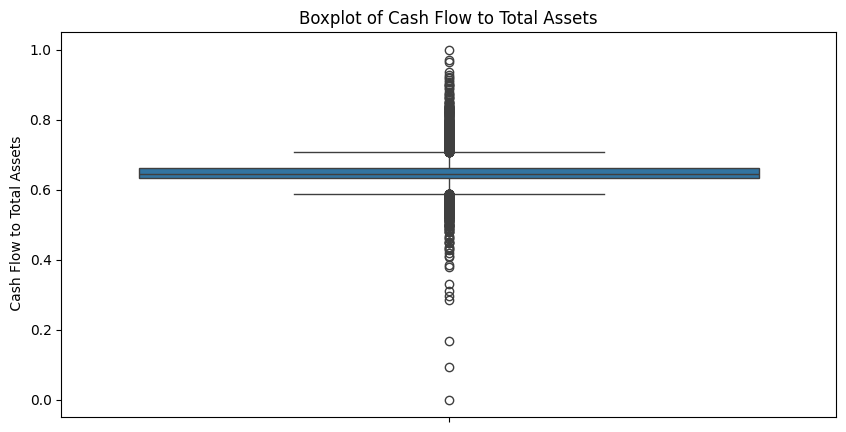

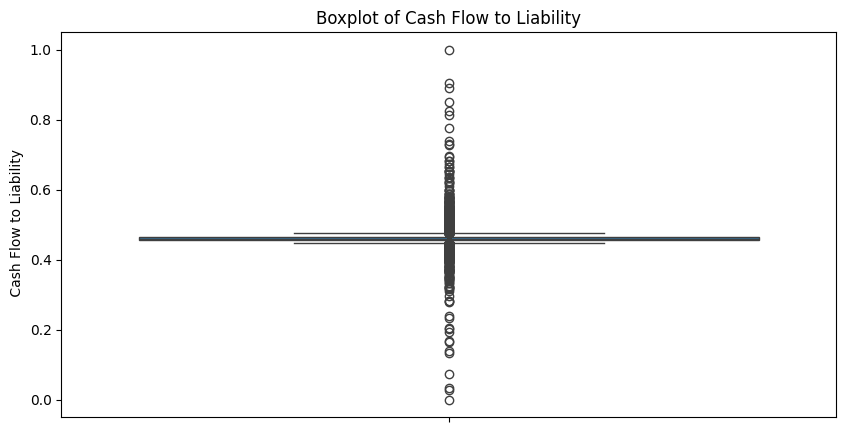

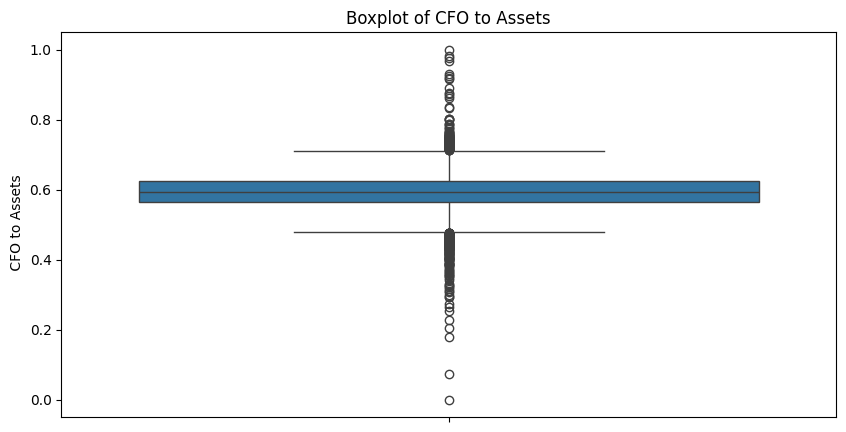

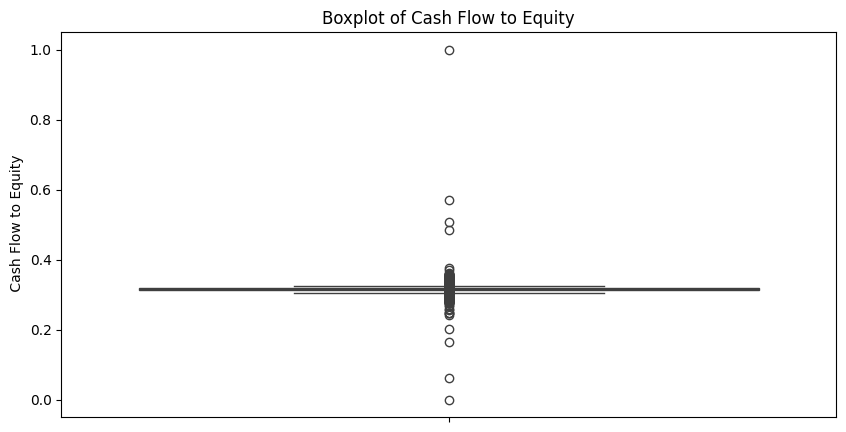

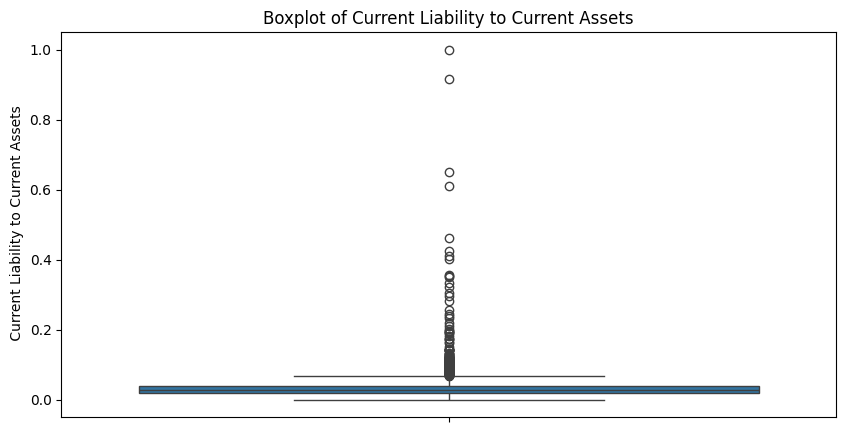

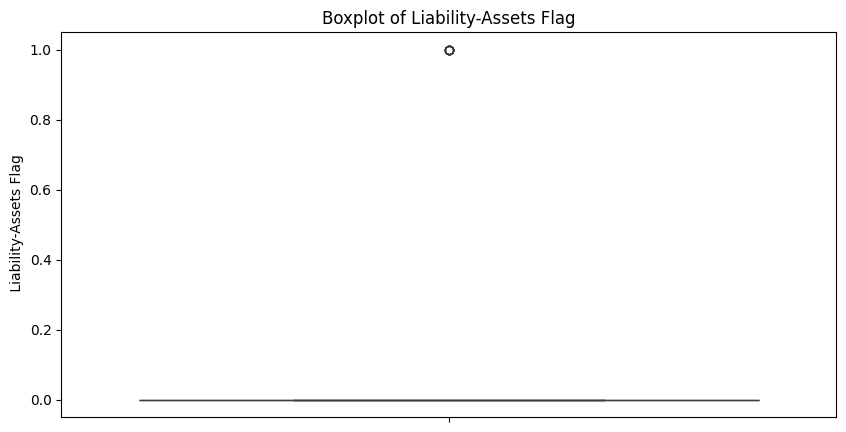

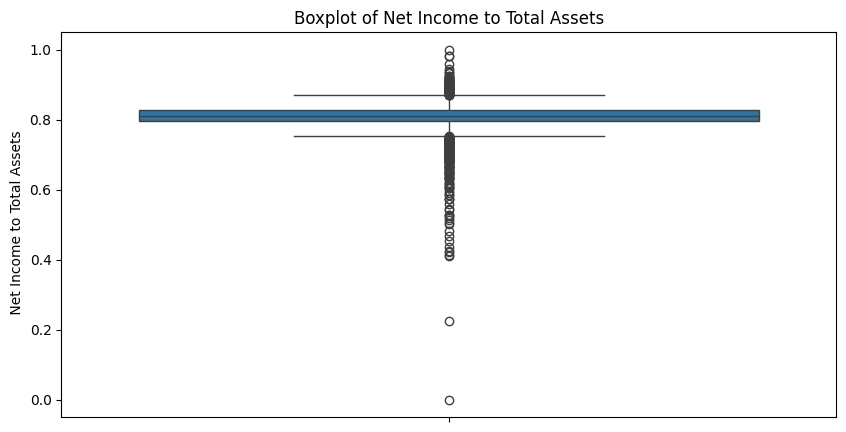

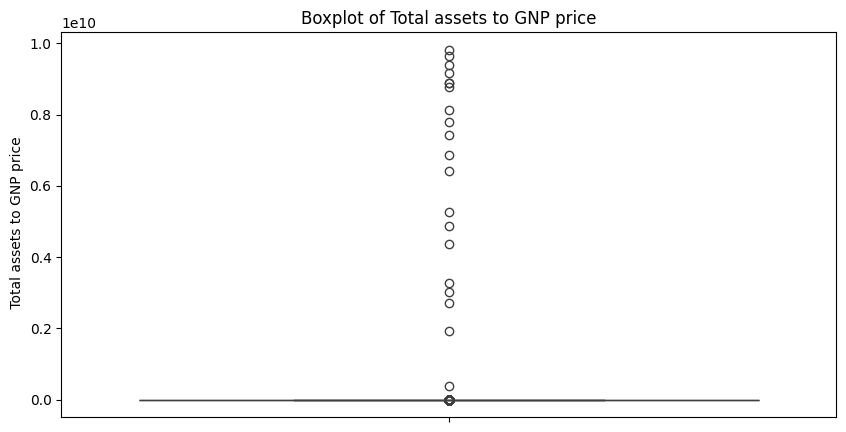

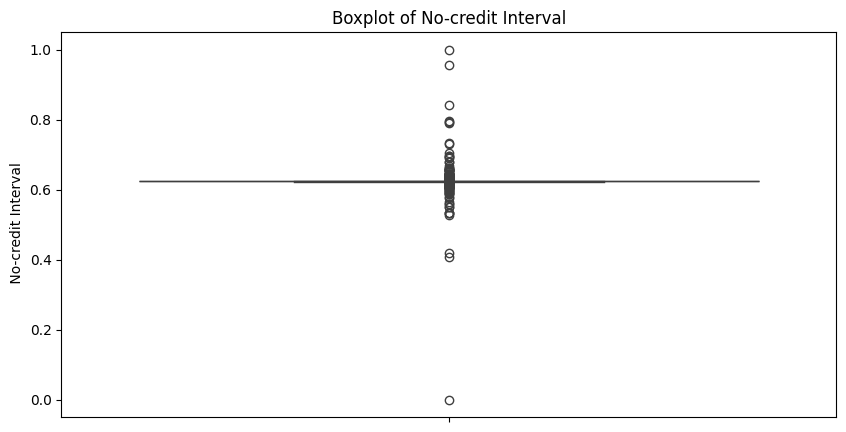

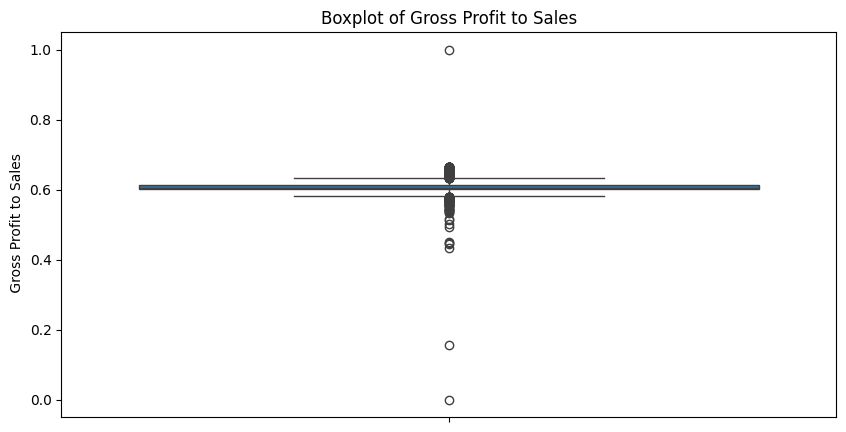

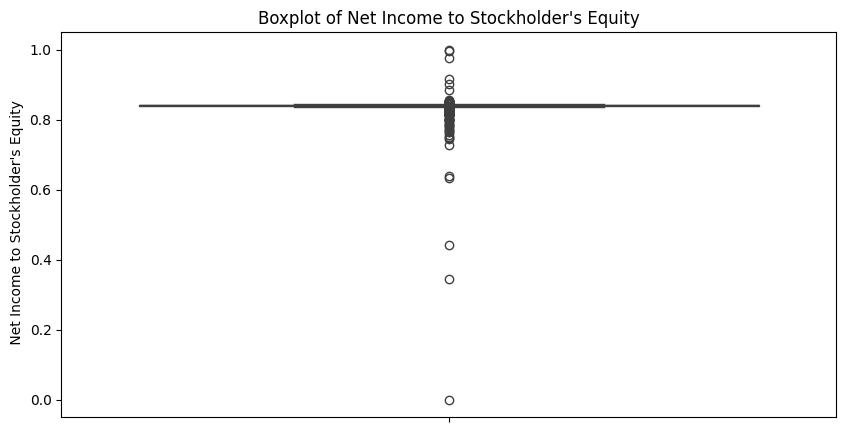

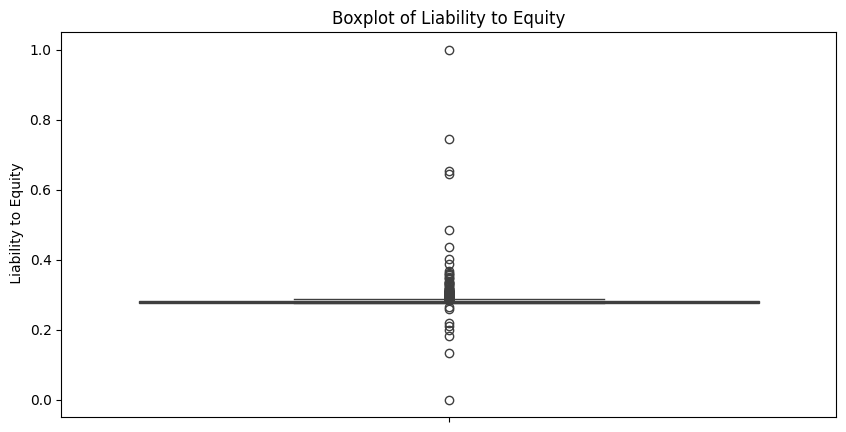

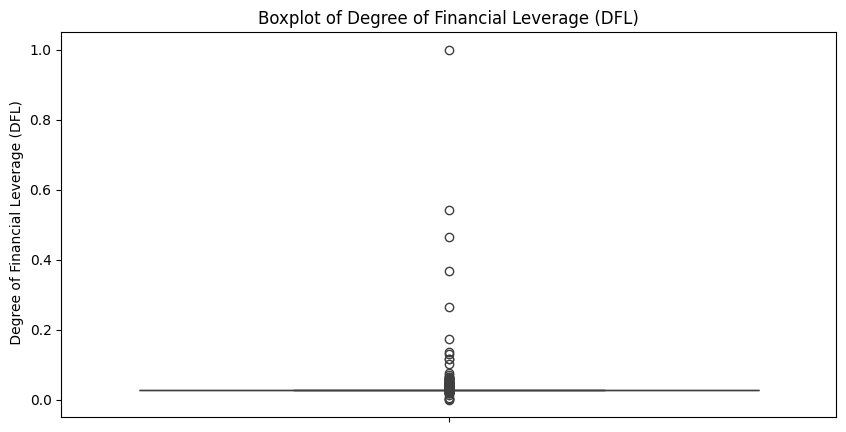

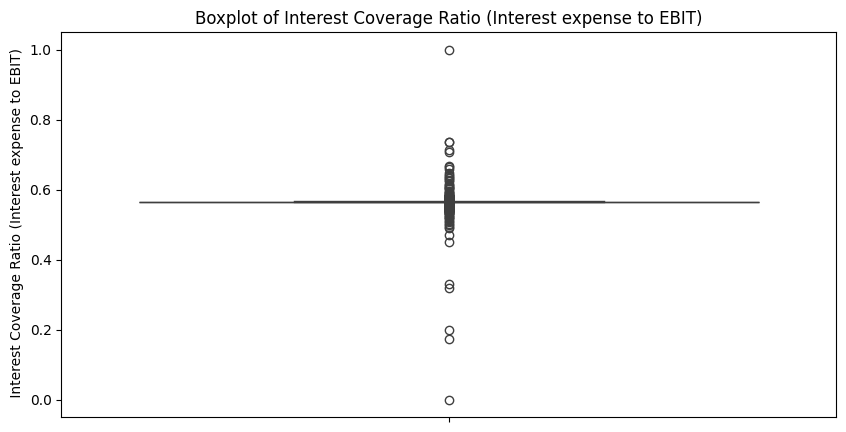

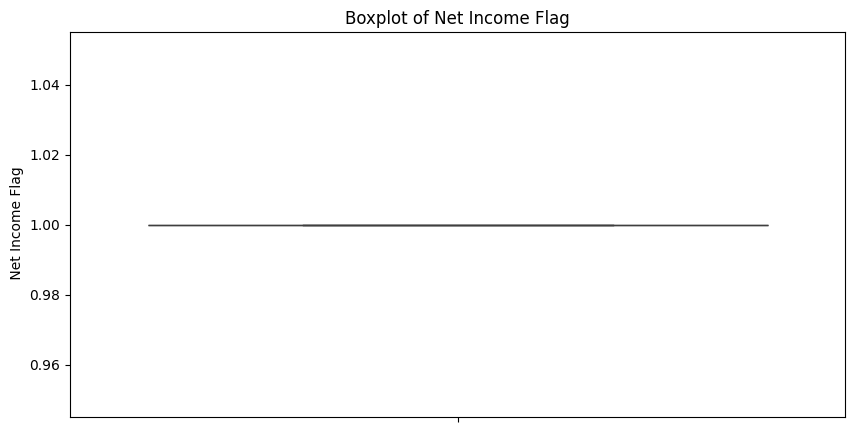

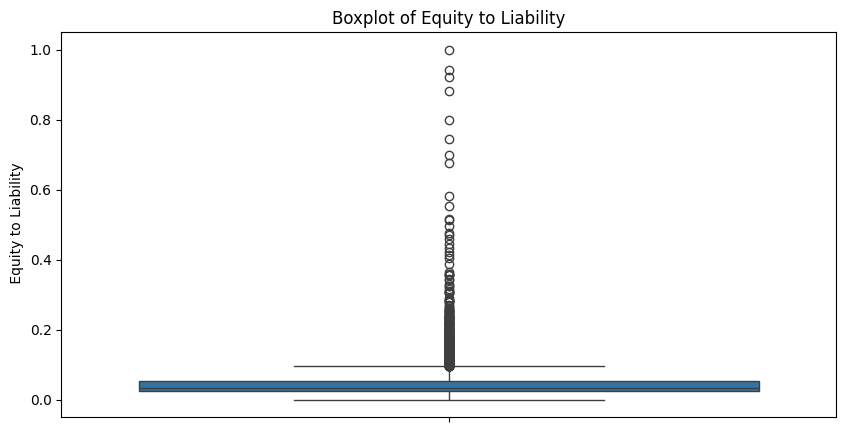

''

In [48]:
# box plot

for i in list(df.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('Boxplot of'+i)
  ax=sns.boxplot((df[i]) )
  plt.show()
;

**From the above histograms and boxplot we can easily conclude that most of the histograms are either left tailed or right tailed. And with the help of Boxplot i can say that most of the features contains outliers**

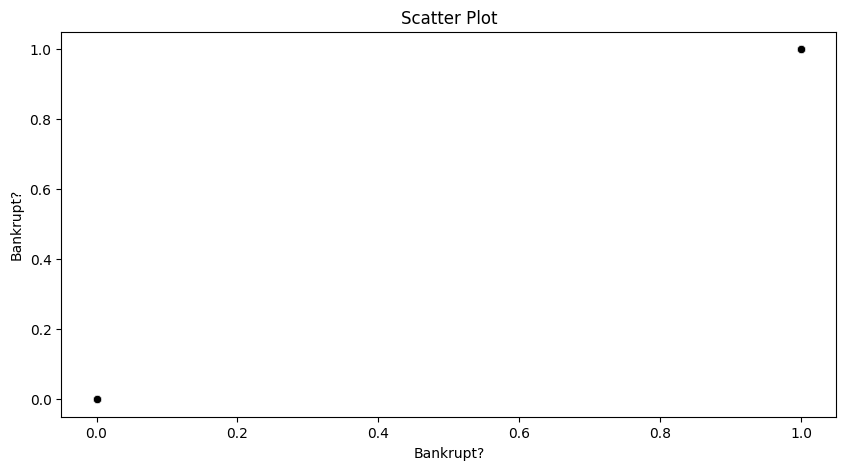

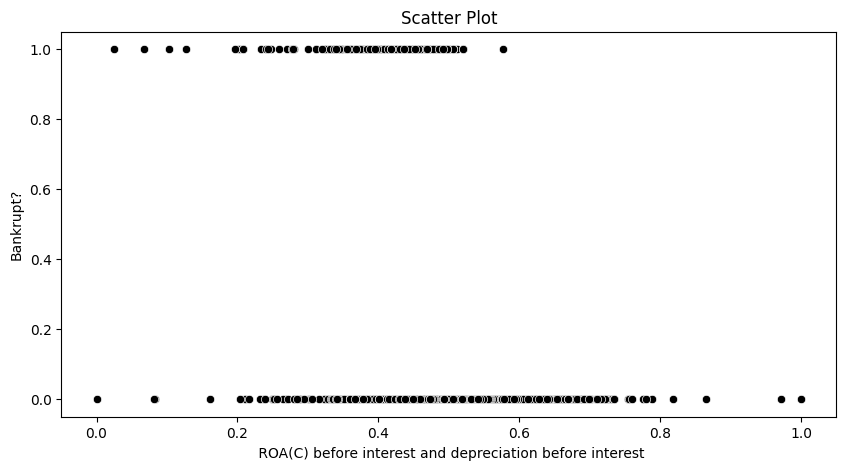

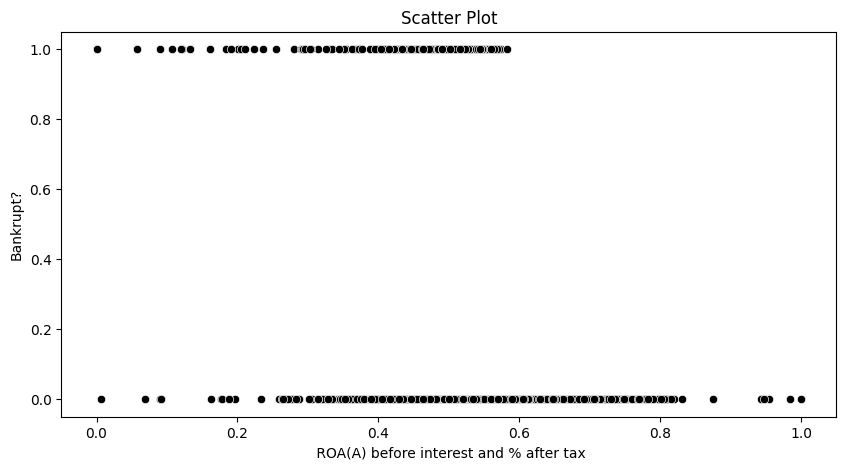

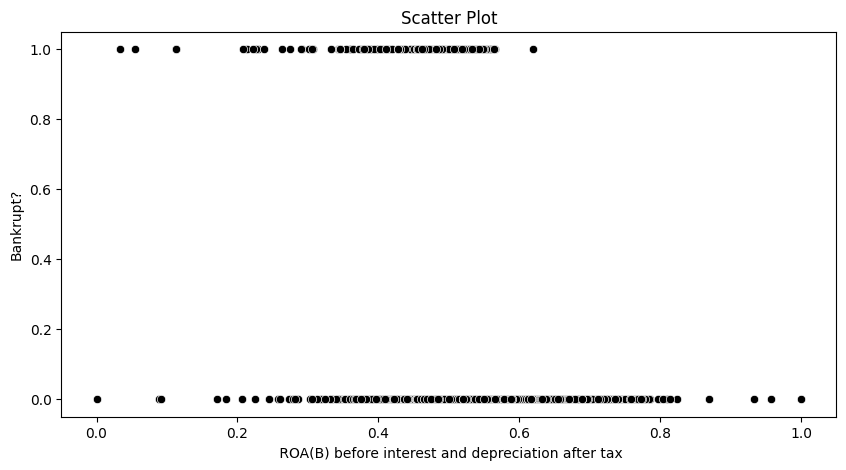

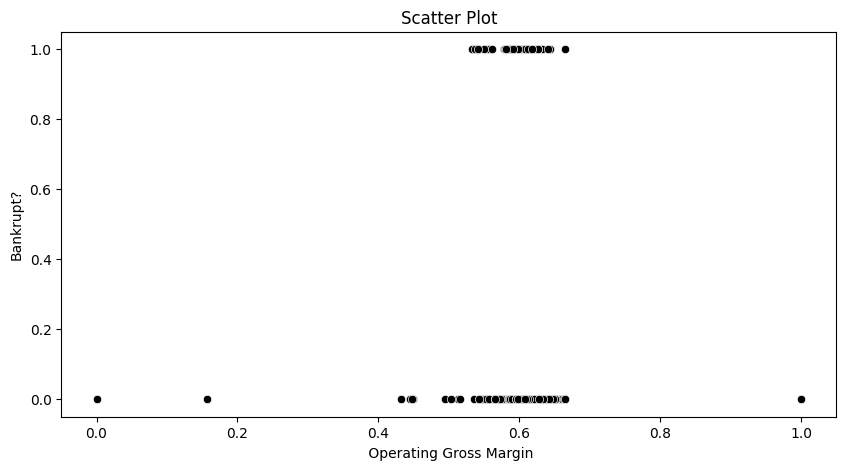

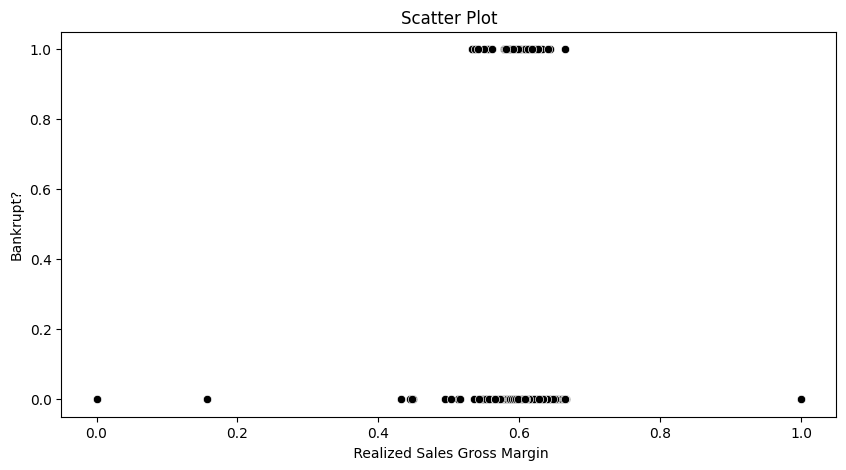

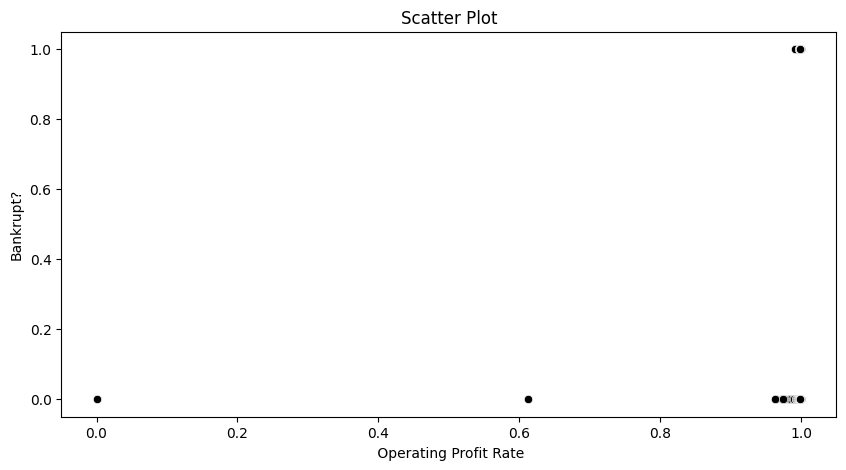

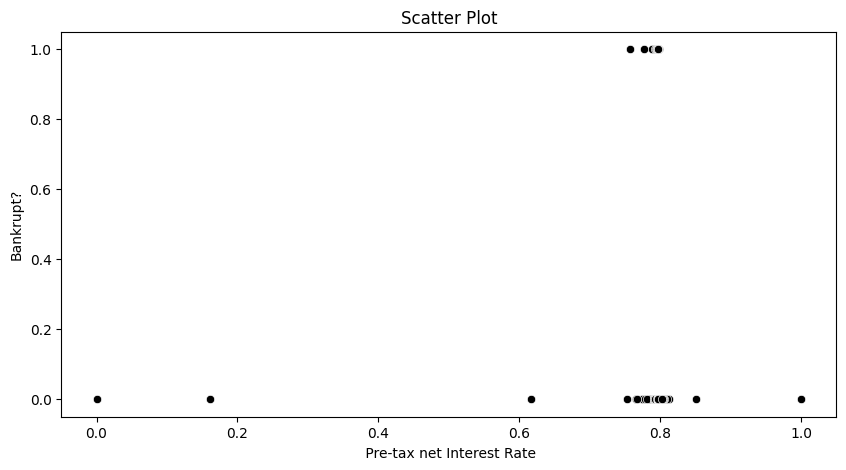

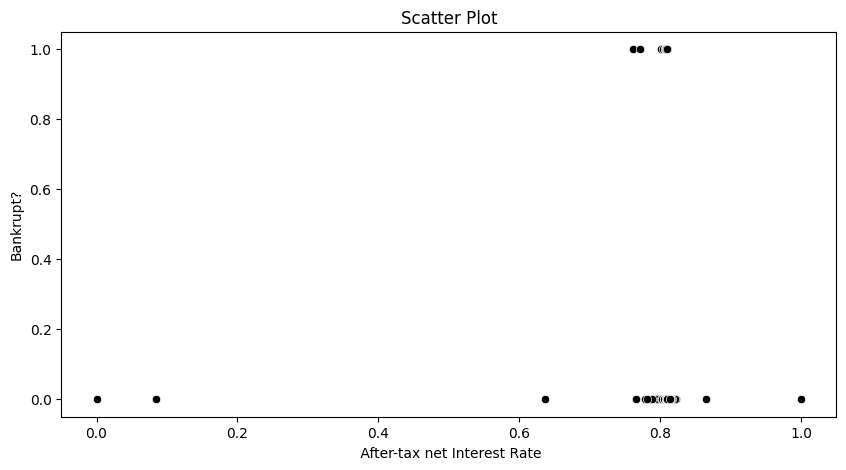

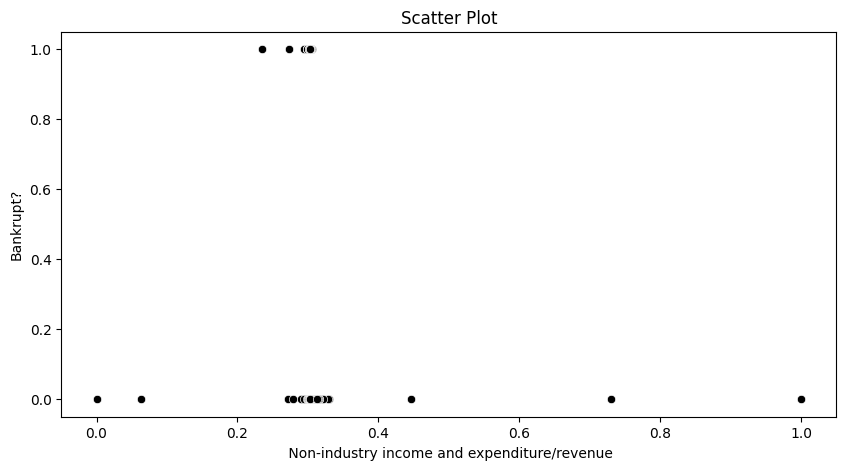

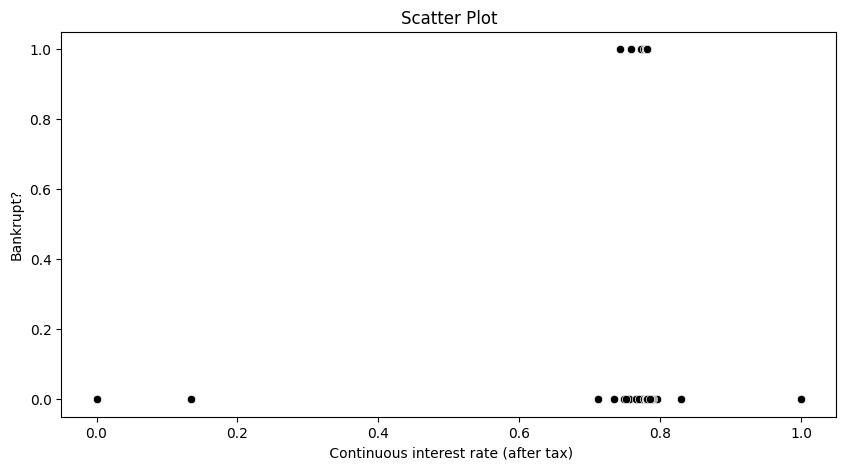

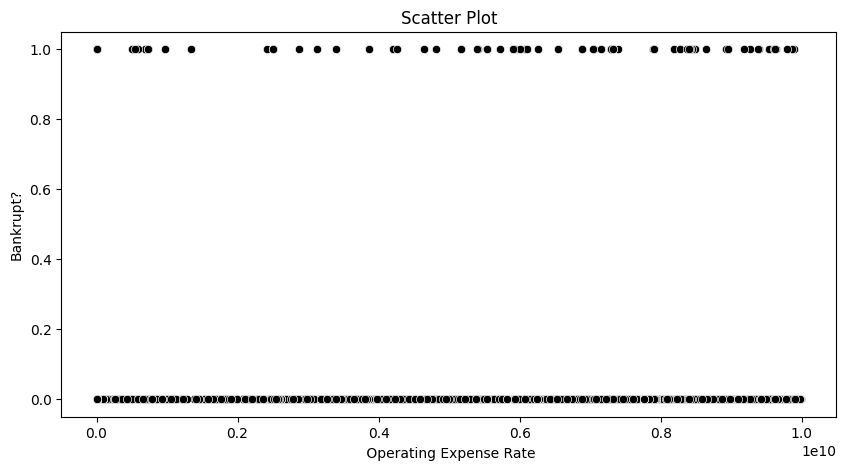

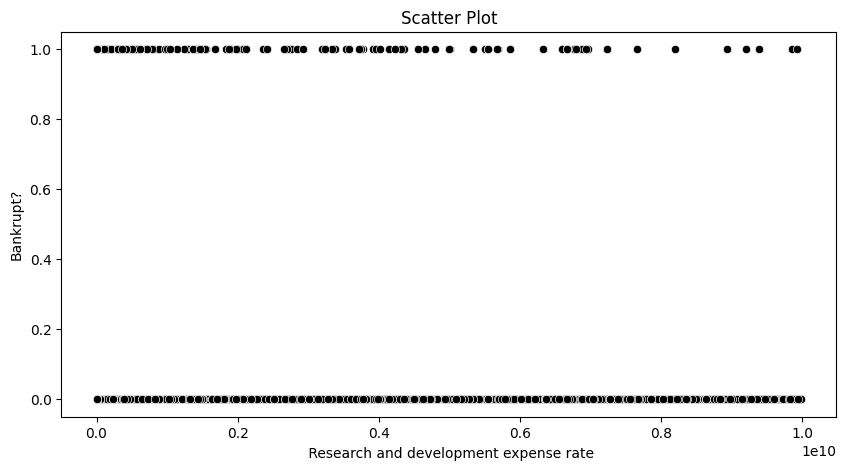

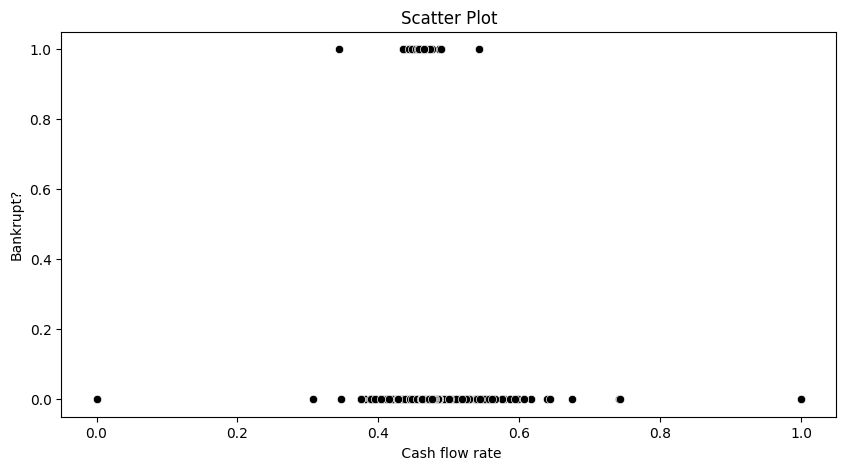

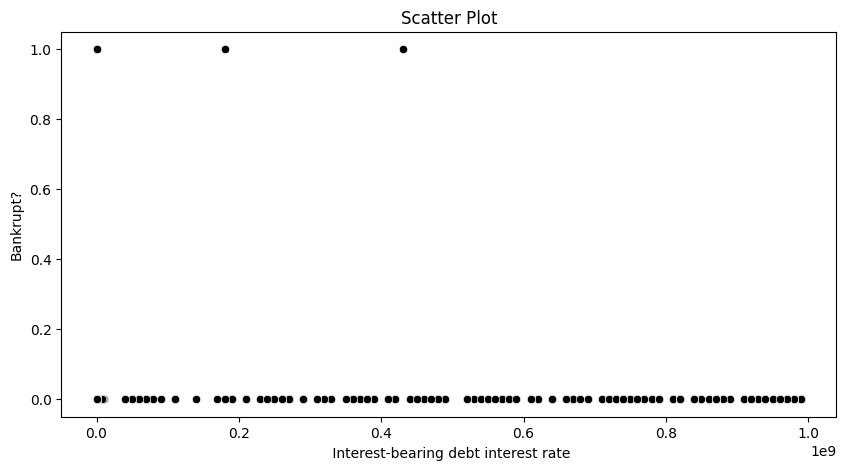

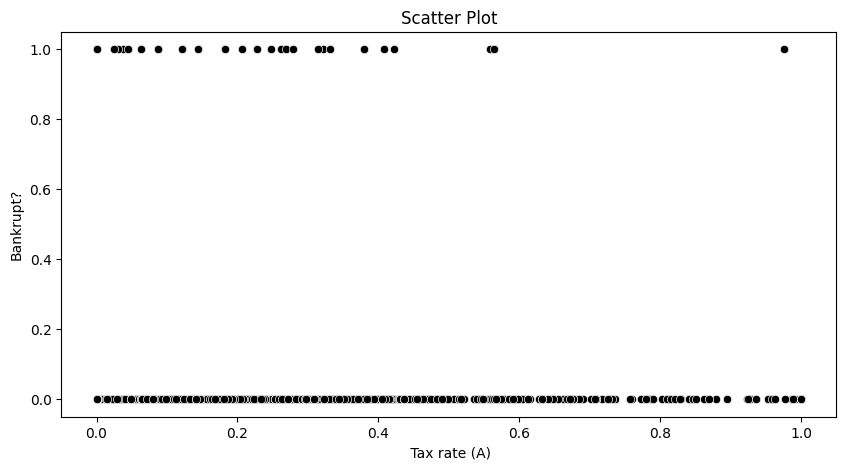

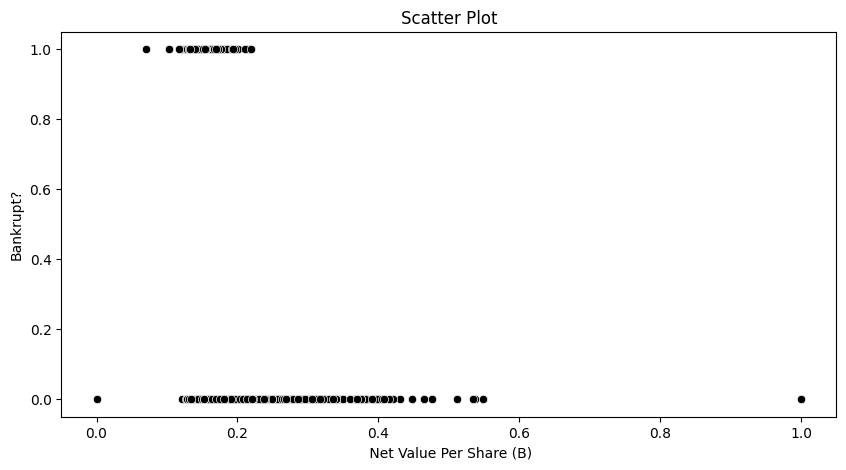

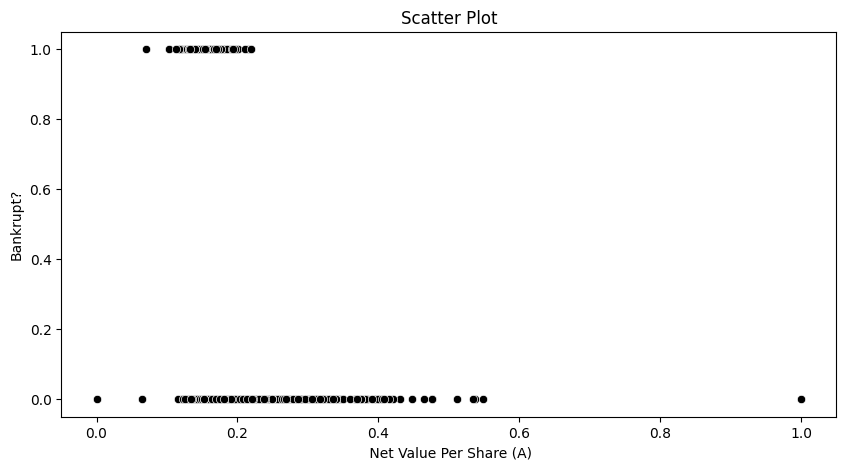

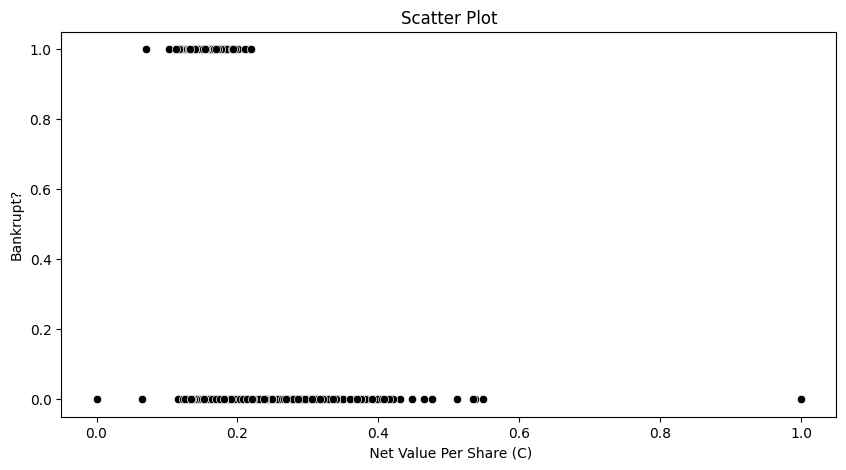

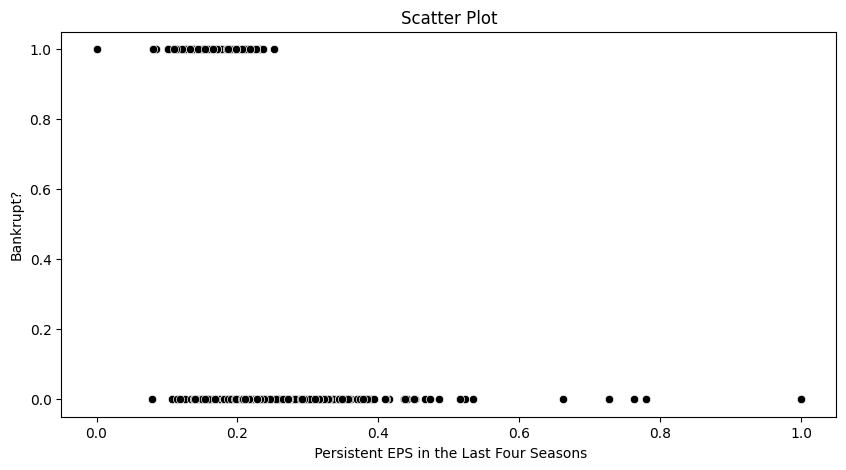

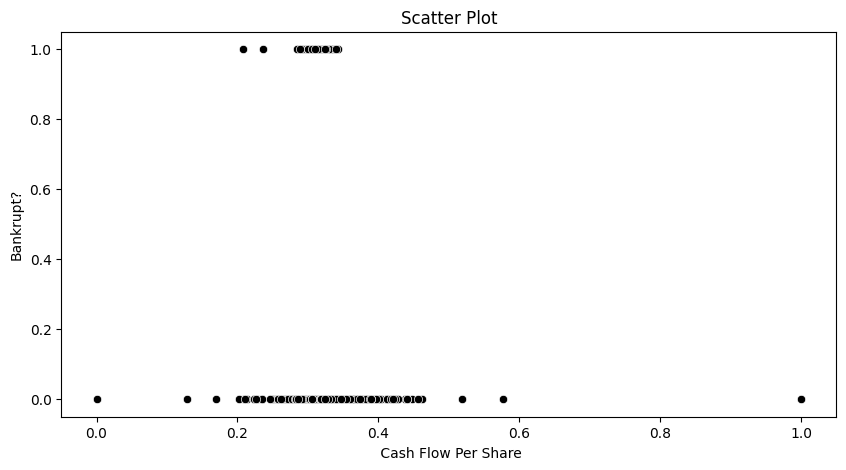

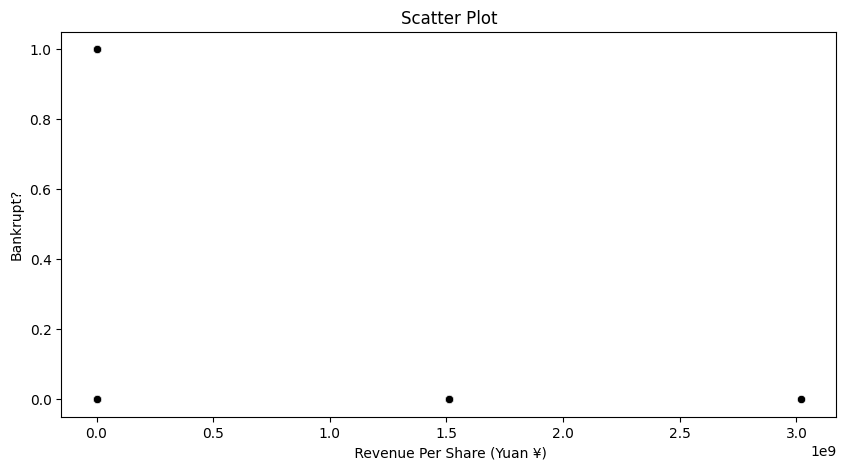

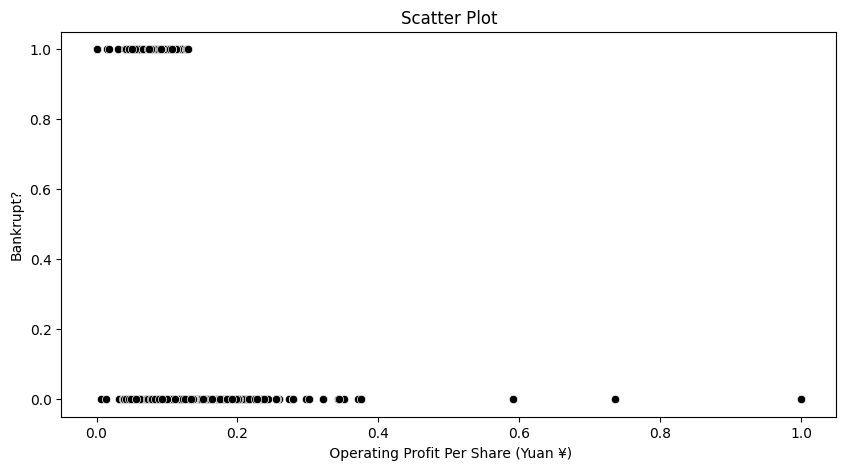

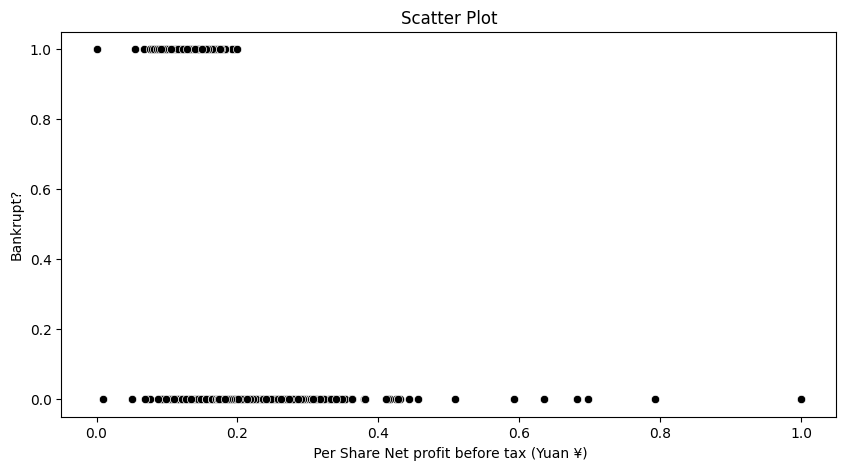

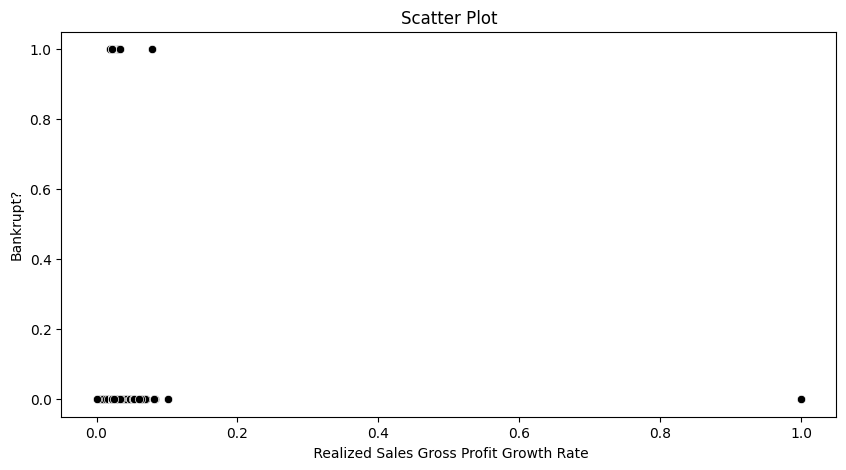

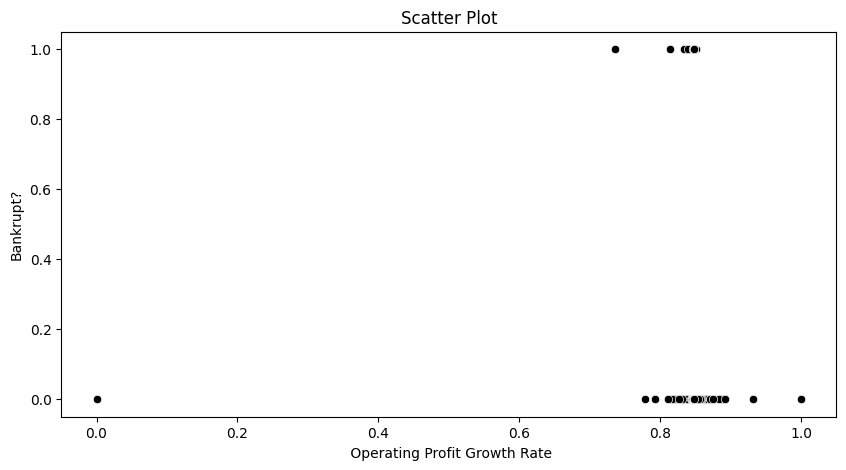

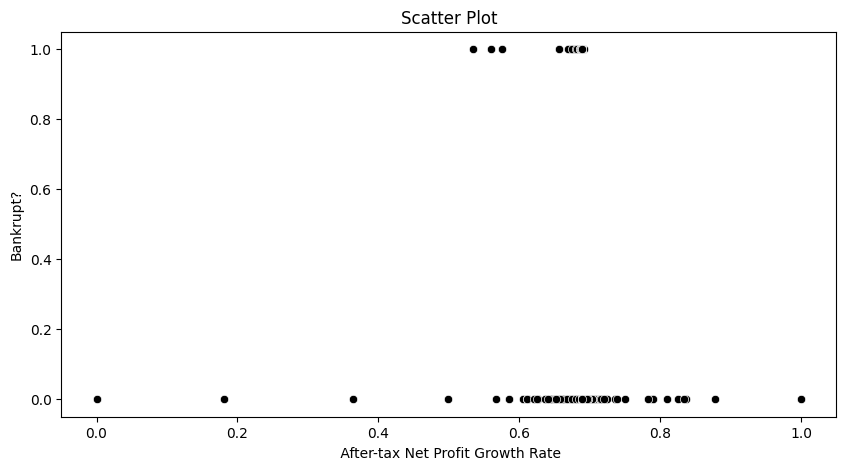

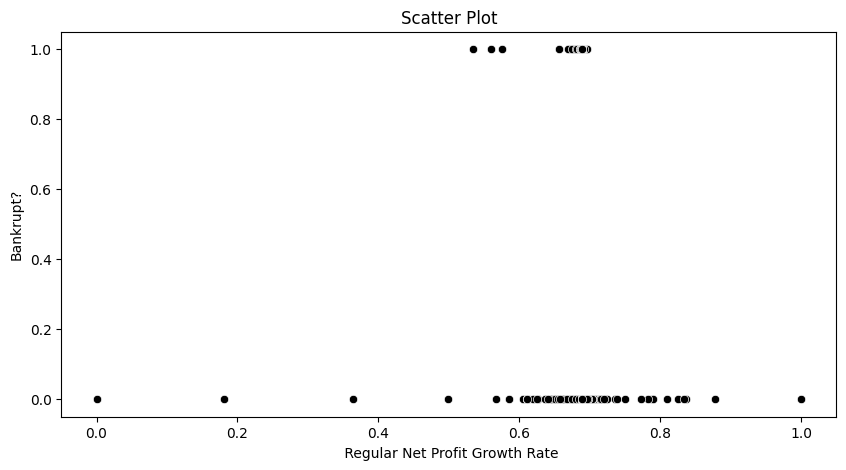

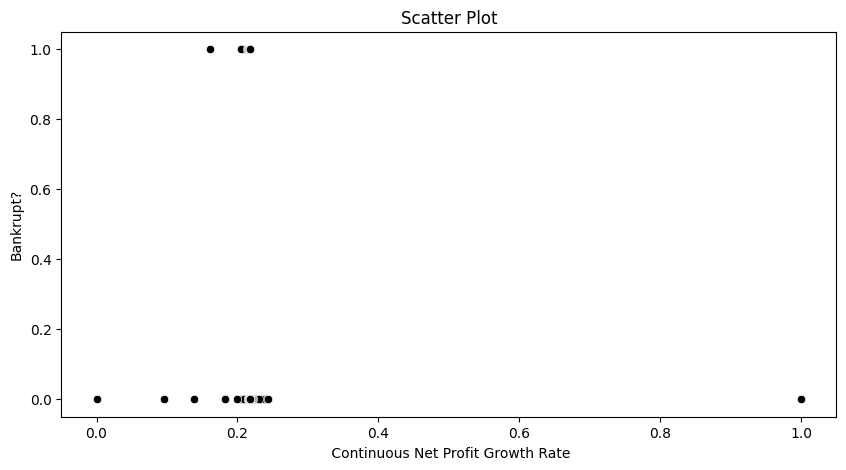

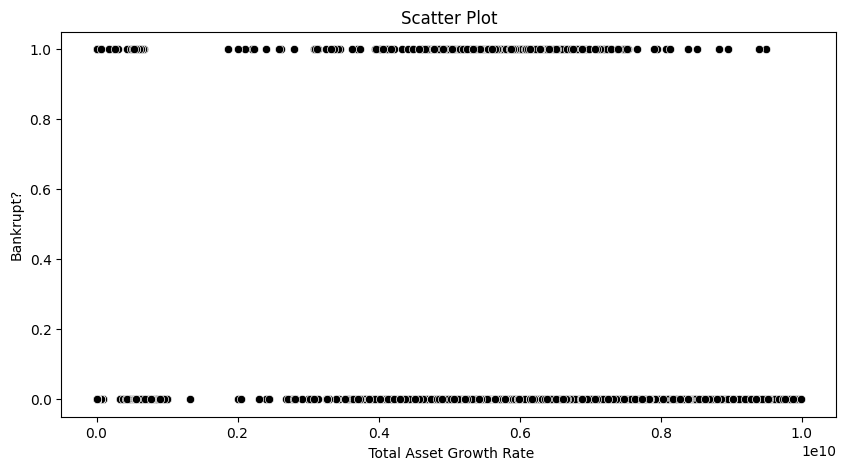

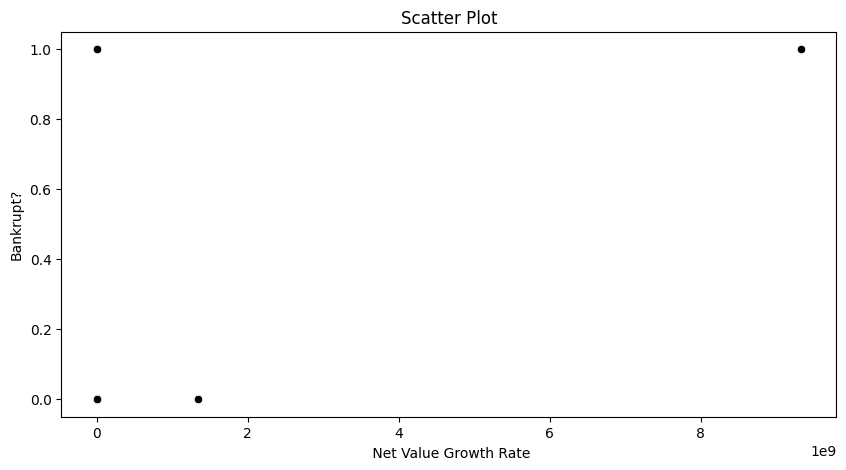

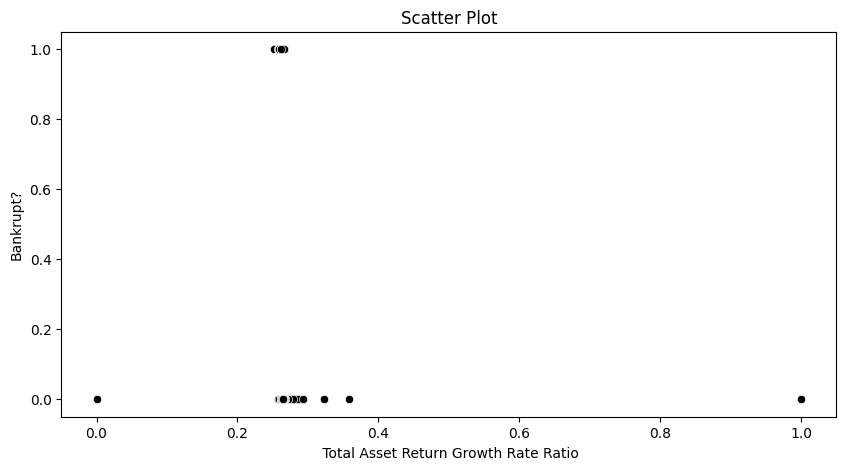

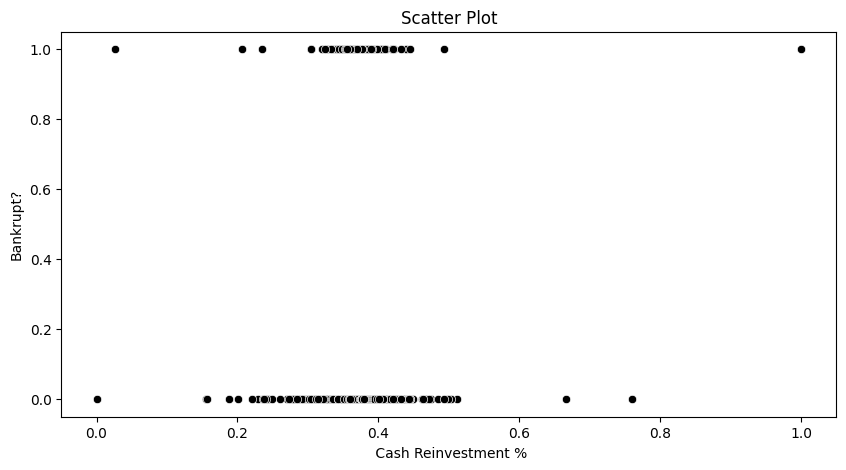

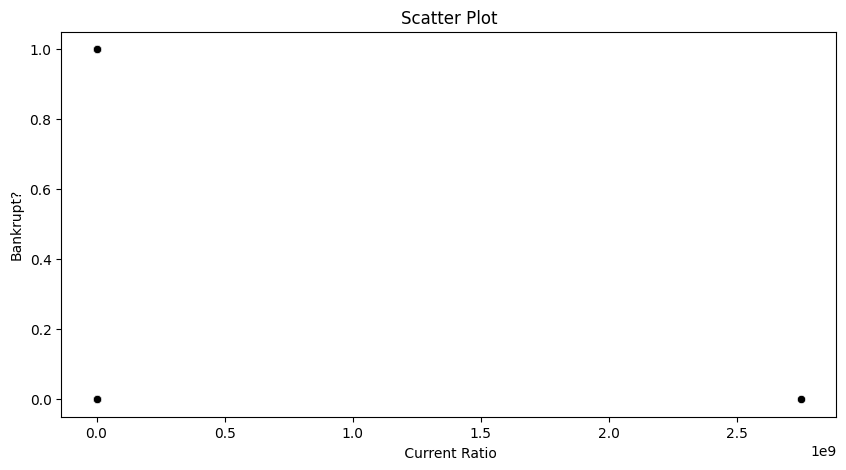

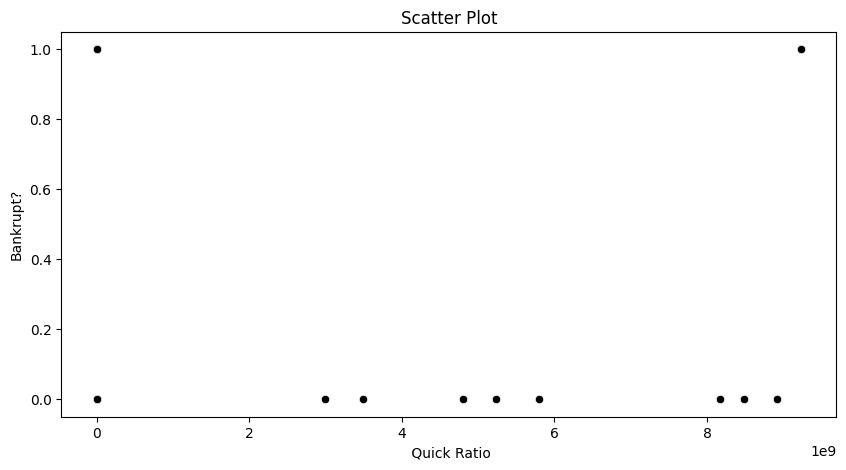

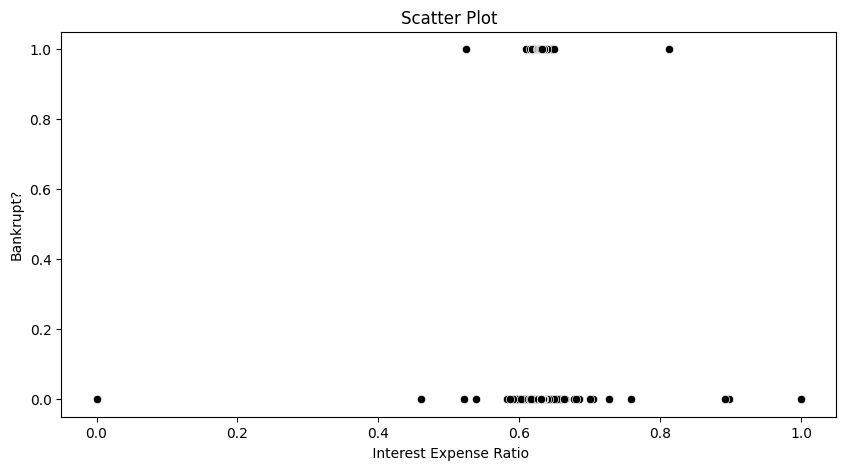

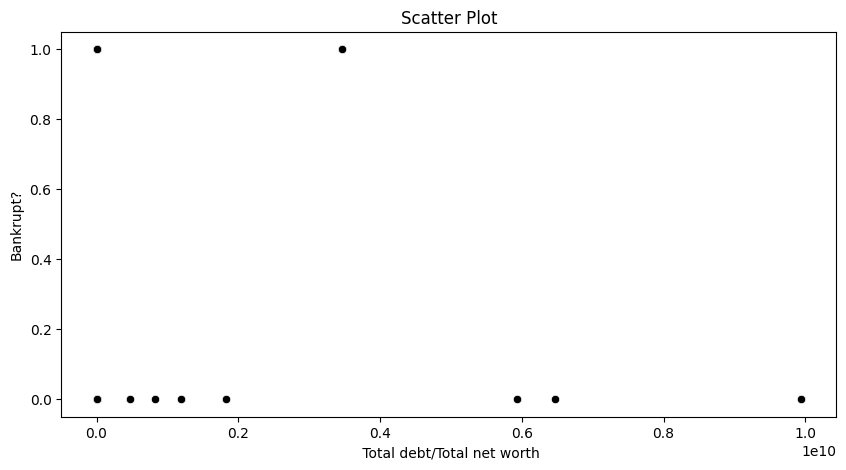

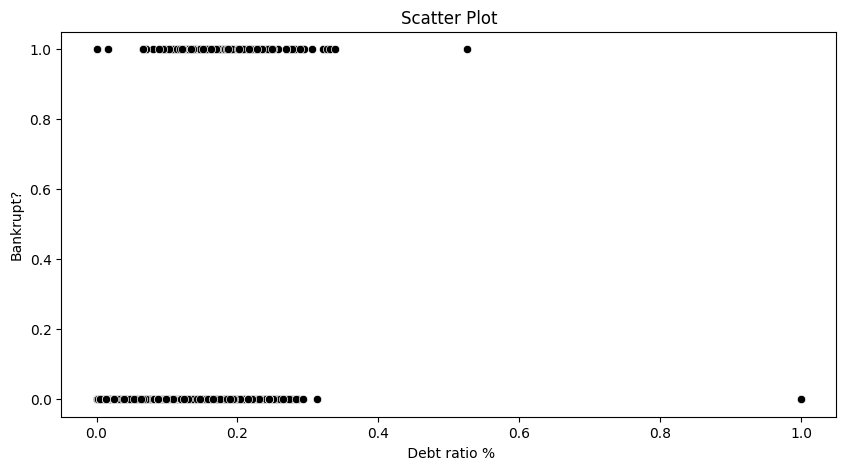

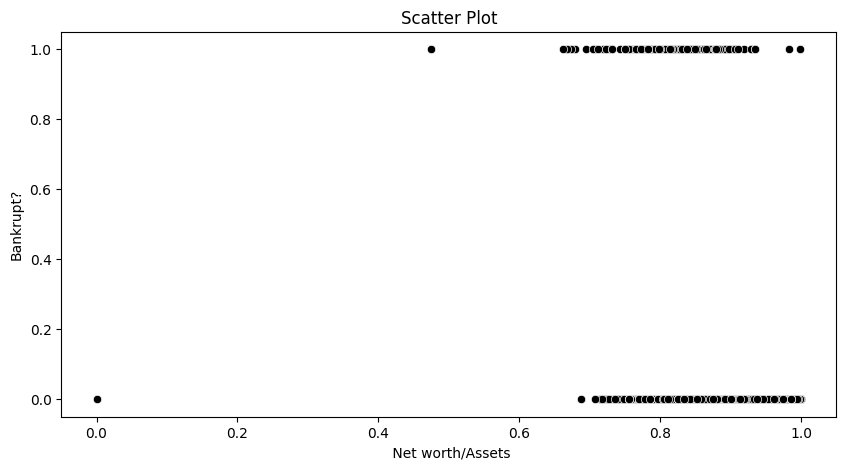

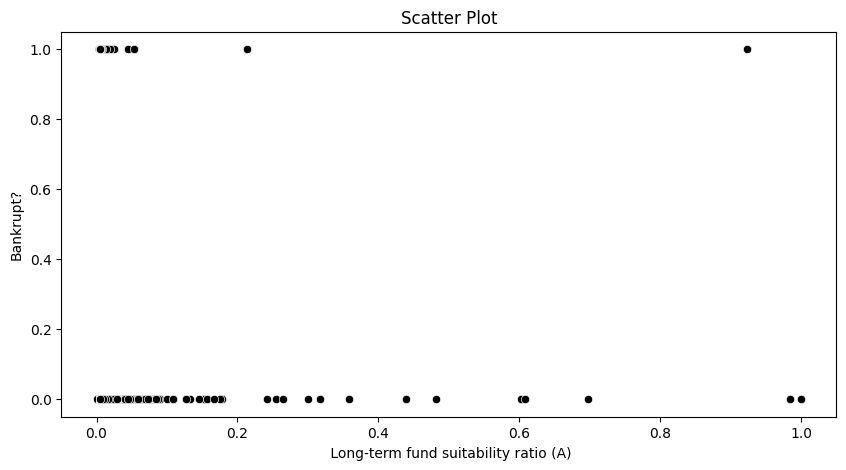

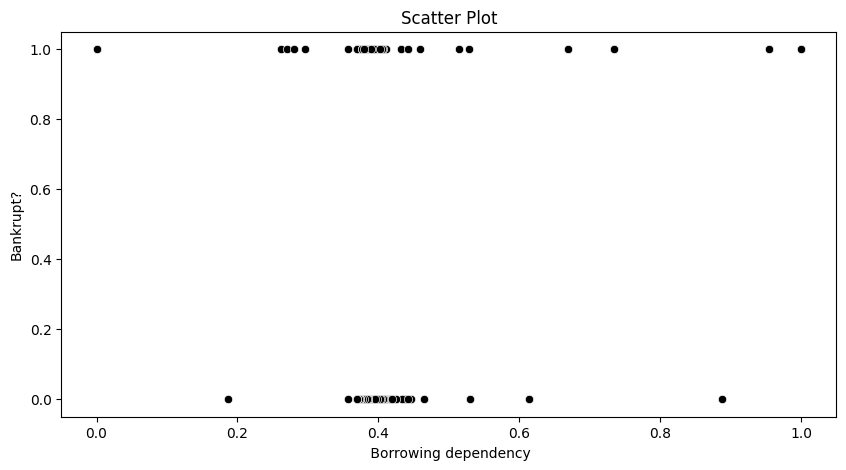

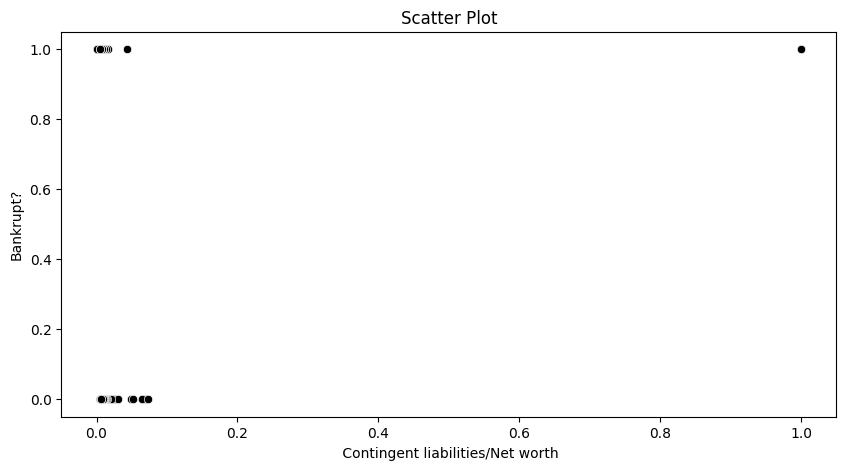

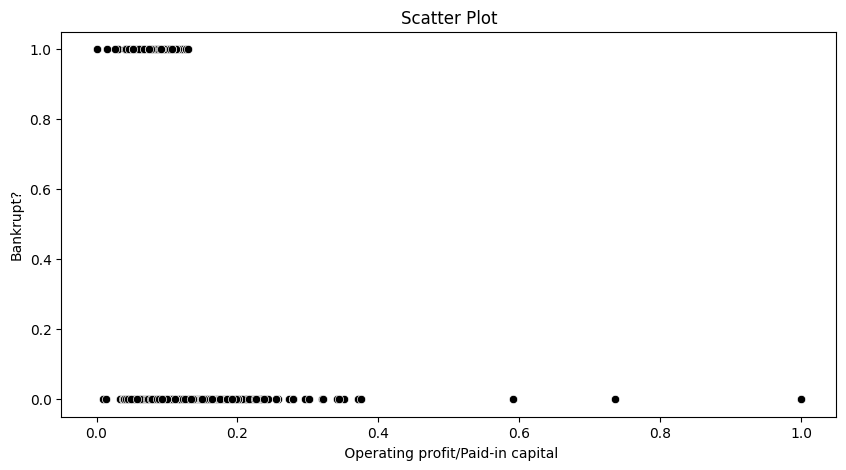

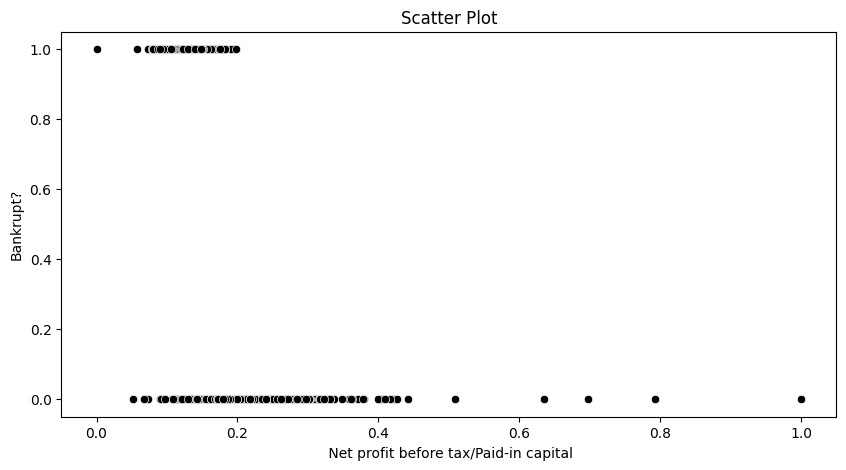

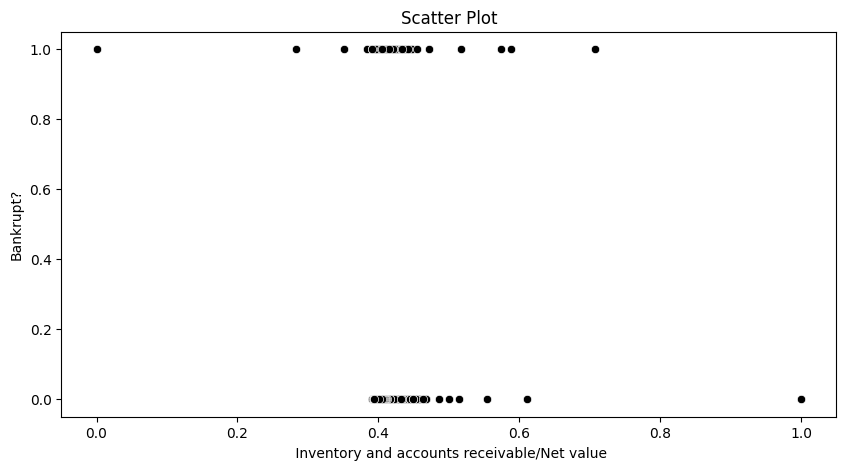

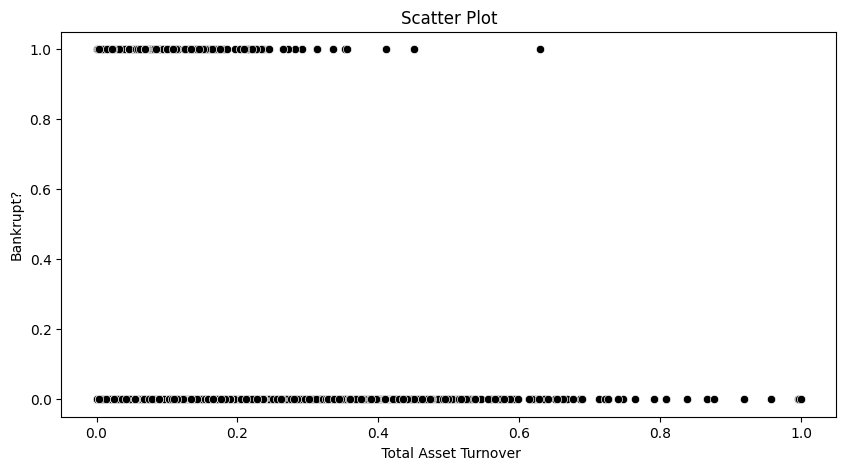

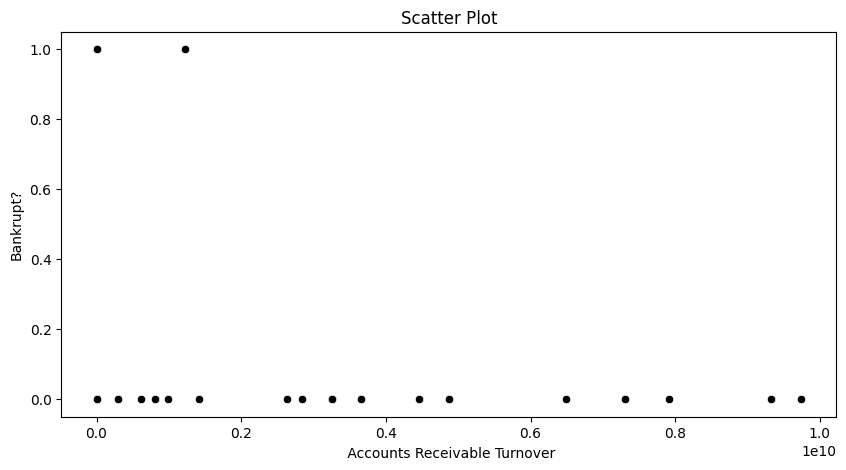

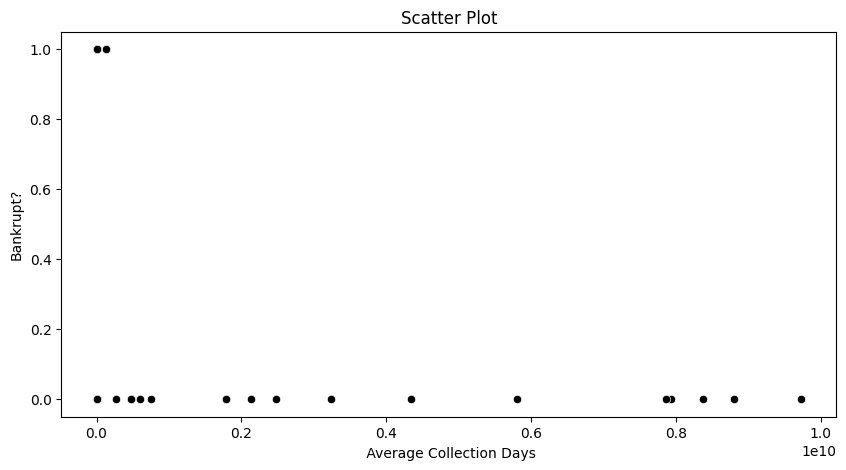

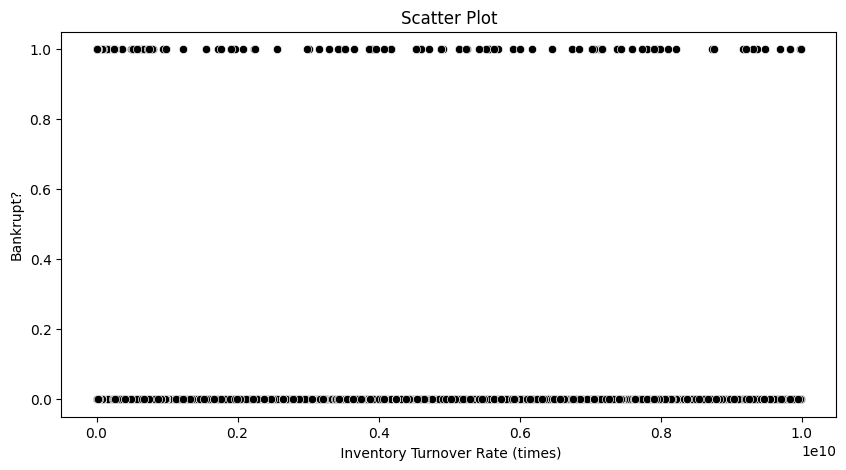

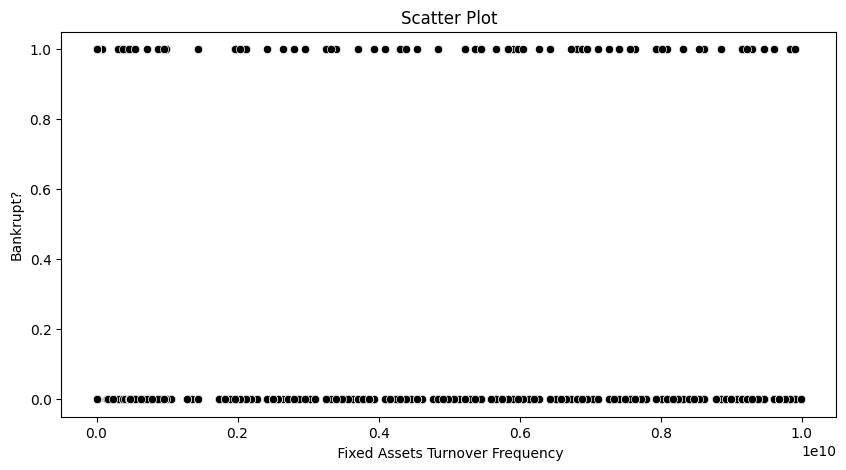

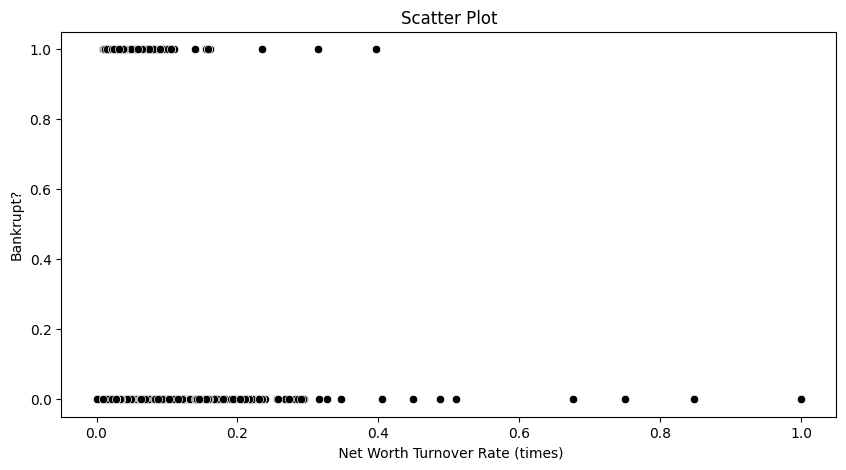

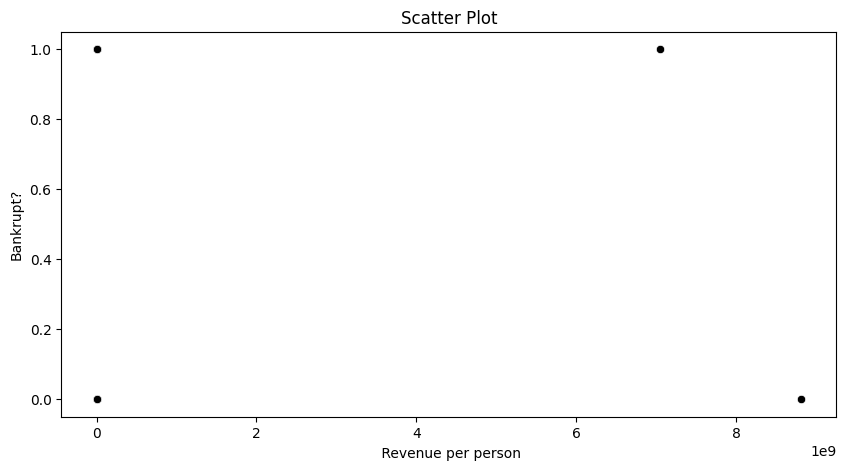

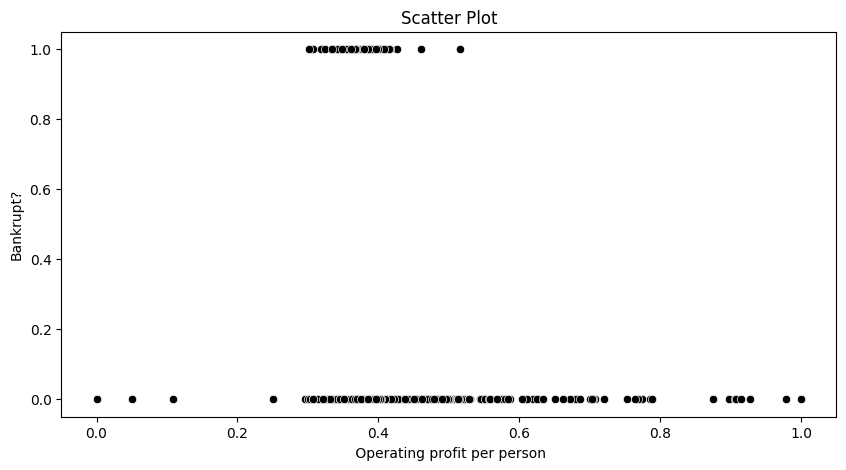

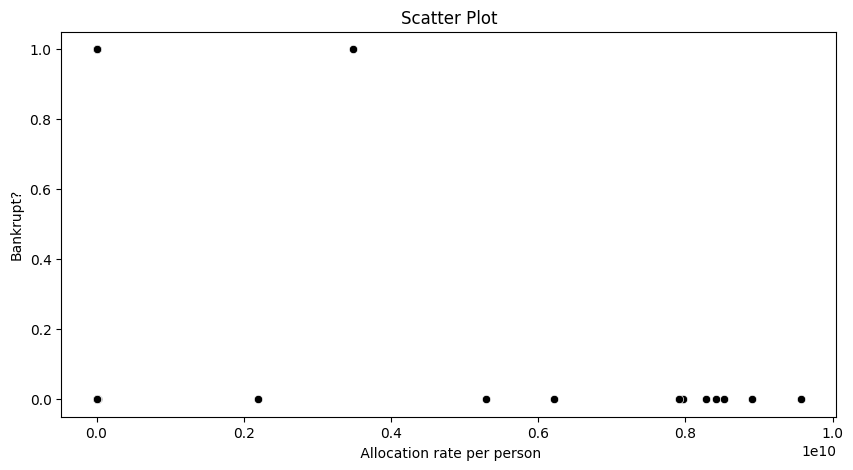

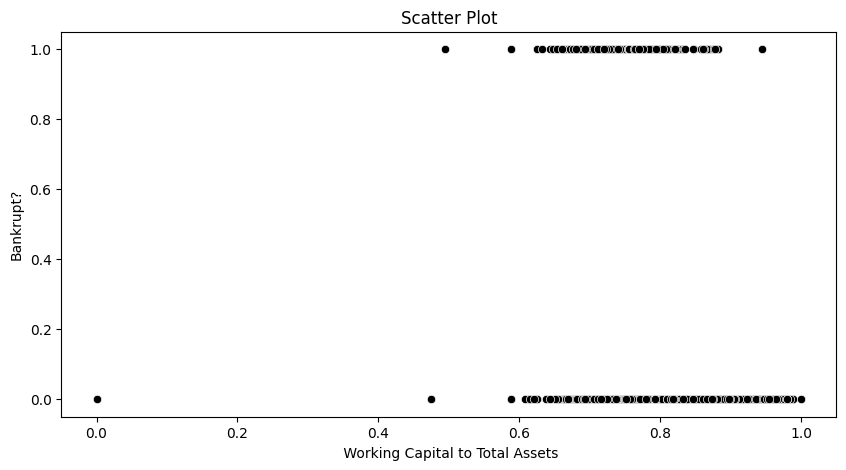

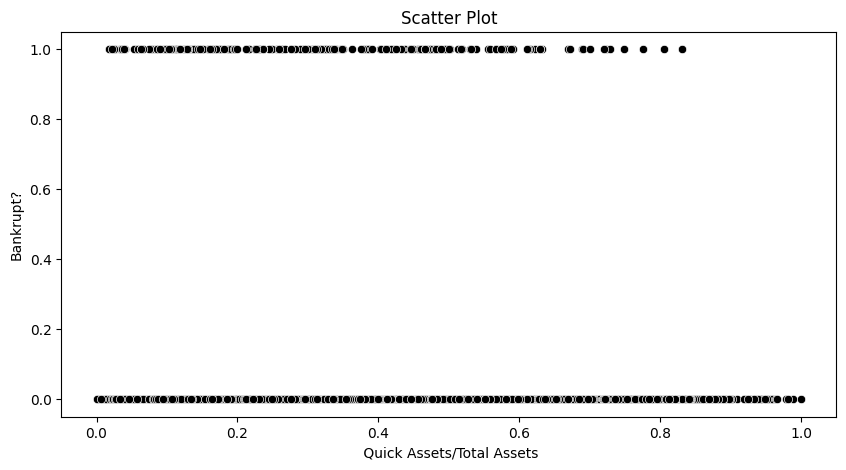

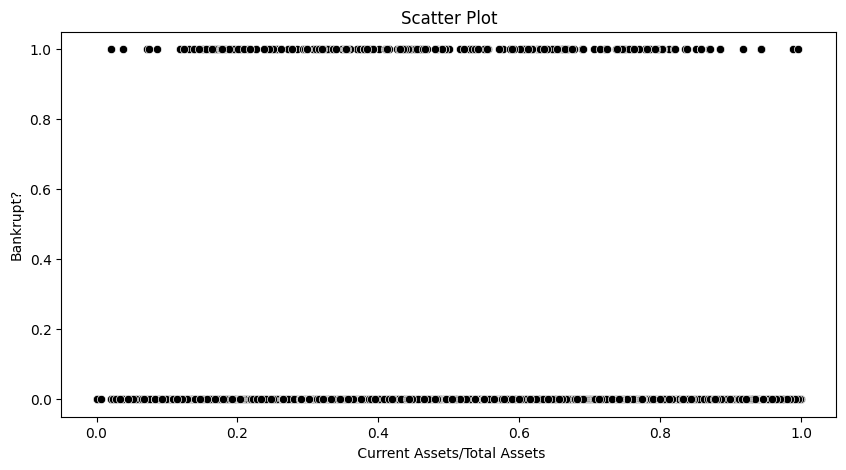

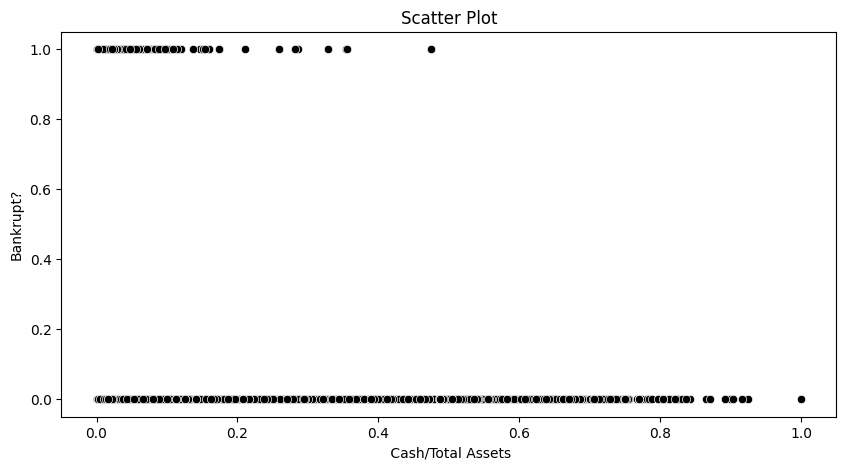

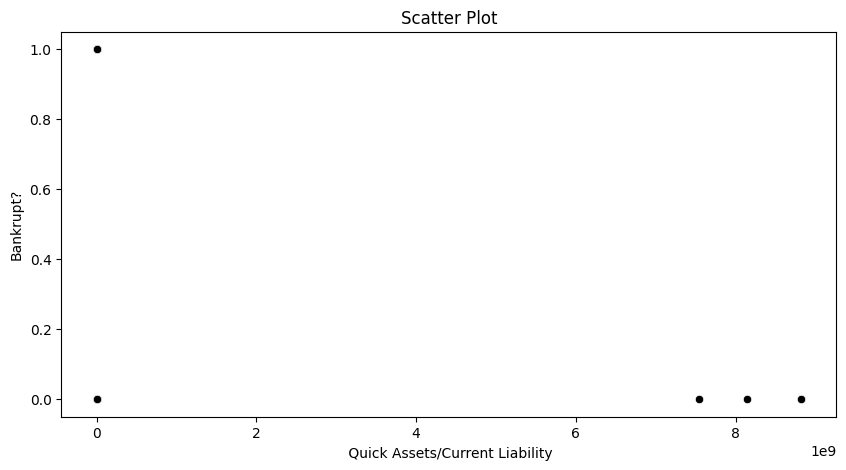

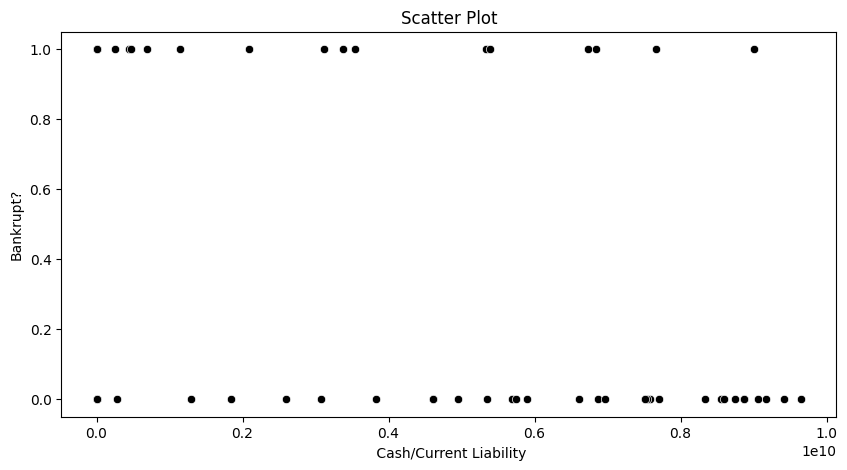

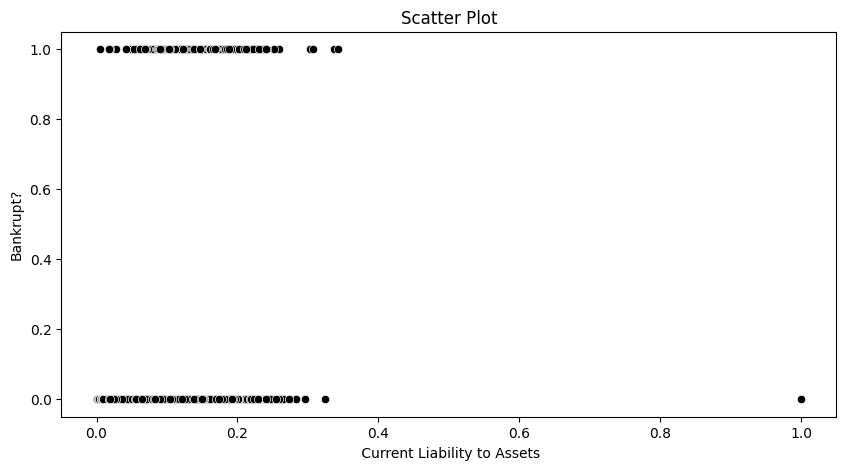

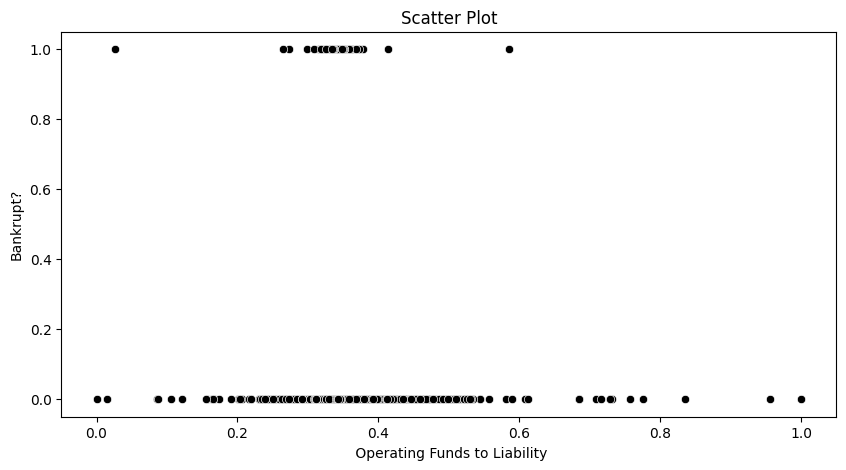

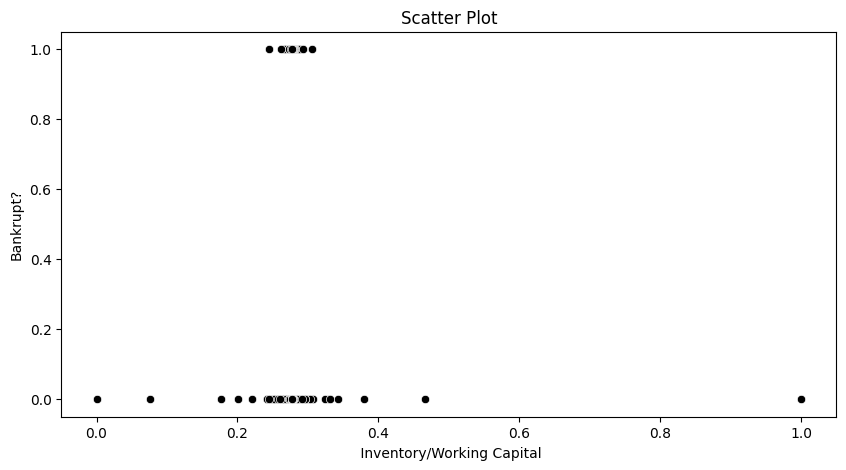

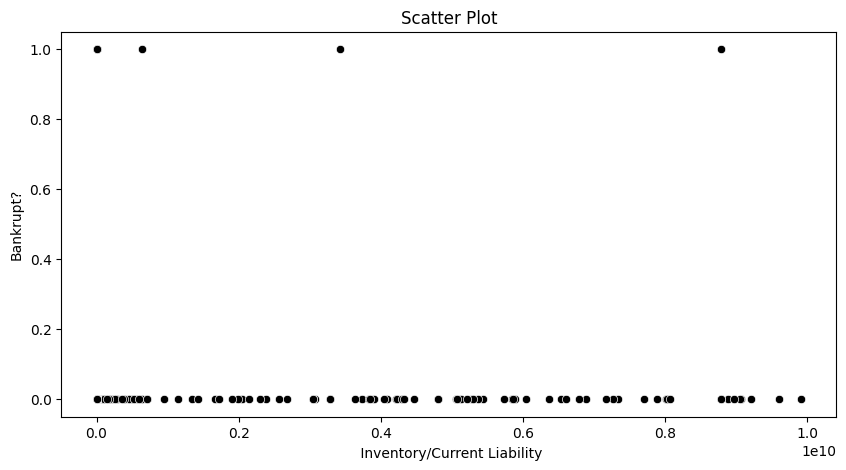

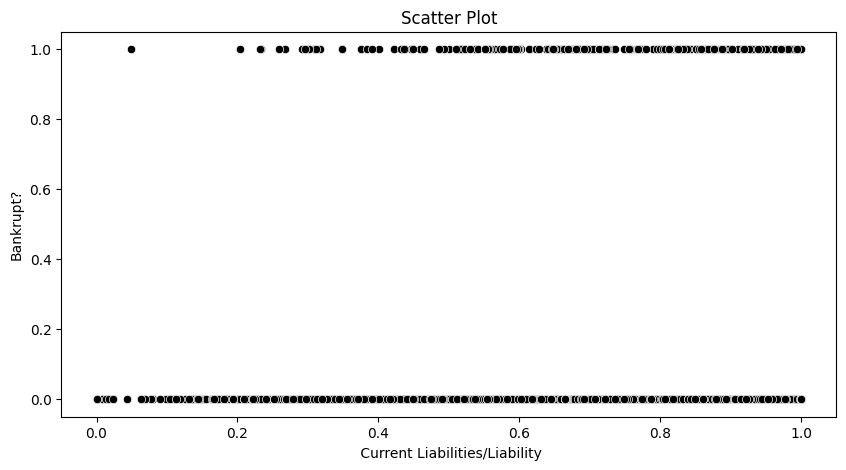

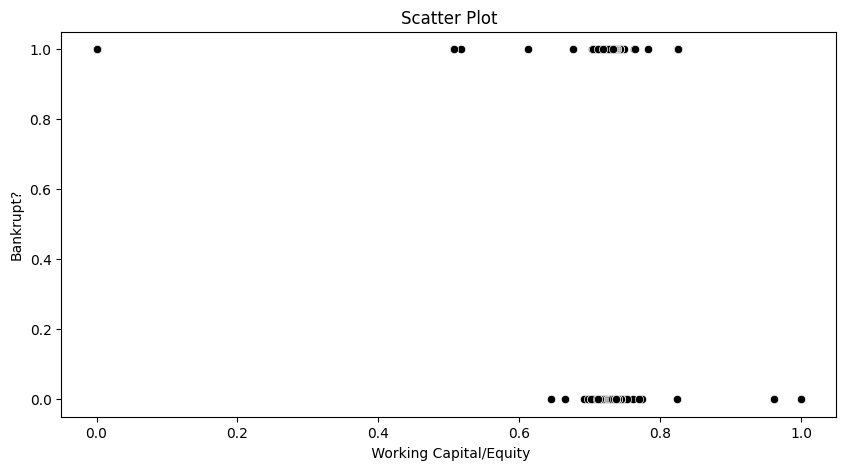

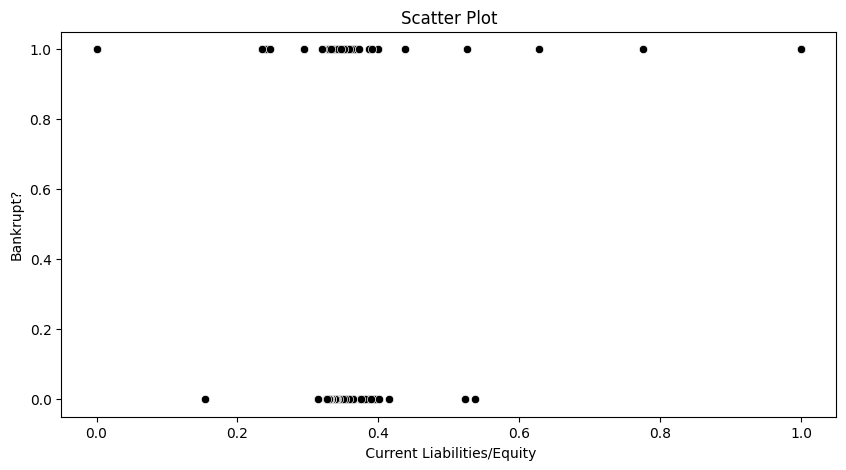

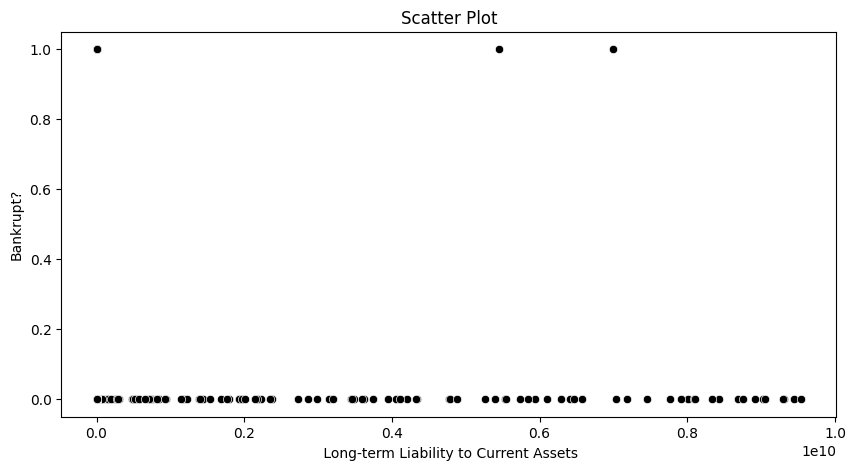

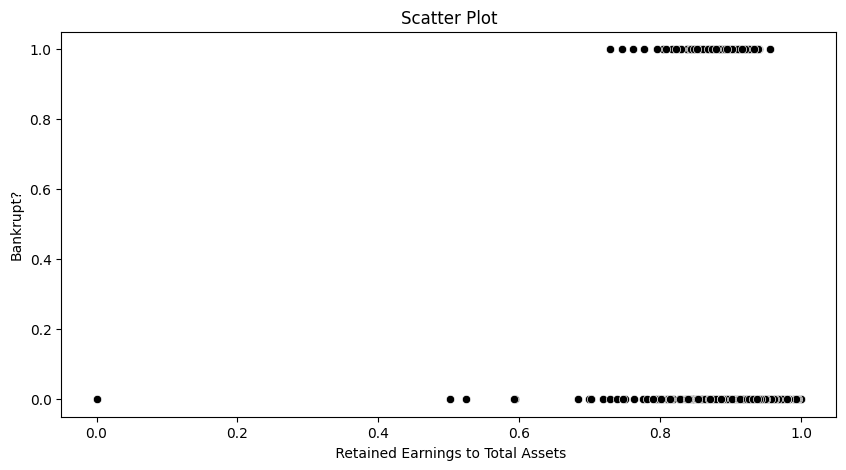

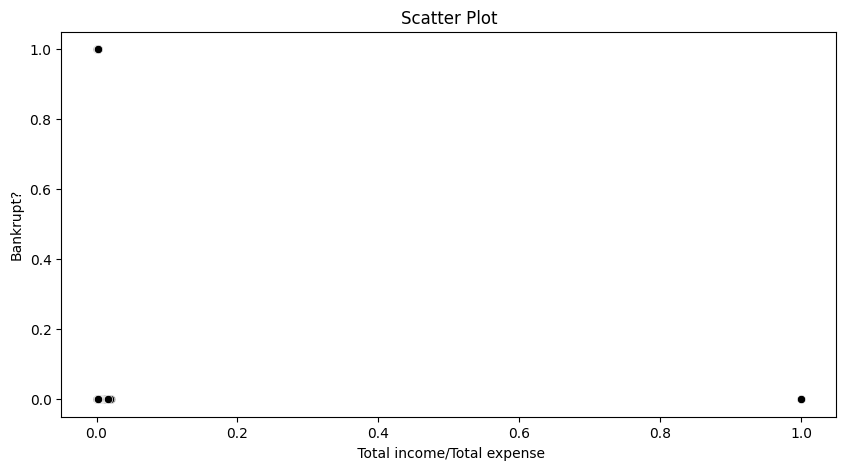

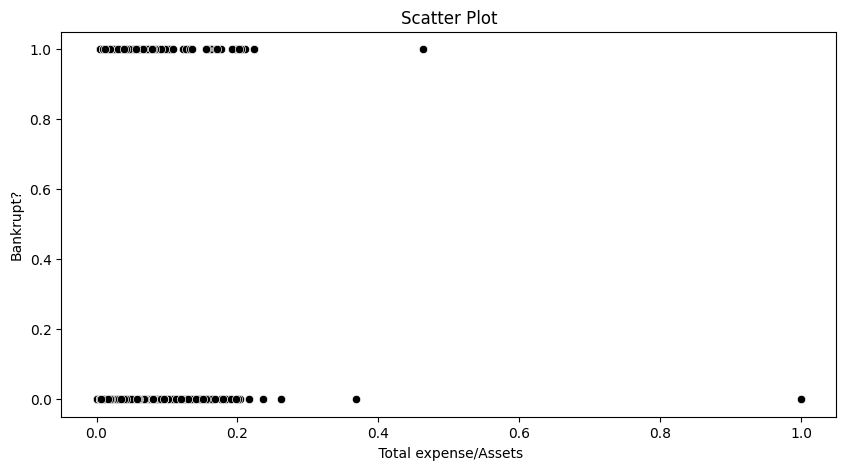

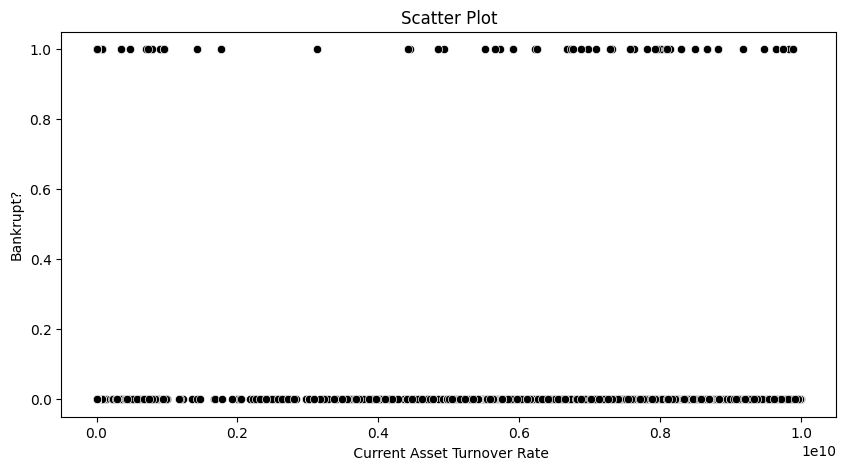

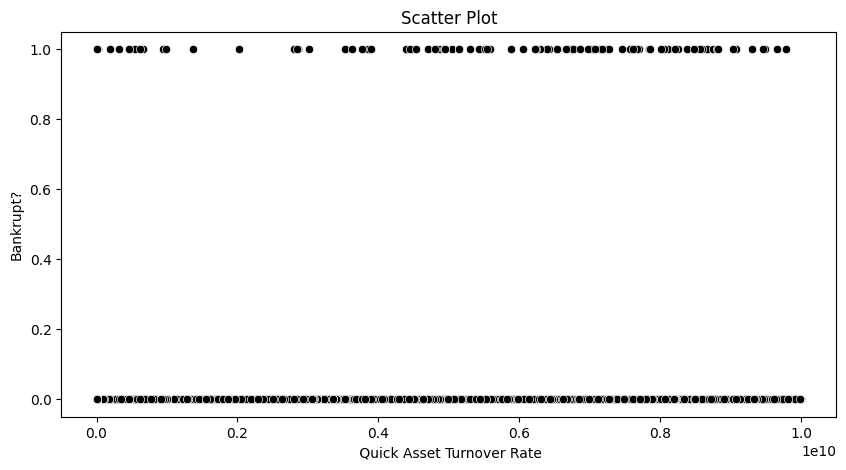

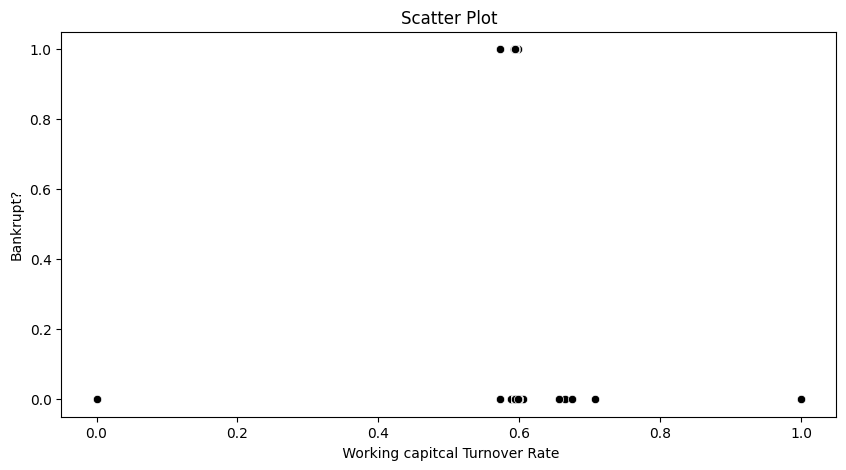

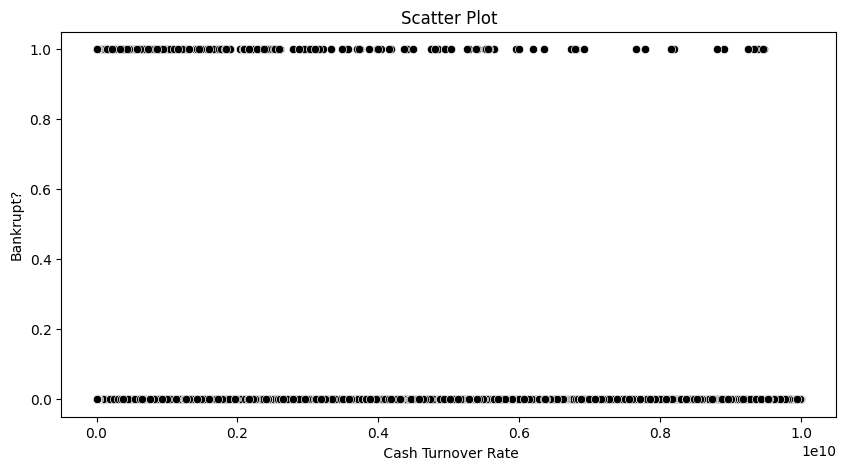

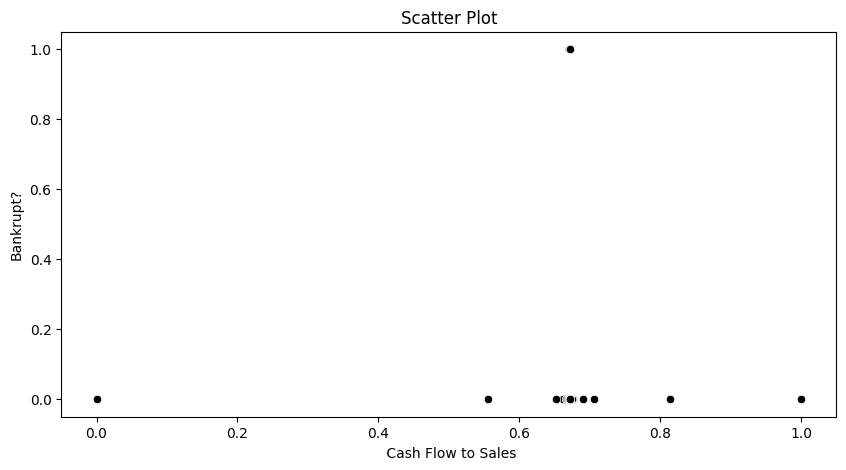

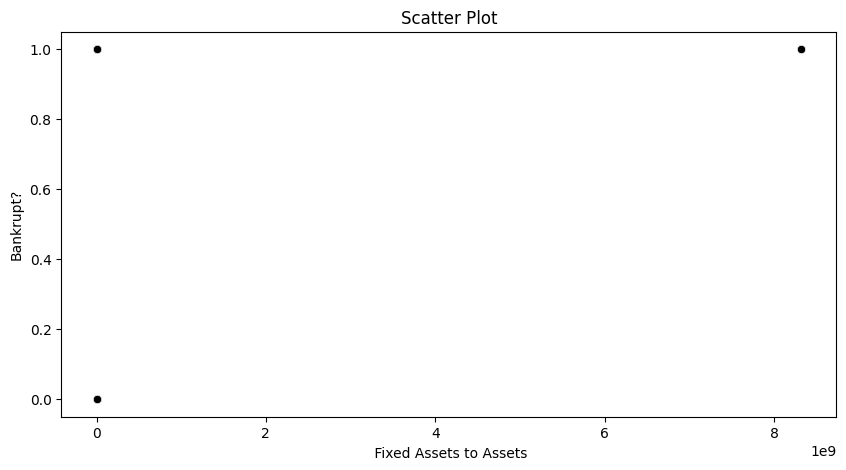

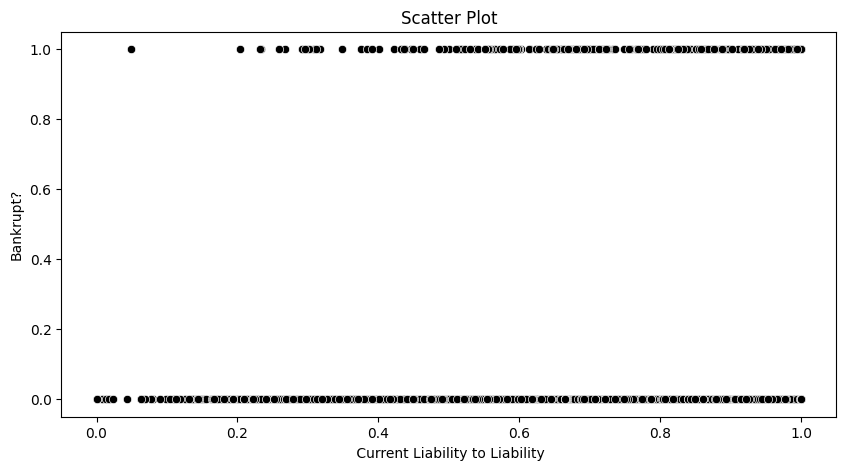

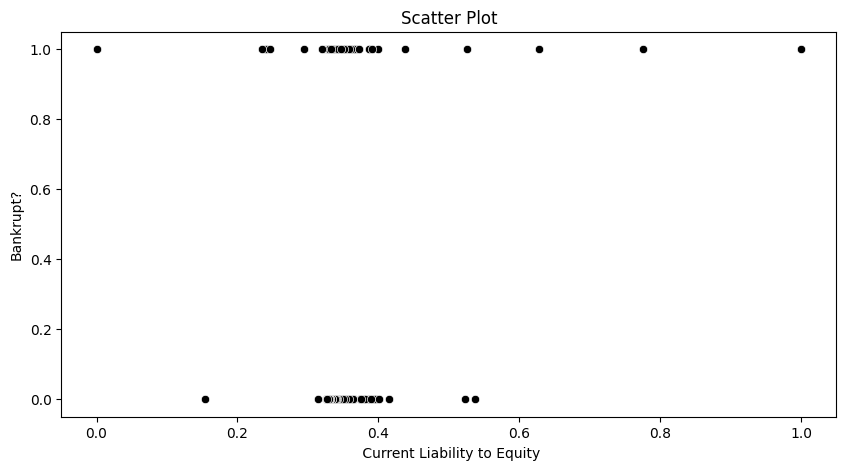

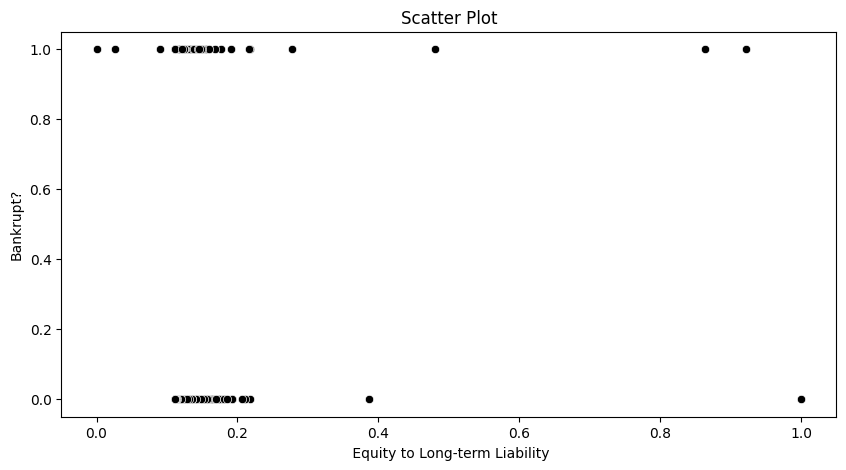

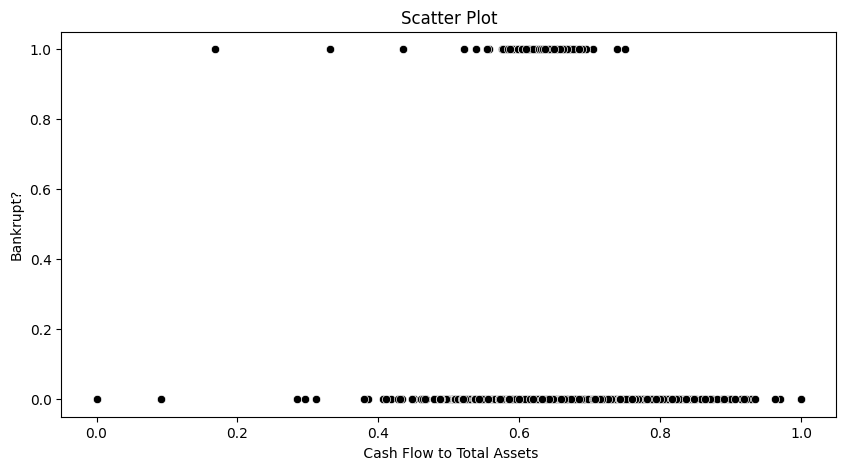

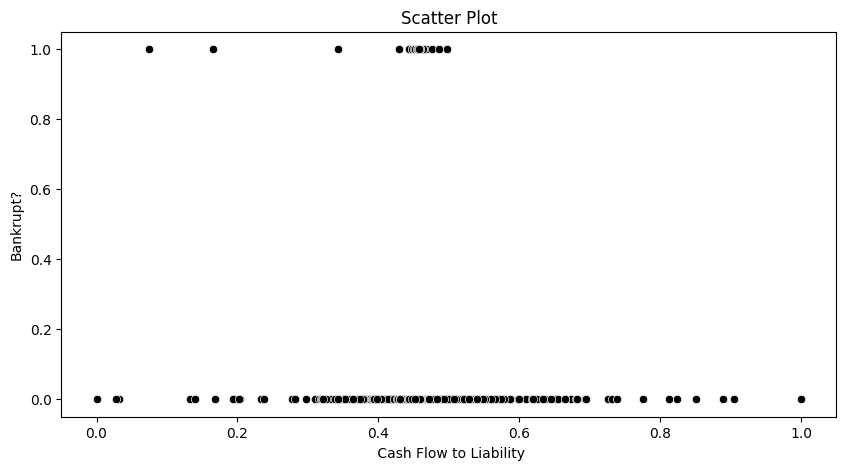

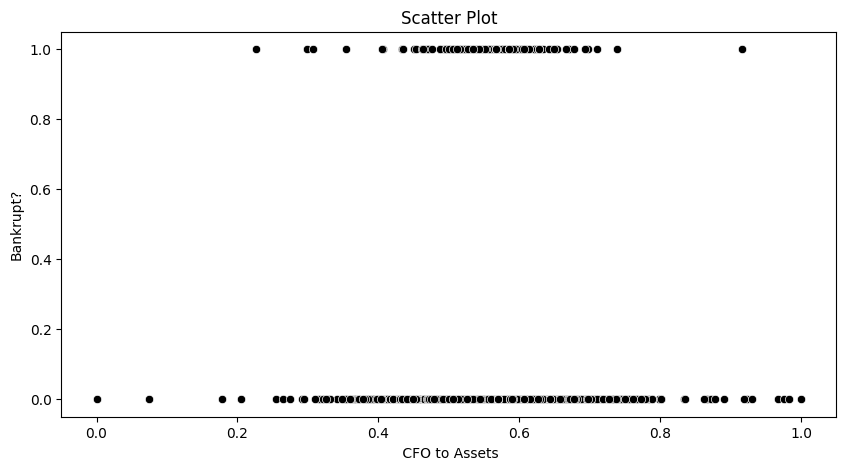

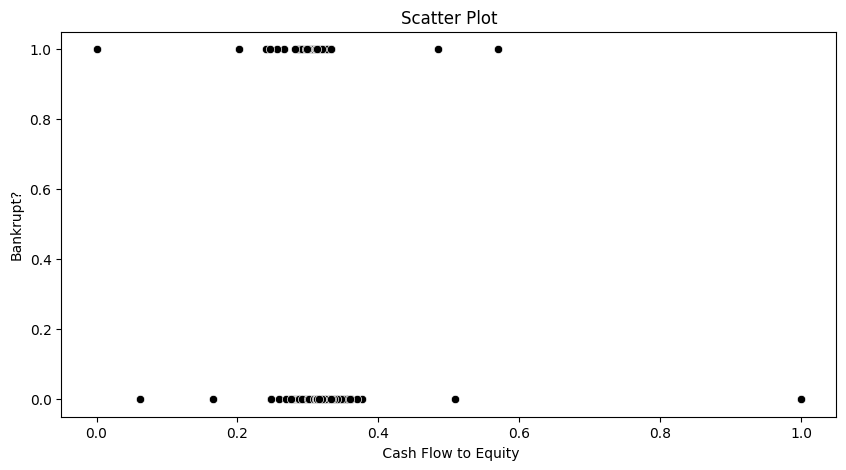

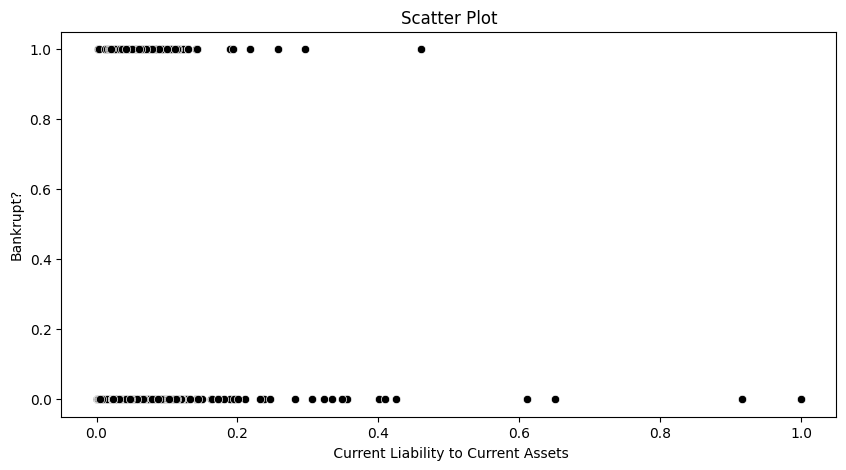

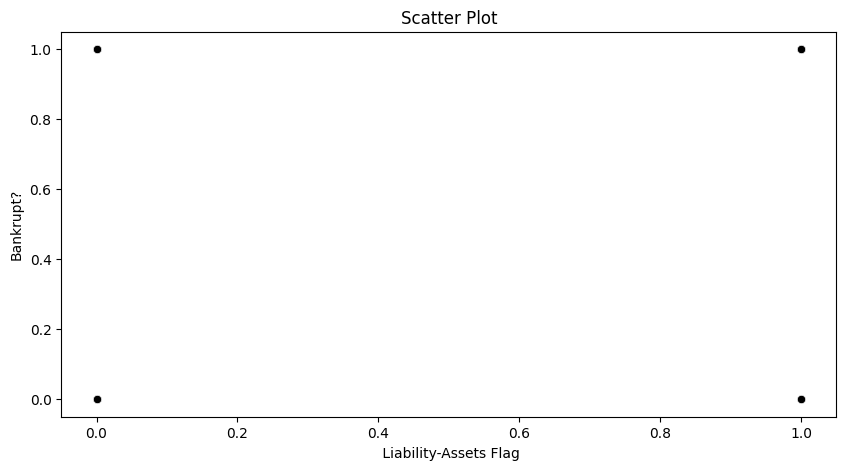

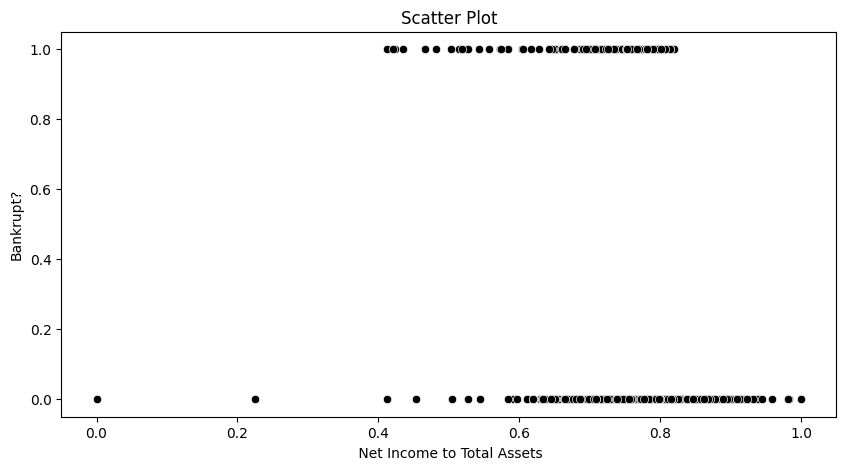

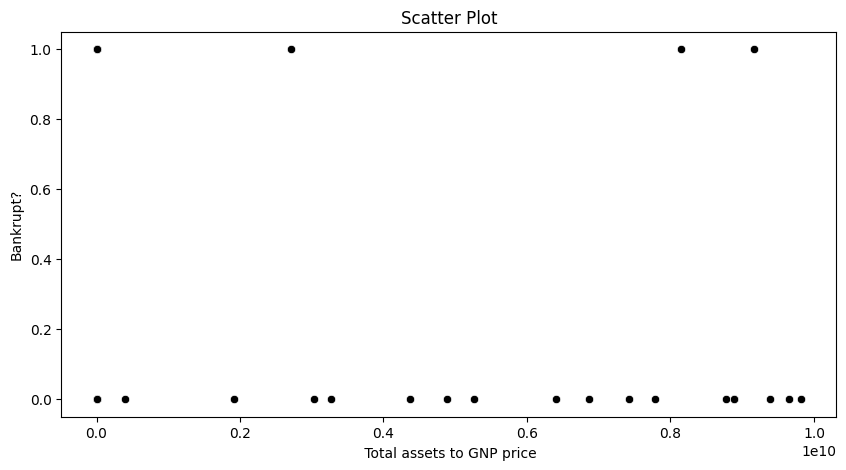

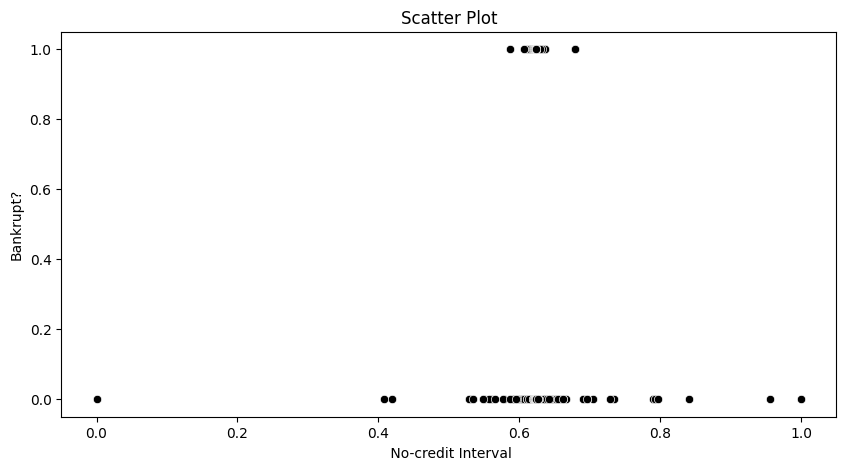

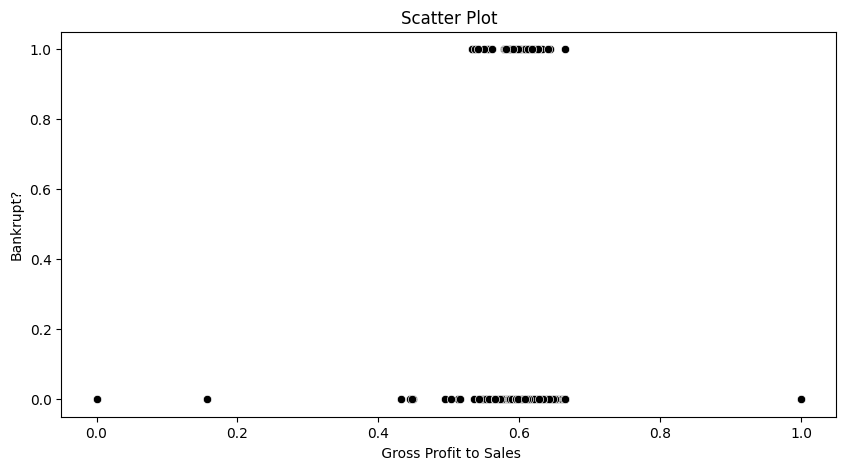

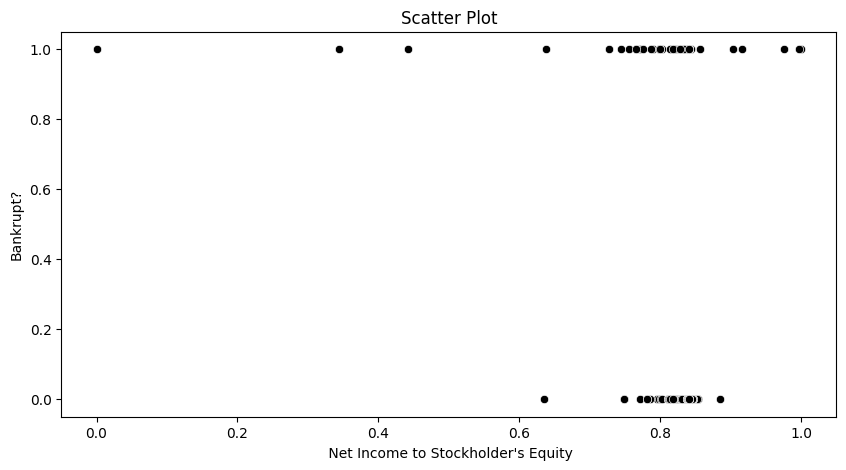

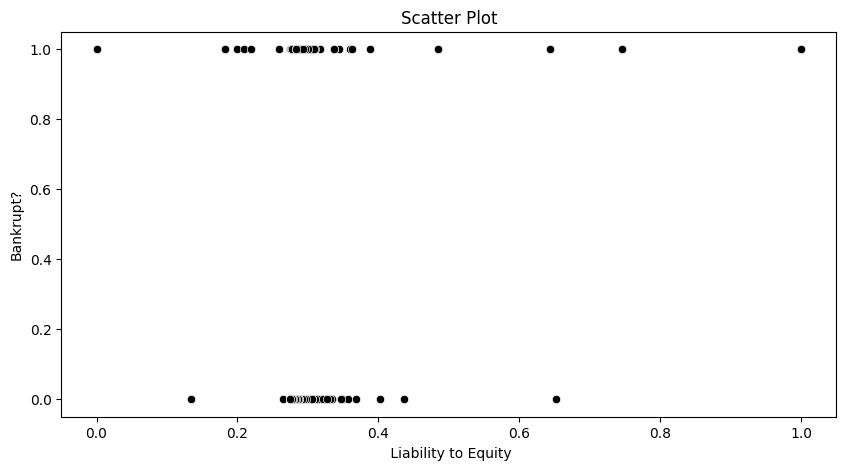

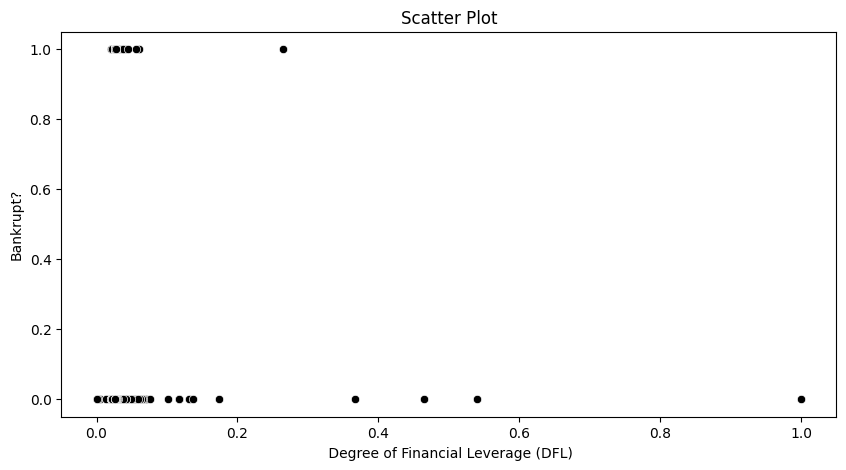

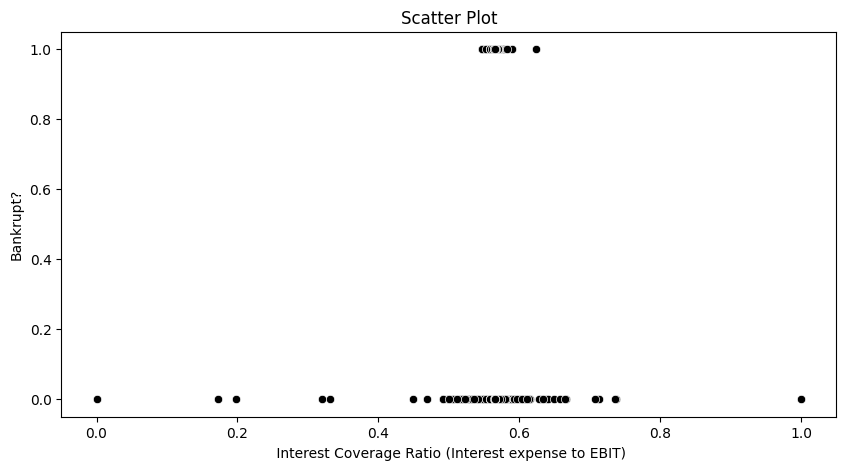

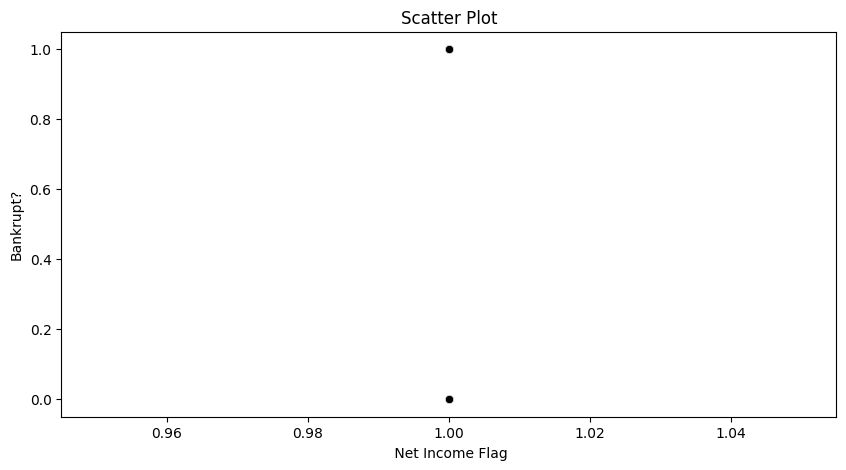

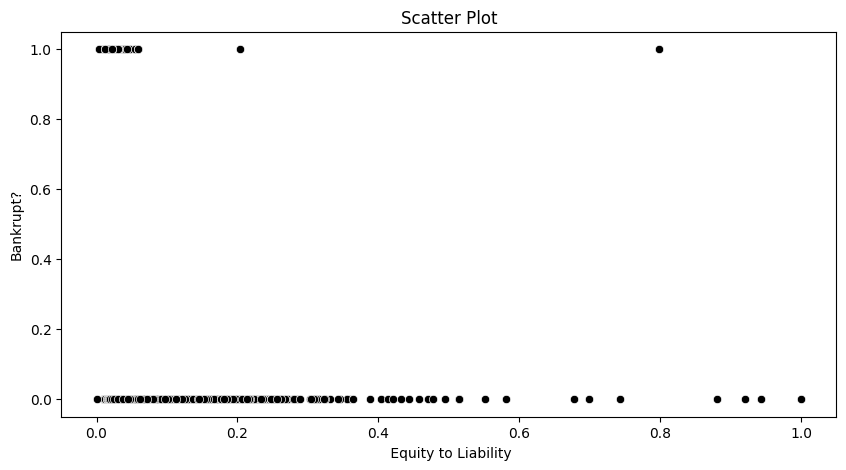

In [49]:
for i in list(df.describe().columns):
    sns.scatterplot(x=df[i], y=df['Bankrupt?'], color='black')
    plt.title('Scatter Plot')
    plt.ylabel('Bankrupt?')
    plt.xlabel(i)
    plt.show()


**From the above scatter plots, i can conclude that most of the independent features contain continuous values**

In [50]:
df[' Net Income Flag'].value_counts()

 Net Income Flag
1    6819
Name: count, dtype: int64

since, Net income flag only contain value 1 so we can easily drop it because it wont produce any effect on our dependent variables

In [51]:
df.drop(' Net Income Flag', axis=1, inplace=True)

In [52]:
pd.set_option('display.max_columns', None)
df.corr()

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Net Income to Stockholder's Equity                 -0.180987   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Net Income to Stockholder's Equity                                                          0.274287          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Net Income to Stockholder's Equity                                                0.291744   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Net Income to Stockholder's Equity        

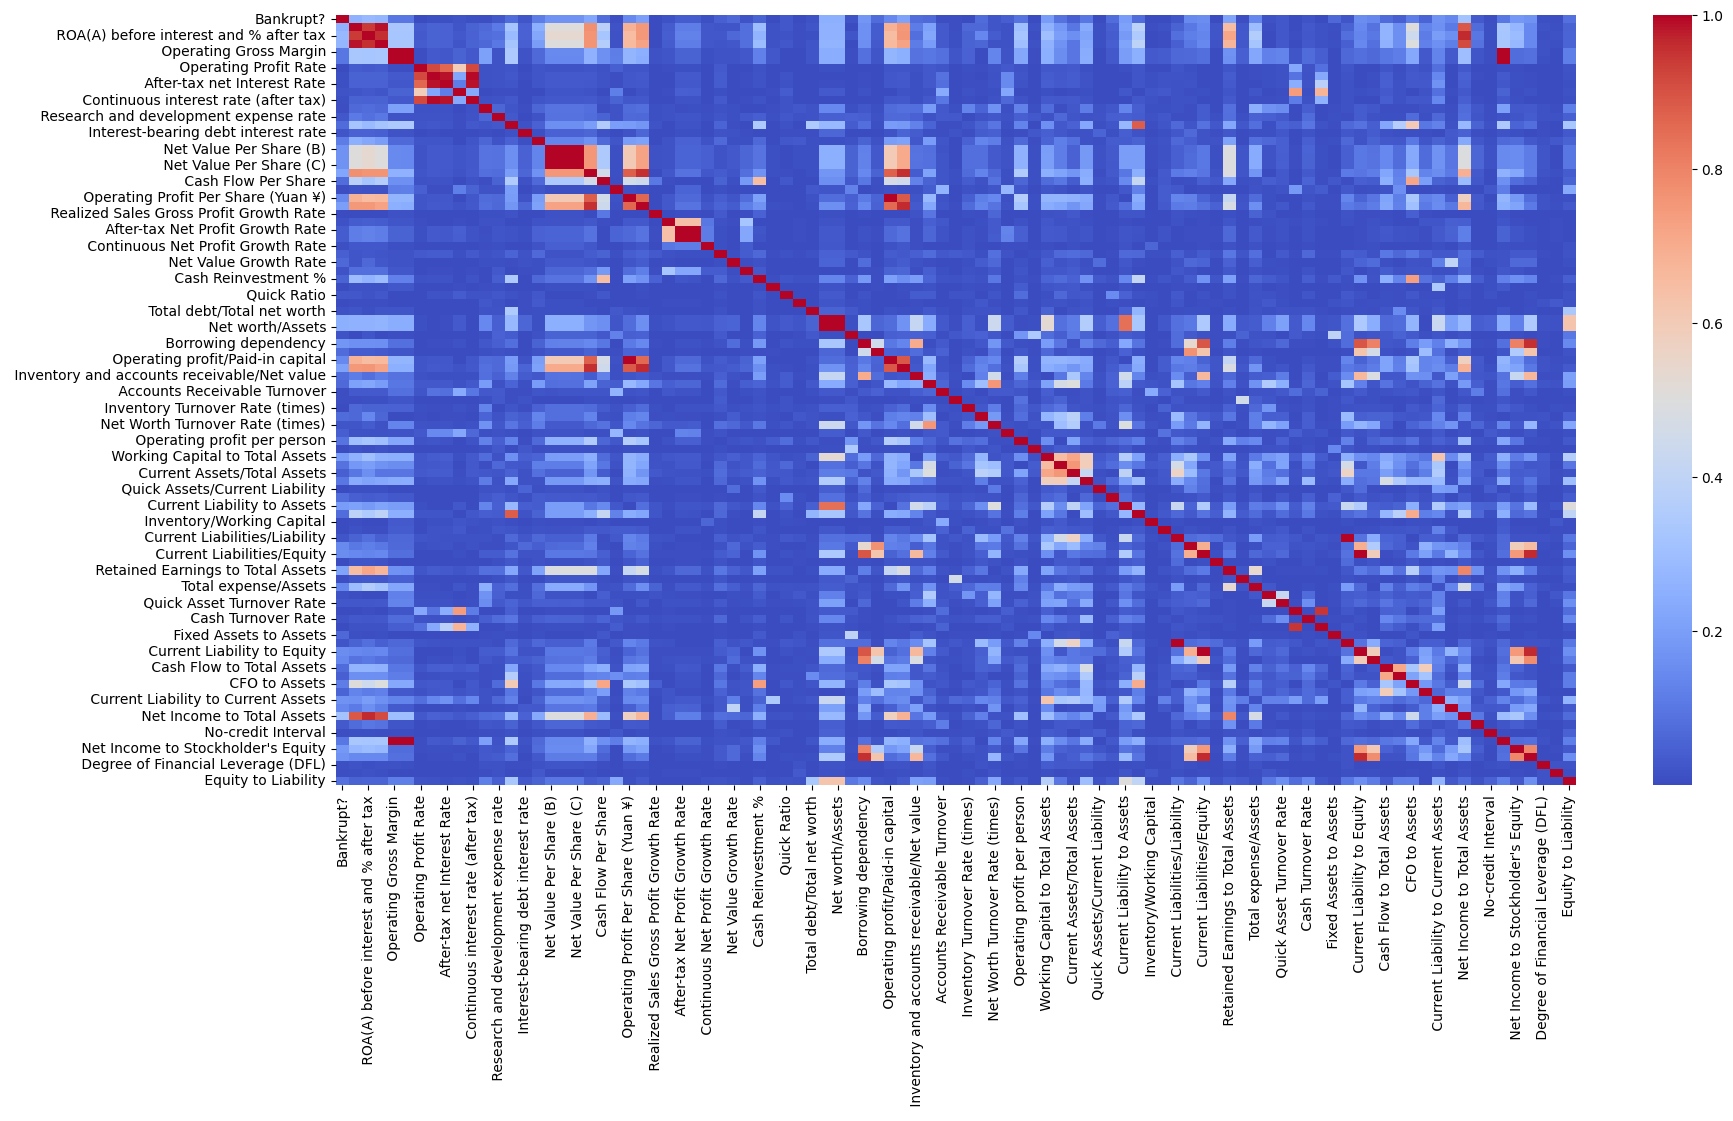

In [53]:
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation),  cmap='coolwarm');

**From the above correlation results I can say that there are so many features which are highly correlated to each other, Hence i have to remove them from out dataset for the betterment of our prediction.**

## Feature Engineering

In [54]:
# function for removing correlated features
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

I took threshold of .60 as a maximum correlation.

In [55]:
df_clean=trimm_correlated(df,.60)
df_clean.head()


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    Operating Gross Margin   Operating Profit Rate  \
0                 0.601457                0.998969   
1                 0.610235                0.998946   
2                 0.601450                0.998857   
3                 0.583541                0.998700   
4                 0.598783                0.998973   

    Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                      0.302646             1.256969e-04   
1                                      0.303556             2.897851e-04   
2                                      0.302035             2.361297e-04   
3                                      0.303350             1.078888e-04   
4                                      0.303475             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Cash Flow Per Share  \
0                  0.147950              0.311664   
1                  0.182251              0.318137   
2                  0.177911              0.307102   
3                  0.154187              0.321674   
4                  0.167502              0.319162   

    Revenue Per Share (Yuan ¥)   Realized Sales Gross Profit Growth Rate  \
0                     0.017560                                  0.022102   
1                     0.021144                                  0.022080   
2                     0.005944                                  0.022760   
3                     0.014368                                  0.022046   
4                     0.029690                                  0.022096   

    Operating Profit Growth Rate   Continuous Net Profit Growth Rate  \
0                       0.848195                            0.217535   
1                       0.848088                            0.217620   
2                       0.848094                            0.217601   
3                       0.848005                            0.217568   
4                       0.848258                            0.217626   

    Total Asset Growth Rate   Net Value Growth Rate  \
0              4.980000e+09                0.000327   
1              6.110000e+09                0.000443   
2              7.280000e+09                0.000396   
3              4.880000e+09                0.000382   
4              5.510000e+09                0.000439   

    Total Asset Return Growth Rate Ratio   Current Ratio   Quick Ratio  \
0                               0.263100        0.002259      0.001208   
1                               0.264516        0.006016      0.004039   
2                               0.264184        0.011543      0.005348   
3                               0.263371        0.004194      0.002896   
4                               0.265218        0.006022      0.003727   

    Interest Expense Ratio   Total debt/Total net worth   Debt ratio 

In [56]:
df_clean.shape

(6819, 56)

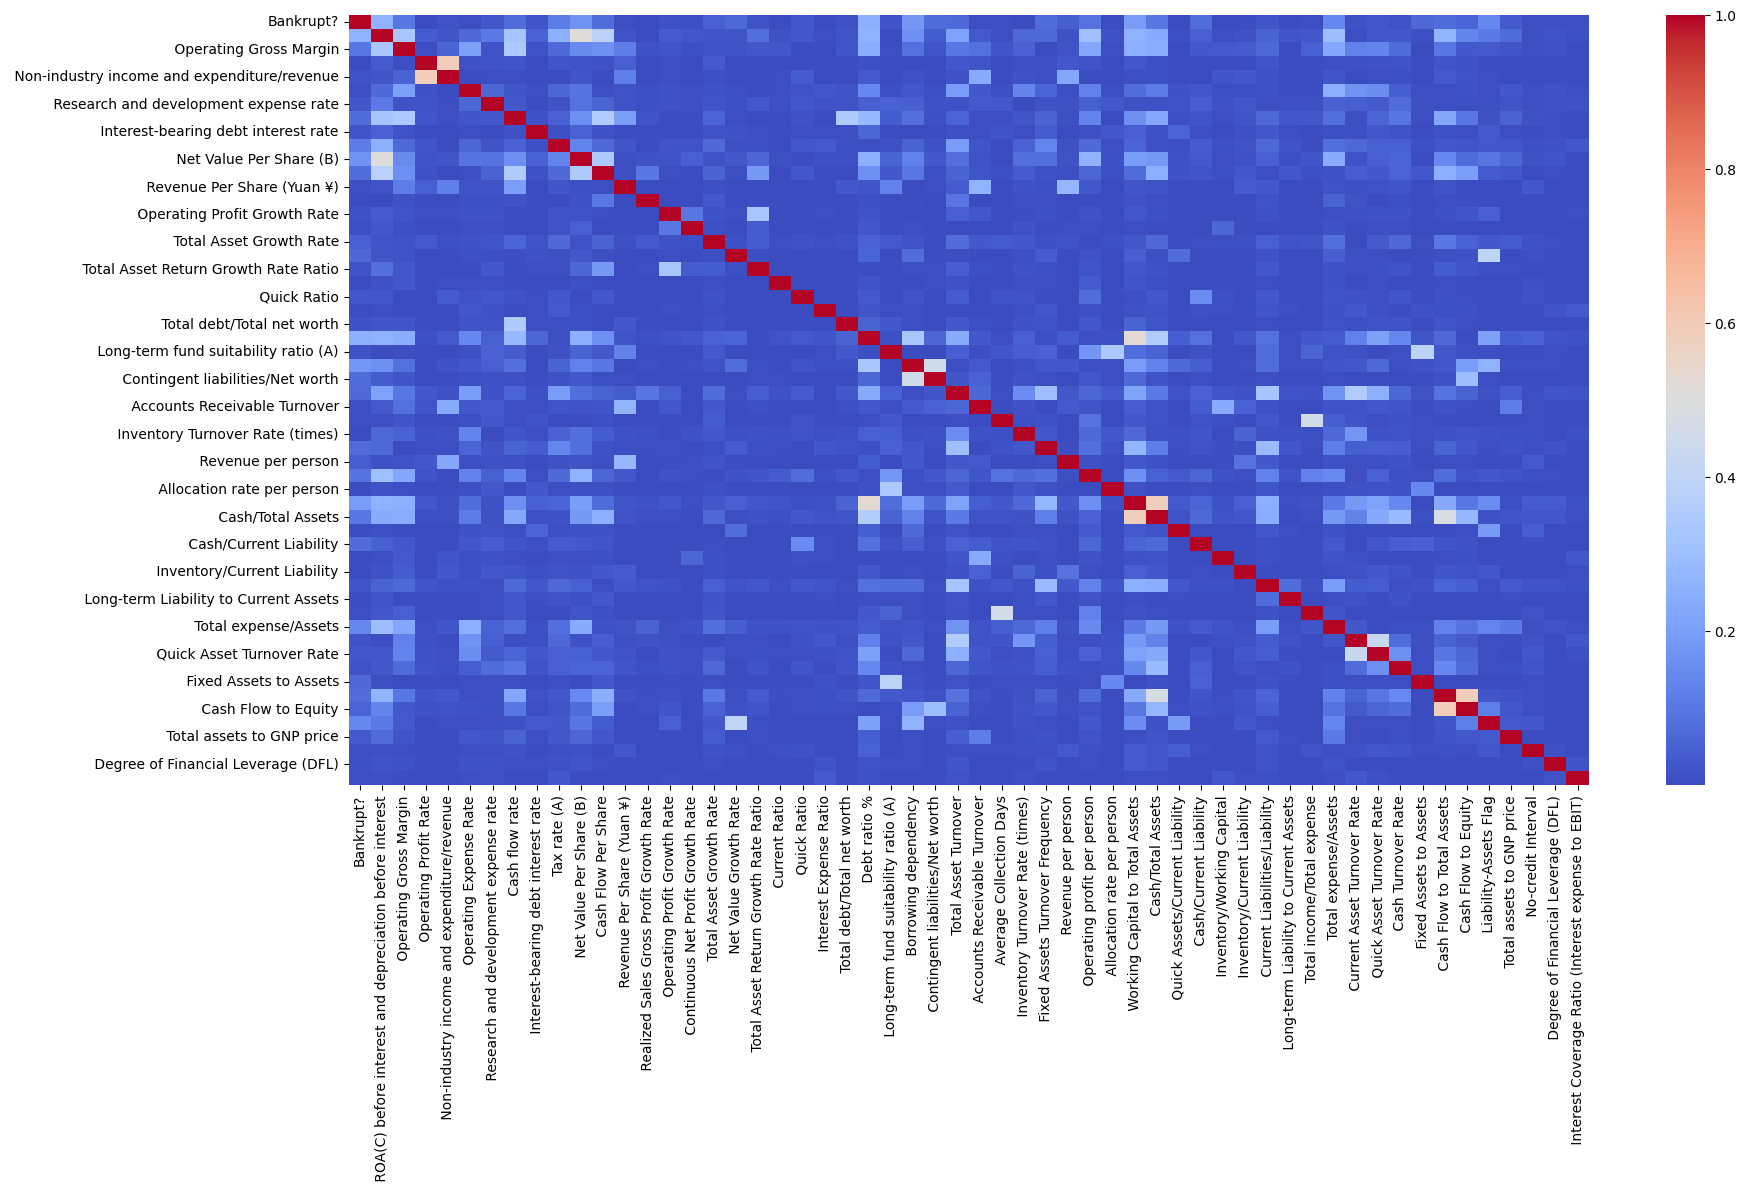

In [57]:
# heatmap
plt.figure(figsize=(20,10))
correlation = df_clean.corr()
sns.heatmap(abs(correlation),  cmap='coolwarm');

**originally we had 96 features in our dataset, But after removing the highly correlated features we have left with 56 features only.**

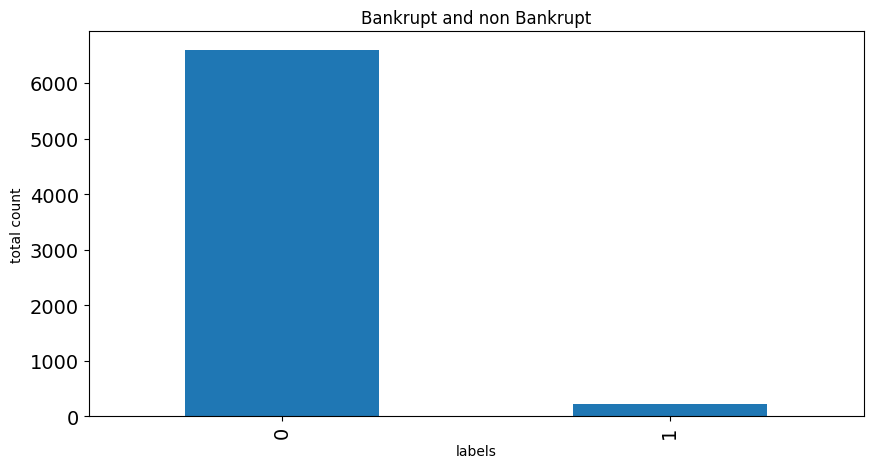

In [58]:
df_clean['Bankrupt?'].value_counts().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('Bankrupt and non Bankrupt')
plt.xlabel('labels')

plt.ylabel('total count');

In [59]:
df_clean['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

**From the above experiment i can conclude that our Dependent variable is highly imbalanced so , we have use some resampling technique for solving this class imbalance**

for resampling purpose i am using SMOTE.

# SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 10
dependent_variable='Bankrupt?'
independent_variables = list(set(df_clean.columns.tolist()) - {dependent_variable})
X=df_clean[independent_variables].values
y=df_clean[dependent_variable]
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [23]:
unique, counts = np.unique(y_smote, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)
print('Original dataset shape', len(df_clean))
print('Resampled dataset shape', len(y_smote))

[[   0 6599]
 [   1 6599]]
Original dataset shape 6819
Resampled dataset shape 13198


**After applying SMOTE to our dataset, we got a total of 13198 observation. Hence, the class imbalanced problem has been solved now we can move to the different types of classification models**

# 1. Logistic Regression

In [26]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_log.shape)
print(X_test_log.shape)
#scaling with the help of MinMax scaler
scaler = MinMaxScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

(9898, 55)
(3300, 55)


In [27]:

regressor = LogisticRegression()
regressor.fit(X_train_log, y_train_log)

LogisticRegression()

In [28]:
# Predicting the Test set results

y_pred_log = regressor.predict(X_test_log)
train_acc = regressor.score(X_train_log, y_train_log)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_log, y_pred_log)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score:',roc_auc_score(y_test_log, y_pred_log))
print(classification_report(y_test_log, y_pred_log))

The Accuracy for Training Set is 88.95736512426753
The Accuracy for Test Set is 89.06060606060606
ROCAUC score: 0.8902198264203309
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1612
           1       0.88      0.91      0.89      1688

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



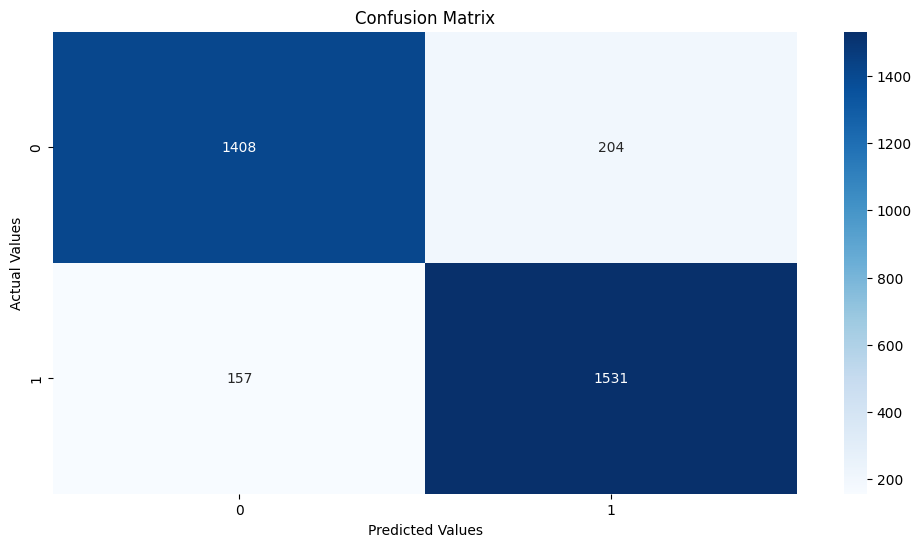

In [29]:
cm=confusion_matrix(y_test_log,y_pred_log)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

**From  the logistic regression we got the roc_auc score is approax 0.88, f1 score on predicting Bankruptcy is 0.89.**

# 2. Naive bayes Classifier

In [30]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_nb.shape)
print(X_test_nb.shape)

(9898, 55)
(3300, 55)


In [31]:

nb_model = BernoulliNB()
# fitting the model for grid search
nb_model.fit(X_train_nb, y_train_nb)


BernoulliNB()

In [32]:
y_pred_nb = nb_model.predict(X_test_nb)
train_acc = nb_model.score(X_train_nb, y_train_nb)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_nb, y_pred_nb)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score on test set:',roc_auc_score(y_test_nb, y_pred_nb))
print(classification_report(y_test_nb, y_pred_nb))

The Accuracy for Training Set is 76.50030309153364
The Accuracy for Test Set is 76.9090909090909
ROCAUC score on test set: 0.7692616395987439
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1612
           1       0.78      0.76      0.77      1688

    accuracy                           0.77      3300
   macro avg       0.77      0.77      0.77      3300
weighted avg       0.77      0.77      0.77      3300



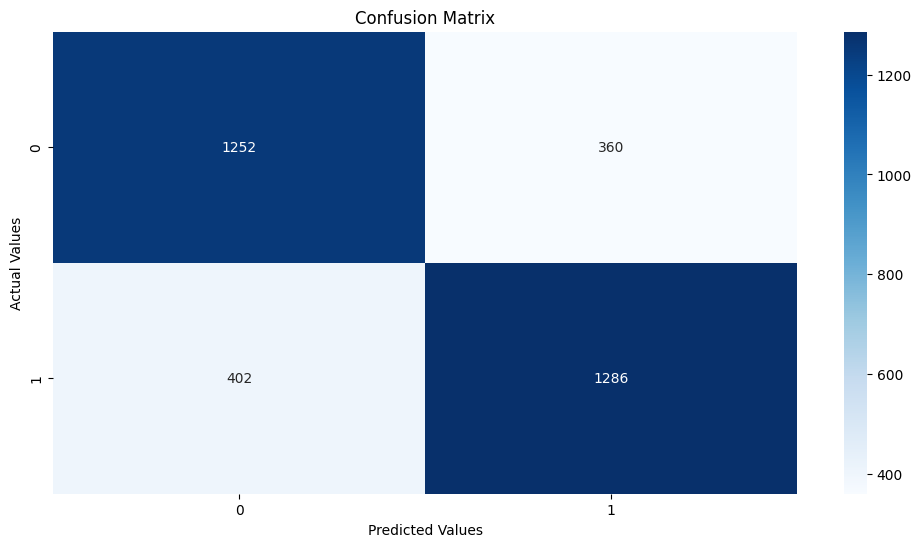

In [33]:
cm=confusion_matrix(y_test_nb,y_pred_nb)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

**From the naive bayes classifier, we got the roc_auc score is approax 0.77, f1 score on predicting Bankruptcy is 0.77, the scores are not so satisfacotry so i have to move to other models**

# 3. KNN

In [34]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_knn.shape)
print(X_test_knn.shape)
scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn= scaler.transform(X_test_knn)

(9898, 55)
(3300, 55)


In [35]:
knn = KNeighborsClassifier()
k_range = list(range(1, 55))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_model=grid.fit(X_train_knn, y_train_knn)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [36]:
knn_model.best_params_

{'n_neighbors': 13}

In [37]:
# Predicting the Test set results

y_pred_knn = knn_model.predict(X_test_knn)
train_acc = knn_model.score(X_train_knn, y_train_knn)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_knn, y_pred_knn)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score on test set:',roc_auc_score(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn))

The Accuracy for Training Set is 99.72994946706682
The Accuracy for Test Set is 90.93939393939394
ROCAUC score on test set: 0.9073139251819882
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1612
           1       0.85      1.00      0.92      1688

    accuracy                           0.91      3300
   macro avg       0.92      0.91      0.91      3300
weighted avg       0.92      0.91      0.91      3300



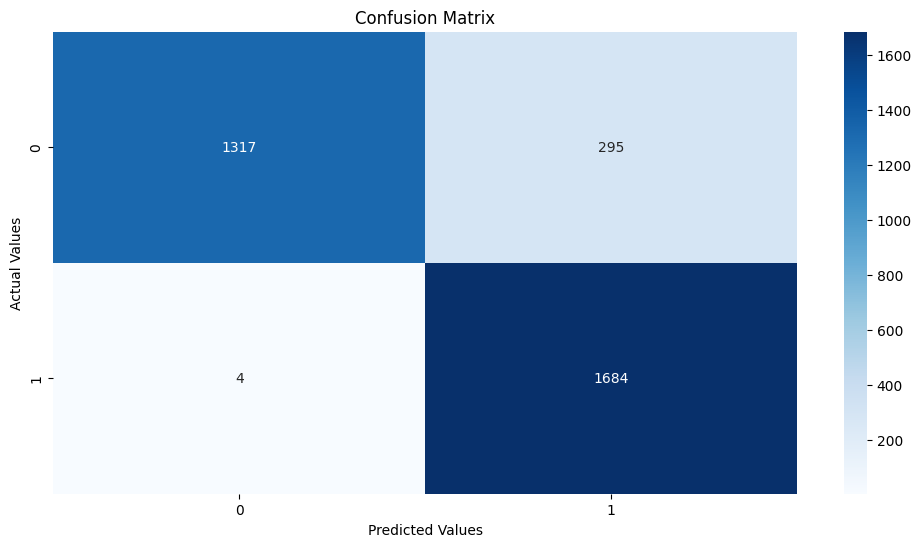

In [38]:
cm=confusion_matrix(y_test_knn,y_pred_knn)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

**From the KNN, we got the roc_auc score is approax 0.91, f1 score on predicting Bankruptcy is 0.92.**

# 4. Gradient Boosting Classifier

In [42]:
X_train_gbm, X_test_gbm, y_train_gbm, y_test_gbm = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_gbm.shape)
print(X_test_gbm.shape)

(9898, 55)
(3300, 55)


In [43]:
model = GradientBoostingClassifier()

param_grid = {'learning_rate': [0.1, .001],
              'n_estimators': [10,100,1000],
   'max_depth': [1,3,10] }
 
gbm_model= GridSearchCV(model, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gbm_model.fit(X_train_gbm, y_train_gbm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=10;, score=0.881 total time=   1.6s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=10;, score=0.895 total time=   1.6s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=10;, score=0.879 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=10;, score=0.887 total time=   1.5s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=10;, score=0.880 total time=   1.4s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.917 total time=  15.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.931 total time=  14.8s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.922 total time=  15.7s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.921 total time=  15.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.921 total time=  

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.001], 'max_depth': [1, 3, 10],
                         'n_estimators': [10, 100, 1000]},
             verbose=3)

In [44]:
gbm_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}

In [45]:
# Predicting the Test set results

y_pred_gbm = gbm_model.predict(X_test_gbm)
train_acc = gbm_model.score(X_train_gbm, y_train_gbm)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_gbm, y_pred_gbm)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score on test set:',roc_auc_score(y_test_gbm, y_pred_gbm))
print(classification_report(y_test_gbm, y_pred_gbm))

The Accuracy for Training Set is 100.0
The Accuracy for Test Set is 98.66666666666667
ROCAUC score on test set: 0.9864501134853527
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1612
           1       0.98      1.00      0.99      1688

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



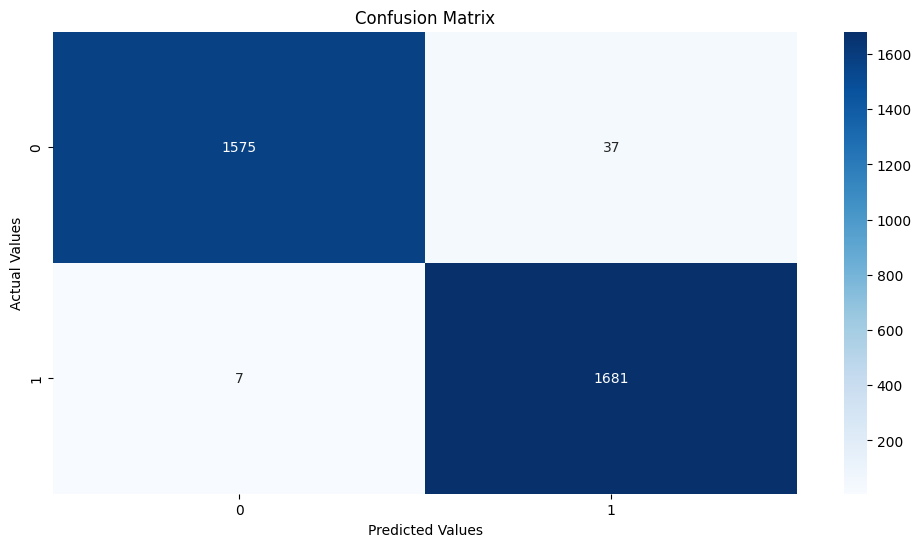

In [46]:
cm=confusion_matrix(y_test_gbm,y_pred_gbm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

**From the Gradient boos classifier, we got the roc_auc score is approax 0.987, f1 score on predicting Bankruptcy is 0.99.**

# 5. Decision Tree Classifier

In [24]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_dt.shape)
print(X_test_dt.shape)

(9898, 55)
(3300, 55)


In [25]:
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier()

In [26]:
y_pred_dt = model_dt.predict(X_test_dt)
train_acc = model_dt.score(X_train_dt, y_train_dt)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_dt, y_pred_dt)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score on test set:',roc_auc_score(y_test_dt, y_pred_dt))
print(classification_report(y_test_dt, y_pred_dt))

The Accuracy for Training Set is 100.0
The Accuracy for Test Set is 95.69696969696969
ROCAUC score on test set: 0.9566535933108322
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1612
           1       0.95      0.97      0.96      1688

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300



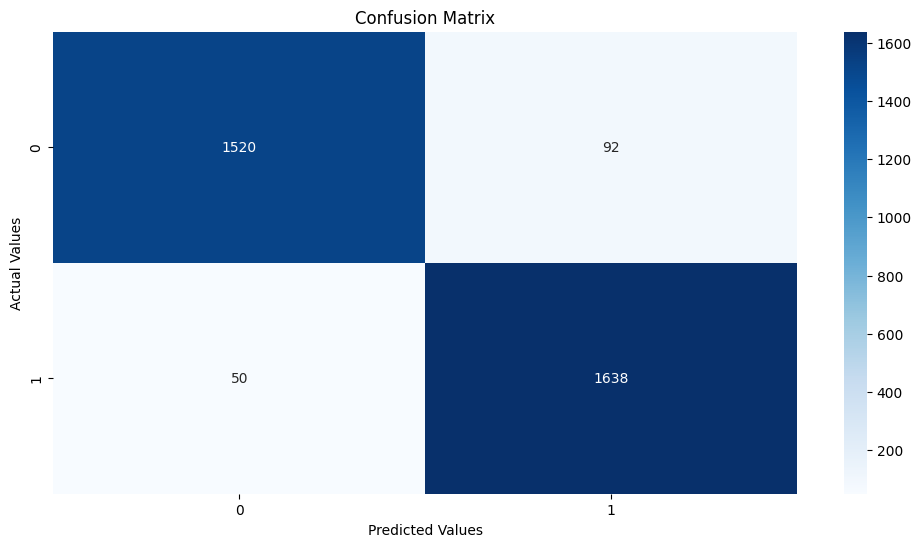

In [27]:
cm=confusion_matrix(y_test_dt,y_pred_dt)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

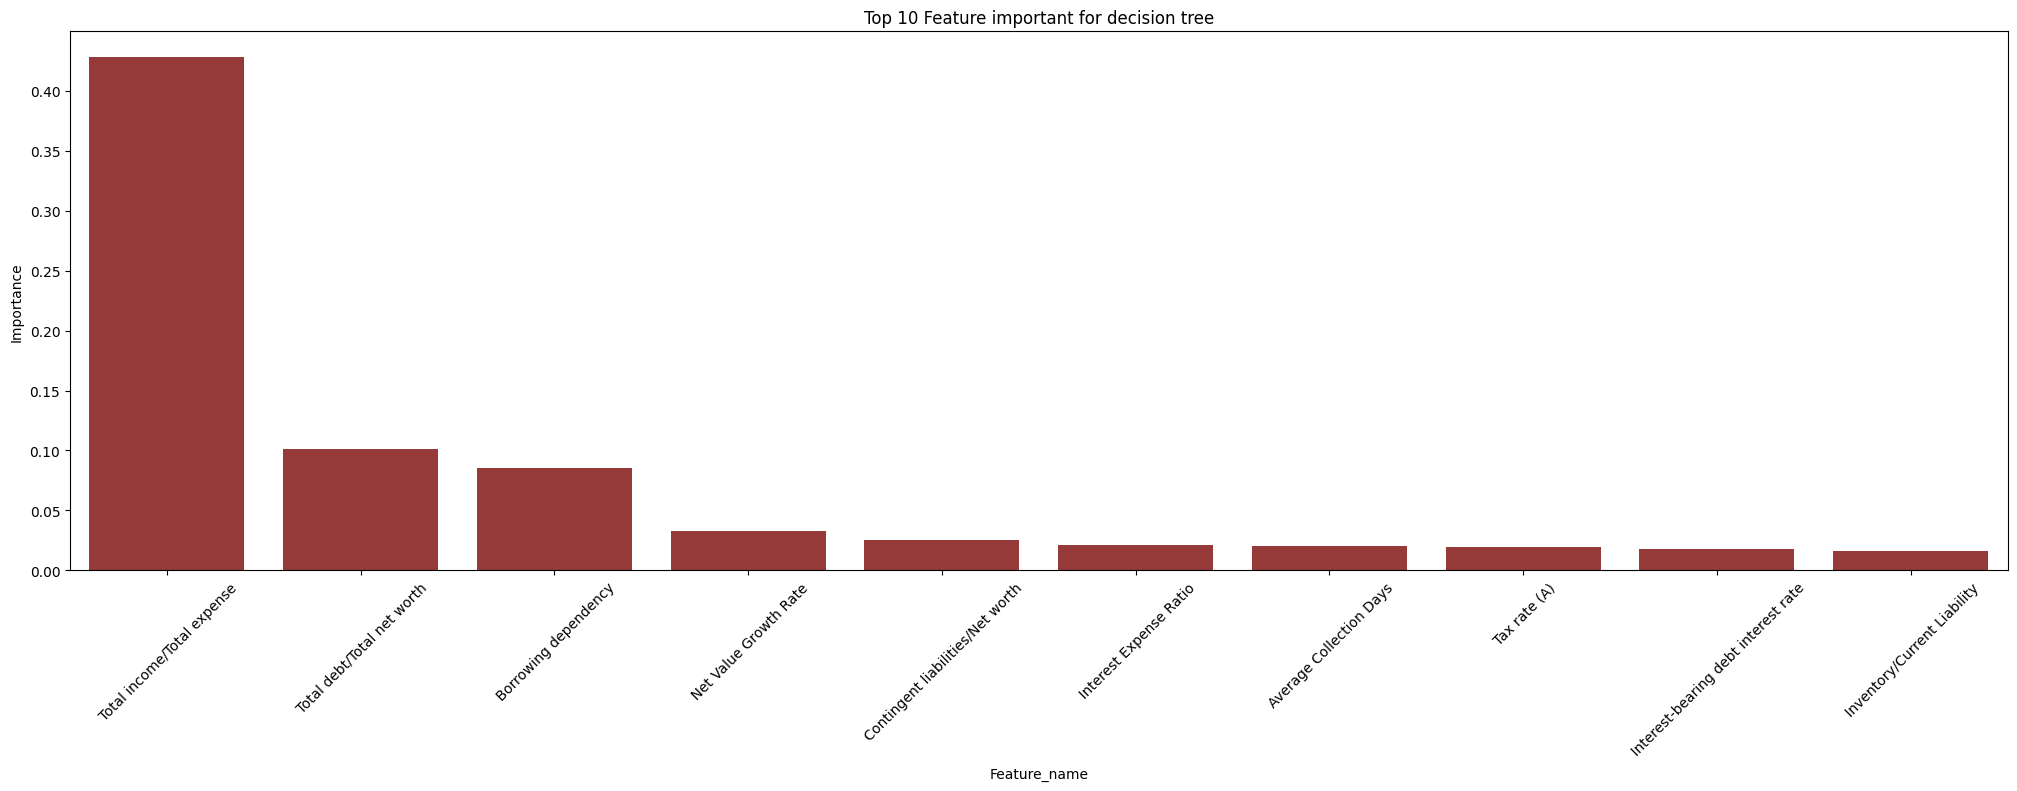

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming imp_df is your DataFrame containing feature names and their importance values
imp_df.sort_values('importance', ascending=False, inplace=True)

plt.figure(figsize=(25, 7))
sns.barplot(x=imp_df['Feature_name'].iloc[0:10], y=imp_df['importance'].iloc[0:10], color='brown')
plt.title('Top 10 Feature important for decision tree')
plt.ylabel('Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


**from the above bar plot i can conclude that Total income/totalexpense, total debt/total net worth, borrowing dependency are the biggest three factor which are affecting the bankruptcy of a company**

**From the Decision tree classifier, we got the roc_auc score is approax 0.95, f1 score on predicting Bankruptcy is 0.96.**

# 6.Random Forest classifier

In [30]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split( X_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train_rf.shape)
print(X_test_rf.shape)

(9898, 55)
(3300, 55)


In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [32]:
y_pred_rf = model_rf.predict(X_test_rf)
train_acc = model_rf.score(X_train_rf, y_train_rf)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = accuracy_score(y_test_rf, y_pred_rf)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print('ROCAUC score on test set:',roc_auc_score(y_test_rf, y_pred_rf))
print(classification_report(y_test_rf, y_pred_rf))

The Accuracy for Training Set is 100.0
The Accuracy for Test Set is 98.15151515151516
ROCAUC score on test set: 0.9812050909646843
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1612
           1       0.97      0.99      0.98      1688

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



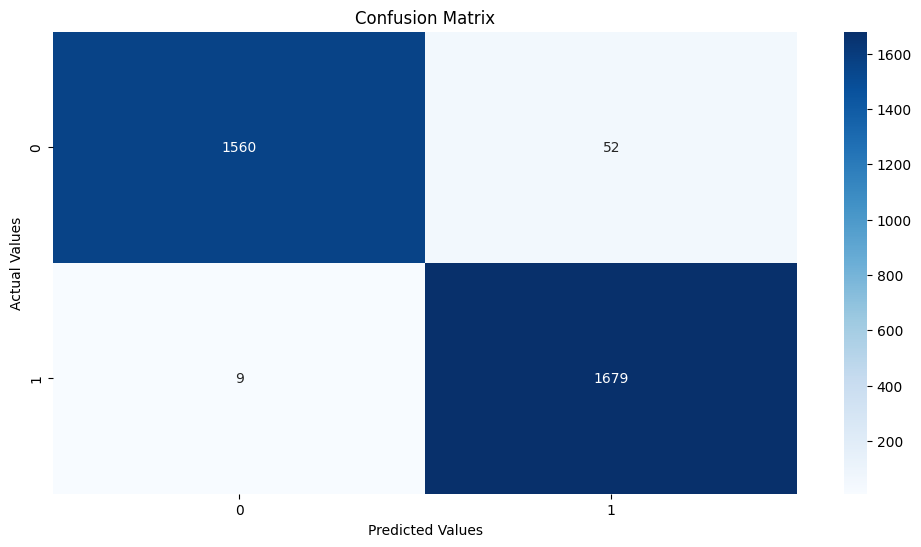

In [33]:
cm=confusion_matrix(y_test_rf,y_pred_rf)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

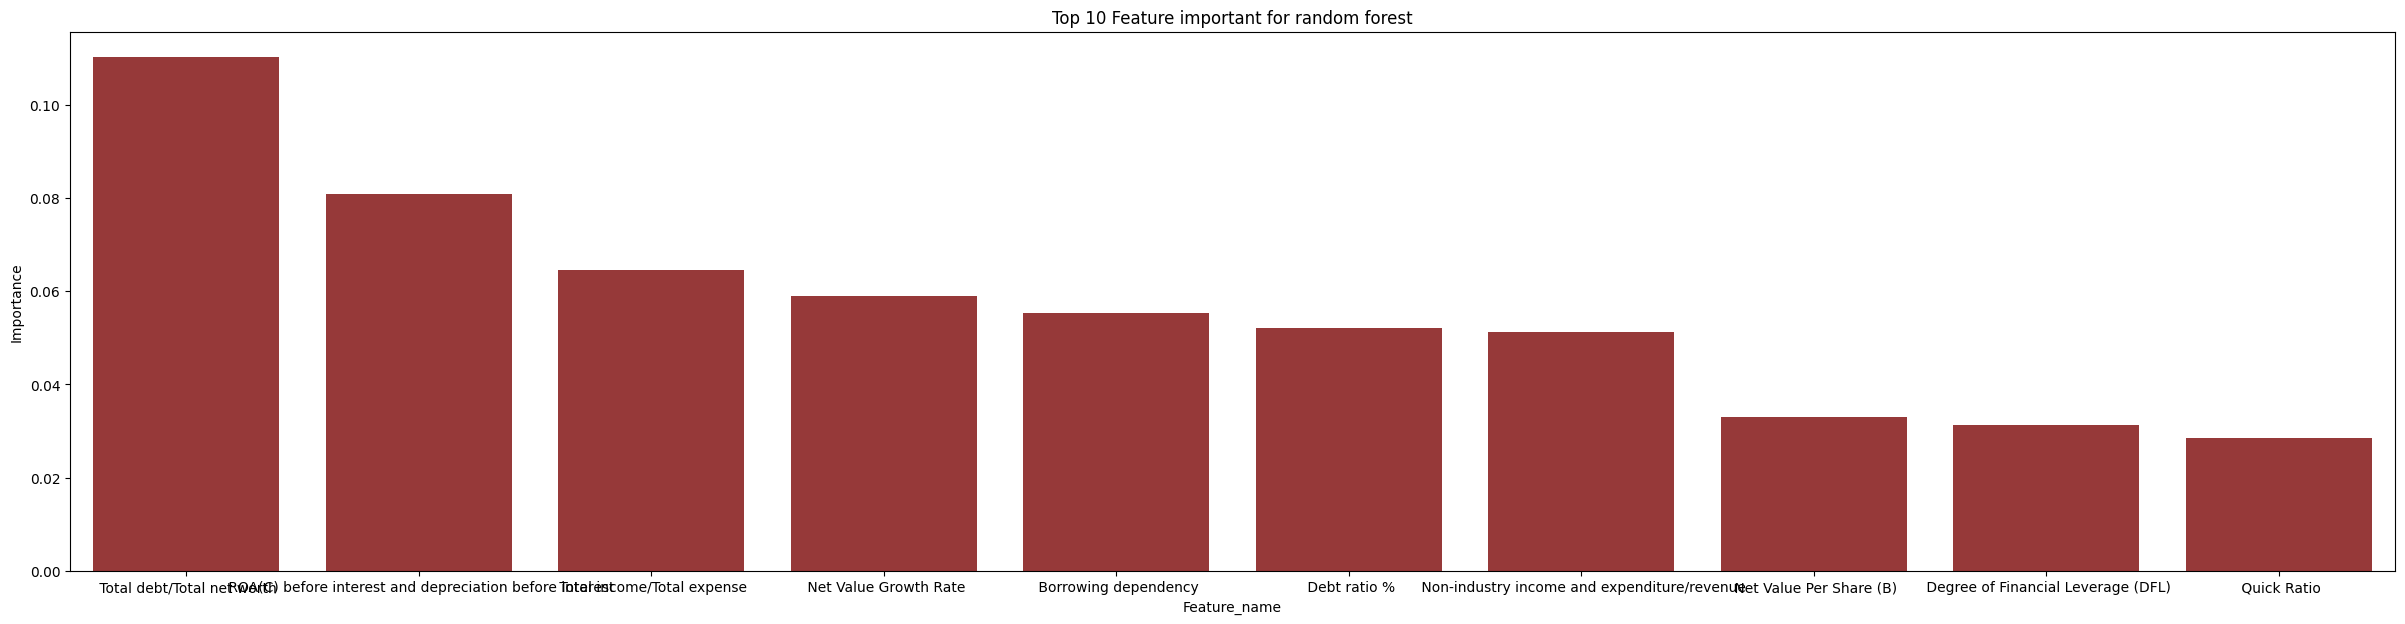

In [35]:
imp_df_rf=pd.DataFrame({'Feature_name': independent_variables,'importance':model_rf.feature_importances_})
imp_df_rf.sort_values('importance',ascending=False,inplace=True)
plt.figure(figsize=(30,7))
sns.barplot(x=imp_df_rf['Feature_name'].iloc[0:10],y=imp_df_rf['importance'].iloc[0:10],color='brown')
plt.title('Top 10 Feature important for random forest')
plt.ylabel('Importance')
plt.show()
     

#from the above bar plot i can not say in random forest that there is a particular feature which impact the dependent variable too much like in decision tree.

#From the random forest classifier, we got the roc_auc score is approax 0.98, f1 score on predicting Bankruptcy is 0.98.

# Model Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree
import numpy as np

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', BernoulliNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', tree.DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Perform cross-validation for each model
for name, model in models:
    cv_scores = cross_val_score(model, X_smote, y_smote, cv=5, scoring='accuracy')
    print(f"{name}:")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", np.mean(cv_scores))
    print("\n")


Logistic Regression:
Cross-validation scores: [0.50795455 0.59015152 0.55568182 0.63243653 0.64304661]
Mean CV accuracy: 0.5858542032679963


Naive Bayes:
Cross-validation scores: [0.7405303  0.74318182 0.78030303 0.76506252 0.80030315]
Mean CV accuracy: 0.7658761640658193


K-Nearest Neighbors:
Cross-validation scores: [0.84962121 0.87765152 0.91856061 0.93406593 0.92118227]
Mean CV accuracy: 0.900216306681824


Gradient Boosting:
Cross-validation scores: [0.9155303  0.91439394 0.96818182 0.96892762 0.97423266]
Mean CV accuracy: 0.9482532697187869


Decision Tree:
Cross-validation scores: [0.92083333 0.91174242 0.96439394 0.97006442 0.96703297]
Mean CV accuracy: 0.9468134164685889


Random Forest:
Cross-validation scores: [0.95909091 0.95719697 0.98598485 0.98711633 0.98938992]
Mean CV accuracy: 0.9757557959282097




# Saving Models

In [65]:
import pickle

# Assuming your best model is model_rf
best_model = RandomForestClassifier()  # Initialize with the best parameters if any
best_model.fit(X_smote, y_smote)

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [66]:
%%writefile bankruptcy_prediction_app.py
import streamlit as st
import pickle
import numpy as np

# Load the saved model
with open('random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Function to make predictions
def predict_bankruptcy(features):
    prediction = model.predict(features)
    probability = model.predict_proba(features)
    return prediction, probability

# Streamlit app
def main():
    st.title('Bankruptcy Prediction Web App')
    st.sidebar.title('Bankruptcy Prediction')

    # Input features
    features = []
    for i in range(55):  # Assuming we have 55 input features
        feature_val = st.sidebar.number_input(f'Feature {i+1}', step=0.01)
        features.append(feature_val)

    # Predict
    if st.sidebar.button('Predict'):
        features_array = np.array(features).reshape(1, -1)
        prediction, probability = predict_bankruptcy(features_array)
        st.write('### Prediction:')
        if prediction[0] == 1:
            st.write('The company is predicted to go bankrupt.')
        else:
            st.write('The company is predicted to not go bankrupt.')
        st.write('### Prediction Probability:')
        st.write(f'Probability of bankruptcy: {probability[0][1]}')
        st.write(f'Probability of not bankruptcy: {probability[0][0]}')

if __name__ == '__main__':
    main()


Overwriting bankruptcy_prediction_app.py


In [ ]:
!streamlit run bankruptcy_prediction_app.py
